In [1]:
.3# 比分析处理之前的数据与真实值之间的差异，对比噪声，RMSE,DTW等指 

In [1]:
# 第一部分：数据介绍
# 简单介绍cv输出轨迹中存在的问题，包括三种cv算法输出的轨迹情况。包括，id跳动、受遮挡导致的局部轨迹缺失、交互影响下的轨迹噪声等问题
# id跳动问题的具体表现形式，采用视频截图来表示，
# 受遮挡导致的局部轨迹缺失问题，
# 估计噪声问题，速度噪声，加速度噪声，加加速度噪声分布情况

# 第二部分：对比分析，三类轨迹提起方法所获取轨迹的宏微观对比分析
# 第一步，对比轨迹参数的整体分布，检验与真实值之间的差异；
# 第二步，对比cv输出轨迹与真实轨迹之间的差异，选取强交互情景下的轨迹做对比分析：

# 第三部分：对比降噪算法应用之后的轨迹
# 第一步，对比整体参数，
# 第二步，计算微观RMSE、DTWD等检验指标

In [2]:
# 导入所需的库

In [2]:
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.mlab as mlab
# 数据分析相关包
import seaborn as sns
from numpy.random import randn
import matplotlib as mpl
from scipy import stats
from matplotlib.patches import Polygon
import math
from scipy import stats

In [3]:
## 读取数据

In [41]:
# 导入yolov3 处理后的数据
pathyolov3 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov3.csv"
yolov3orginal = pd.read_csv(pathyolov3)
Yolov3_ebike = pd.DataFrame(yolov3orginal)

In [56]:
#导入处理后Mask数据
# Mask_rcnn_SF_PF_2020919
pathmasksfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\SFPF_Mask_0923_trajectory.mat" 
# pathmasksfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\Mask_rcnn_SF_PF_2020919.mat" 
# pathmasksfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\MASK_RCNN_RE_SFPF.mat"
# pathmasksfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\MASK_RCNN_RE_SFPF.mat"
masksfpf = scio.loadmat(pathmasksfpf)
Masksfpfdata = pd.DataFrame(masksfpf['SFPF_Mask_trajectory']) #swatch the dict to dataframe
Masksfpfdata.columns=["Object_id","frame_id","Vehicle_type","World_x","World_y","speed_x","speed_y","acc_x","acc_y","speed_xy","acc_xy","Displacement","Curvature","loopid"]
# 提取非机动车轨迹
# 这里面的11代表机动车，22表示电动车，33代表自行车
Mask_ebike_sfpf = Masksfpfdata[Masksfpfdata.Vehicle_type==22]

# Mask_ebike_sfpf
# Masksfpfdata
# Mask_orginal = Masksfpfdata[Masksfpfdata.loopid==0]
# Mask_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal09190.csv",index=False, header=True)
# Mask_orginal = Yolosfpfdata[Yolosfpfdata.loopid==1]
# Mask_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal09191.csv",index=False, header=True)
# Mask_orginal = Yolosfpfdata[Yolosfpfdata.loopid==2]
# Mask_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal09192.csv",index=False, header=True)
# Mask_orginal = Yolosfpfdata[Yolosfpfdata.loopid==10]
# Mask_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal091910.csv",index=False, header=True)
# Mask_orginal = Yolosfpfdata[Yolosfpfdata.loopid==50]
# Mask_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal091950.csv",index=False, header=True)
# Mask_orginal = Yolosfpfdata[Yolosfpfdata.loopid==100]
# Mask_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal0919100.csv",index=False, header=True)

In [57]:
## 导入处理之后的YOLO数据
# pathmasksfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\SFPF_Mask_0923_trajectory.mat" 
# pathyolosfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\SFPF_Yolov7_trajectory.mat"
# /SFPF_Yolov7_trajectory E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\SFPF_Yolov7_trajectory.mat SFPF_Yolov7_trajectory
pathyolosfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\SFPF_Yolov7_trajectory.mat"
# pathyolosfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\YOLOV7_SF_PF_2020919.mat"
# pathyolosfpf = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\Yolov7_deepsort_RE_SFPF.mat'
yolosfpf = scio.loadmat(pathyolosfpf)
Yolosfpfdata = pd.DataFrame(yolosfpf['SFPF_Yolov7_trajectory']) #swatch the dict to dataframe
Yolosfpfdata.columns=["Object_id","frame_id","Vehicle_type","World_x","World_y","speed_x","speed_y","acc_x","acc_y","speed_xy","acc_xy","Displacement","Curvature","loopid"]
Yolov7_ebike_sfpf = Yolosfpfdata[Yolosfpfdata.Vehicle_type==22]
# Yolosfpfdata
# Yolov7_orginal = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==0]
# Yolov7_orginal.to_csv("E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0923.csv",index=False, header=True)

In [58]:
# 导入ground turth dataset
# pathgroundturth = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\ground_truth20220920.mat'
pathgroundturth = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\ground truth\Geroge_ST_trajectory.csv'
# groundturth = scio.loadmat(pathgroundturth)
# groundSFpfdata = pd.DataFrame(groundturth['ground_truth20220920']) #swatch the dict to dataframe
# groundSFpfdata.columns=["Object_id","frame_id","Vehicle_type","World_x","World_y","speed_x","speed_y","acc_x","acc_y","speed_xy","acc_xy","Displacement","Curvature","loopid"]
# groundSFpfdata = groundSFpfdata[groundSFpfdata.Vehicle_type==22]
# Yolov7_orginal = Yolosfpfdata[Yolosfpfdata.loopid==0]


groundturth = pd.read_csv(pathgroundturth)
Groundtruth = pd.DataFrame(groundturth) #swatch the dict to dataframe

# 电动自行车
Groundtruthebike = Groundtruth[Groundtruth['Vehicle_type']==22]
Ebikenum = pd.unique(Groundtruthebike.Object_id).shape[0]
# 机动车
Groundtruthvehicle = Groundtruth[Groundtruth['Vehicle_type']==11]
Vehiclenum = pd.unique(Groundtruthvehicle.Object_id).shape[0]
# 自行车
Groundtruthbike = Groundtruth[Groundtruth['Vehicle_type']==33]
Bikenum = pd.unique(Groundtruthbike.Object_id).shape[0]
print(Ebikenum,Vehiclenum,Bikenum)

91 68 46


In [68]:
# 敏感性分析数据导入
magnialemx = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Marginaleffect/marginalebike_UY.csv' 
Marginalmx = pd.read_csv(magnialemx)
# Marginalmx

In [6]:
# 显示cv输出的原始轨迹
# 总体显示轨迹，运动参数，轨迹点的噪声

In [11]:
# 轨迹显示图
def Trajmap(Data,Orginal,mothod1,mothod2):
    # 设置图框大小
#     plt.Figure([2000,2000],dpi=20)
    fig = plt.figure(figsize=(14,7))   
    sns.despine(left=True)    
    #绘制轨迹
    plt.scatter(Data['World_x'],Data['World_y'],c='red',label='Ground trajectory')
    plt.scatter(Orginal['World_x'],Orginal['World_y'],c='k',label='Yolov7 Orginal trajectory')
    plt.scatter(mothod1['World_x'],mothod1['World_y'],c='blue',label='SFPF Remove Noise')
    plt.scatter(mothod2['World_x'],mothod2['World_y'],c='green',label='Wavelet Remove Noise')
    plt.legend()
    plt.legend(loc="upper right",fontsize=12)   #设置图例字体大小

    plt.xlabel('X (m))',fontsize=16)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=16)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=12,rotation=0)
    plt.yticks(fontsize=12)
    # 坐标名称
    plt.rcParams.update({"font.size":16})
#     plt.title("The trajectory",fontsize=16)
    plt.ylabel('Y (m)',fontsize=16)     #设置y轴名称  
    plt.grid()
    plt.show()

In [12]:
# 多维轨迹显示图
# 绘制时空分布图
def Stmap(data):
    # 计算车辆个数
    vehids = pd.unique(data["Object_id"])
    # 设置图框大小
    plt.Figure([2200,2200],dpi=1000)
    for vehid in vehids:
        # 获取第vehid辆车的轨迹
        traj_vehid = data[data.Object_id == vehid]
        # 获取x方向轨迹点
        x = traj_vehid['World_x']
        y = traj_vehid['World_y']
        v = traj_vehid['speed_xy']
        norm = matplotlib.colors.Normalize(vmin=0, vmax=50)
        # 绘制散点图
        ax = plt.scatter(x,y, marker = '.', s=1, c=v, cmap='jet_r', norm = norm)
    plt.clim(0, 25)
    plt.colorbar()
    plt.grid()
    plt.show()

In [13]:
# 计算轨迹中的速度/加速度/加加速度
def XY(groundtraj,caompartraj):
    g_World_x = np.array(groundtraj['World_x'].astype(float))
    g_World_y = np.array(groundtraj['World_y'].astype(float))
    com_World_x = np.array(caompartraj['World_x'].astype(float))
    com_World_y = np.array(caompartraj['World_y'].astype(float))    
    return g_World_x,g_World_y,com_World_x,com_World_y

def Velocity(trajdata):
    """recalculate the velocity, the velocity contain the X_velocity and Y-velocity and the speed"""
    """定义初速度为0"""
    len_x = trajdata.shape[0]
    wordld_x = np.array(trajdata.World_x)
    wordld_y = np.array(trajdata.World_y)
    velocity_x = (wordld_x[1:len_x]-wordld_x[0:len_x-1])/0.04
    velocity_y = (wordld_y[1:len_x]-wordld_y[0:len_x-1])/0.04
    velocity_x = np.insert(velocity_x,0,0)
    velocity_y = np.insert(velocity_y,0,0)
    return velocity_x,velocity_y

def Accelection(trajdata):
    """定结束时刻的加速度为0"""
    len_x = trajdata.shape[0]
    velocity_x = np.array(trajdata.speed_x)
    velocity_y = np.array(trajdata.speed_y)
    accelection_x = (velocity_x[1:len_x]-velocity_x[0:len_x-1])/0.04
    accelection_y = (velocity_y[1:len_x]-velocity_y[0:len_x-1])/0.04
    accelection_x = np.insert(accelection_x,0,0)
    accelection_y = np.insert(accelection_y,0,0)


In [14]:
def Jerk(trajdata):
    """计算急动度""" 
    print(trajdata)
    len_x = trajdata.acc_x.shape[0]
    
    acc_x = np.array(trajdata.acc_x)
    acc_y = np.array(trajdata.acc_y)
    jerk_x = (acc_x[1:len_x] - acc_x[0:(len_x-1)])/0.04
    jerk_y = (acc_y[1:len_x] - acc_y[0:(len_x-1)])/0.04
    jerk_x = jerk_x.append(0,0)
    jerk_y = jerk_y.append(0,0)
#     jerk_x = np.append(jerk_x,0)
#     jerk_y = np.append(jerk_y,0)
    return jerk_x,jerk_y

In [1]:
#  模块调用
# 小波变换
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pywt 

#封装成函数
def sgn(num):
    if(num > 0.0):
        return 1.0
    elif(num == 0.0):
        return 0.0
    else:
        return -1.0

def wavelet_noising(new_df):
    data = new_df
    data = data.values.T.tolist()  # 将np.ndarray()转为列表
    w = pywt.Wavelet('sym8')#选择sym8小波基
    [ca5, cd5, cd4, cd3, cd2, cd1] = pywt.wavedec(data, w, level=5)  # 5层小波分解

    length1 = len(cd1)
    length0 = len(data)

    Cd1 = np.array(cd1)
    abs_cd1 = np.abs(Cd1)
    median_cd1 = np.median(abs_cd1)

    sigma = (1.0 / 0.6745) * median_cd1
    lamda = sigma * math.sqrt(2.0 * math.log(float(length0 ), math.e))#固定阈值计算
    usecoeffs = []
    usecoeffs.append(ca5)  # 向列表末尾添加对象

    #软硬阈值折中的方法
    a = 0.5

    for k in range(length1):
        if (abs(cd1[k]) >= lamda):
            cd1[k] = sgn(cd1[k]) * (abs(cd1[k]) - a * lamda)
        else:
            cd1[k] = 0.0

    length2 = len(cd2)
    for k in range(length2):
        if (abs(cd2[k]) >= lamda):
            cd2[k] = sgn(cd2[k]) * (abs(cd2[k]) - a * lamda)
        else:
            cd2[k] = 0.0

    length3 = len(cd3)
    for k in range(length3):
        if (abs(cd3[k]) >= lamda):
            cd3[k] = sgn(cd3[k]) * (abs(cd3[k]) - a * lamda)
        else:
            cd3[k] = 0.0

    length4 = len(cd4)
    for k in range(length4):
        if (abs(cd4[k]) >= lamda):
            cd4[k] = sgn(cd4[k]) * (abs(cd4[k]) - a * lamda)
        else:
            cd4[k] = 0.0

    length5 = len(cd5)
    for k in range(length5):
        if (abs(cd5[k]) >= lamda):
            cd5[k] = sgn(cd5[k]) * (abs(cd5[k]) - a * lamda)
        else:
            cd5[k] = 0.0

    usecoeffs.append(cd5)
    usecoeffs.append(cd4)
    usecoeffs.append(cd3)
    usecoeffs.append(cd2)
    usecoeffs.append(cd1)
    recoeffs = pywt.waverec(usecoeffs, w)#信号重构
    return recoeffs

In [16]:
## 对原始数据进行小波变换处理

# pathdata = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0923.csv"
# pathdata2 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal.csv"
mask_ebike_data= r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\data\remove_over_Mask0926.csv'
yolov7data= r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\data\remove_over_Yolo0926.csv'

mask_data = pd.read_csv(yolov7data)
df = pd.DataFrame(mask_data)
vehid = pd.unique(mask_data.Object_id)
Wavelet_traj = mask_data[['Object_id','frame_id','Vehicle_type']]
Wt = pd.DataFrame(Wavelet_traj)
Wt['World_x']=''
Wt['World_y']=''
Wt['speed_x']=''
Wt['speed_y']=''
Wt['acc_x']=''
Wt['acc_y']=''
Wt['Jerk_x']=''
Wt['Jerk_y']=''
# "World_y","speed_x","speed_y","acc_x","acc_y","speed_xy","acc_xy",
for id in vehid:
    B =[]
    V =[]
    ACC = []
    Jerk=[]
    traj_data = mask_data[mask_data.Object_id==id]
    Frame_id = pd.unique(traj_data.frame_id)
    TRAJ_world_x = traj_data['World_x']
    TRAJ_world_y = traj_data['World_y']
    min_row = traj_data.loc[traj_data['frame_id']== min(Frame_id),].index[0]
    max_row = traj_data.loc[traj_data['frame_id']== max(Frame_id),].index[0]
    A = df.iloc[min_row:max_row+1,[3,4]] 
    W_X = pd.array(wavelet_noising(TRAJ_world_x))
    B.append(W_X)
    W_Y = pd.array(wavelet_noising(TRAJ_world_y))
    B.append(W_Y)
    BB = pd.DataFrame(B)
    BBB = np.transpose(BB)
    if A.shape[0]<BBB.shape[0]:
        CB = BBB.iloc[0:A.shape[0],[0,1]]
    else:
        CB = BBB.iloc[0:len(BBB),[0,1]]
    Wt.iloc[min_row:max_row+1,[3,4]] = CB
    # 计算速度     
    WTraj = Wt.iloc[min_row:max_row+1,0:5]
    speed_x,speed_y = Velocity(WTraj)
    V.append(speed_x)
    V.append(speed_y)
    VV = pd.DataFrame(V)
    VVV = np.transpose(VV)
    Wt.iloc[min_row:max_row+1,[5,6]] = VVV
    # 计算加速度
    WWTraj = Wt.iloc[min_row:max_row+1,0:7]
    acc_x,acc_y = Accelection(WWTraj)
    ACC.append(acc_x)
    ACC.append(acc_y)
    ACCC = pd.DataFrame(ACC)
    AACCC = np.transpose(ACCC)
    Wt.iloc[min_row:max_row+1,[7,8]] = AACCC
#     计算加加速度
#     WWWTTraj = Wt.iloc[min_row:max_row+1,0:9]
#     WWWTTraj = pd.DataFrame(WWWTTraj)
#     print(WWWTTraj)
# #     jerxx,jeryy = Jerk(WWWTraj)
#     jerxx,jeryy = Jerk(WWWTTraj)
#     Jerk.append(jerxx)
#     Jerk.append(jeryy)
#     Jerkk = pd.DataFrame(Jerk)
#     JJerkk = np.transpose(Jerkk)
#     Wt.iloc[min_row:max_row+1,[9,10]] = JJerkk
#     print(Wt.iloc[min_row:max_row+1,[9,10]])   
Wt.to_csv('E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/procession/traj_id_compar/wtdata/Yolo_remove_wavel0926.csv',index=False, header=True)

D:\Research-tools\python\installfile\Anaconda\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


TypeError: cannot unpack non-iterable NoneType object

In [17]:
# 导出轨迹数据
# 重新计算 速度和加速度
# pathdata = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Mask_orginal.csv"
pathdata0 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal09190.csv"
pathdata1 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal09191.csv"
pathdata2 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal09192.csv"
pathdata3 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal091910.csv"
pathdata4 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal091950.csv"
pathdata5 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0919100.csv"

mask_data = pd.read_csv(pathdata5)
df = pd.DataFrame(mask_data)
vehid = pd.unique(mask_data.Object_id)
Wavelet_traj = mask_data[['Object_id','frame_id','Vehicle_type','World_x','World_y']]
Wt = pd.DataFrame(Wavelet_traj)
Wt['speed_x']=''
Wt['speed_y']=''
Wt['acc_x']=''
Wt['acc_y']=''
Wt['Jerk_x']=''
Wt['Jerk_y']=''
# "World_y","speed_x","speed_y","acc_x","acc_y","speed_xy","acc_xy",
for id in vehid:
    B =[]
    V =[]
    ACC = []
    Jerk=[]
    traj_data = mask_data[mask_data.Object_id==id]
    Frame_id = pd.unique(traj_data.frame_id)
    min_row = traj_data.loc[traj_data['frame_id']== min(Frame_id),].index[0]
    max_row = traj_data.loc[traj_data['frame_id']== max(Frame_id),].index[0]
    # 计算速度     
    WTraj = Wt.iloc[min_row:max_row+1,0:5]
    speed_x,speed_y = Velocity(WTraj)
    V.append(speed_x)
    V.append(speed_y)
    VV = pd.DataFrame(V)
    VVV = np.transpose(VV)
    Wt.iloc[min_row:max_row+1,[5,6]] = VVV
    # 计算加速度
    WWTraj = Wt.iloc[min_row:max_row+1,0:7]
    acc_x,acc_y = Accelection(WWTraj)
    ACC.append(acc_x)
    ACC.append(acc_y)
    ACCC = pd.DataFrame(ACC)
    AACCC = np.transpose(ACCC)
    Wt.iloc[min_row:max_row+1,[7,8]] = AACCC
    # 计算加加速度
#     WWWTraj = Wt.iloc[min_row:max_row+1,0:9]
#     jerxx,jeryy = Jerk(WWWTraj)
#     Jerk.append(jerxx)
#     Jerk.append(jeryy)
#     Jerkk = pd.DataFrame(Jerk)
#     JJerkk = np.transpose(Jerkk)
#     Wt.iloc[min_row:max_row+1,[9,10]] = JJerkk
#     print(Wt.iloc[min_row:max_row+1,[9,10]])   
Wt.to_csv('E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0919100.csv',index=False, header=True)

TypeError: cannot unpack non-iterable NoneType object

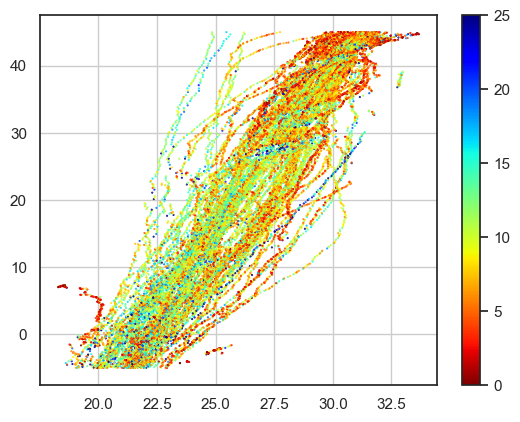

In [59]:
# Masksfpfdata、Groundtruth
# 车辆类型
# Mask_Rcnn
Ebike_Masksfpfdata = Masksfpfdata[(Masksfpfdata['Vehicle_type'].isin([22,33]))]
Eandbike_Masksfpf = Ebike_Masksfpfdata[Ebike_Masksfpfdata.loopid==0]

# Ebike_Groundtruth
# print(Groundtruth['Vehicle_type'])
Eandbike_Groundtruth = Groundtruth[(Groundtruth['Vehicle_type'].isin([22,33]))]

# Yolov7
Ebike_Yolosfpfdata = Yolosfpfdata[(Yolosfpfdata['Vehicle_type'].isin([22,33]))]
Ebike_Yolosfpfdatasfpf = Ebike_Yolosfpfdata[Ebike_Yolosfpfdata.loopid==0]

# Ebike_Groundtruth
# 显示轨迹
fig = Stmap(Ebike_Yolosfpfdatasfpf)

In [90]:
GT = Groundtruth[Groundtruth.Vehicle_type==22]

Yolov7_ebike_sfpf = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.Vehicle_type==22]
Orgtraj = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==0]

yolo_sfpf = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==1]

pathdata = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_sfpf_wavel0923.csv'
WT = pd.read_csv(pathdata)
df = pd.DataFrame(WT)
WT_bike = df[df.Vehicle_type==22]

finaltraj = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==200]

# vehid = pd.unique(yolo_sfpf.Object_id)
# for id in vehid:
#     G_traj = finaltraj[finaltraj.Object_id == id]
#     ORJ = Orgtraj[Orgtraj.Object_id == id]
#     WTt = WT_bike[WT_bike.Object_id == id]
#     Final = yolo_sfpf[yolo_sfpf.Object_id==id]
#     Mask_cv_r = Trajmap(G_traj,ORJ,Final,WTt)
#     fig = Stmap(data):
# Mask_cv_r = Trajmap(mask_sfpf)

NameError: name 'Yolov7_ebike_sfpf' is not defined

In [17]:
# Mask_cv_r = Stmap(Maskorginaldata)

In [16]:
# Yolc_CV_data
Mask_loop = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==1]
# Mask_loop[Mask_loop.World_x<=12]=[]
# Mask_loop[Mask_loop.World_x>=35]=[]
Yolo_cv_r = Trajmap(Mask_loop,)

NameError: name 'Yolov7_ebike_sfpf' is not defined

In [17]:
# Yolo_cv_r = Stmap(Yoloorginalebike)

In [18]:
# Yolo_cv_r = Stmap(Alldrectraj)

In [19]:
# Goundtruth data
# Gound_trth = Trajmap(Groundtruthebike)

In [20]:

# Yolov3_traj_map = Stmap(Yoloorginalebike)
# Yoloorginalebike

In [21]:
# Grouth_truth = Stmap(Groundtruthebike)

In [22]:
# 拟合原始CV数据运动参数值得分布，对比分布之间的差异，分别计算速度，加速度、加加速度

In [20]:
# 导入绘图的包，同时设置绘图框
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签，解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号，解决负号无法正常显示问题
%matplotlib inline  #让图表直接在jupyter notebook中展示出来

%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt #导入

import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色

UsageError: unrecognized arguments: #让图表直接在jupyter notebook中展示出来


In [21]:
# 速度分布
def Disspeedmap(cvdata1,cvdata2,Ground_truth):
    # 传入主颜色参数
    sns.distplot(Ground_truth,bins=20, hist=False, color="r",hist_kws={'alpha':0.6,'color':'dodgerblue'},kde_kws={"shade": True},label='Ground Truth')
    sns.distplot(cvdata1, bins=30,hist=False, color="k", hist_kws={'alpha':0.6,'color':'gray'},kde_kws={"shade": True},rug_kws={'color':'g'},label='YLDS Orginal')
    sns.distplot(cvdata2,bins=25, hist=False, color="b",hist_kws={'alpha':0.6,'color':'lightseagreen'}, kde_kws={"shade": True},rug_kws={'color':'b'},label='YLDS after SFPF')

    # Plot a historgram and kernel density estimate
    plt.legend()
    plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=16,rotation=0)
    plt.yticks(fontsize=16)
    # 坐标名称
    plt.rcParams.update({"font.size":18})
#     plt.title("The distribution of speed",fontsize=18)
    plt.ylabel('Density',fontsize=18)     #设置y轴名称

#     plt.setp(axes, yticks=[])
    plt.tight_layout()

In [96]:
# Y方向的速度分布

D:\Research-tools\python\installfile\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Research-tools\python\installfile\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Research-tools\python\installfile\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

Text(0.5, 49.249999999999986, 'Speed (m/s)')

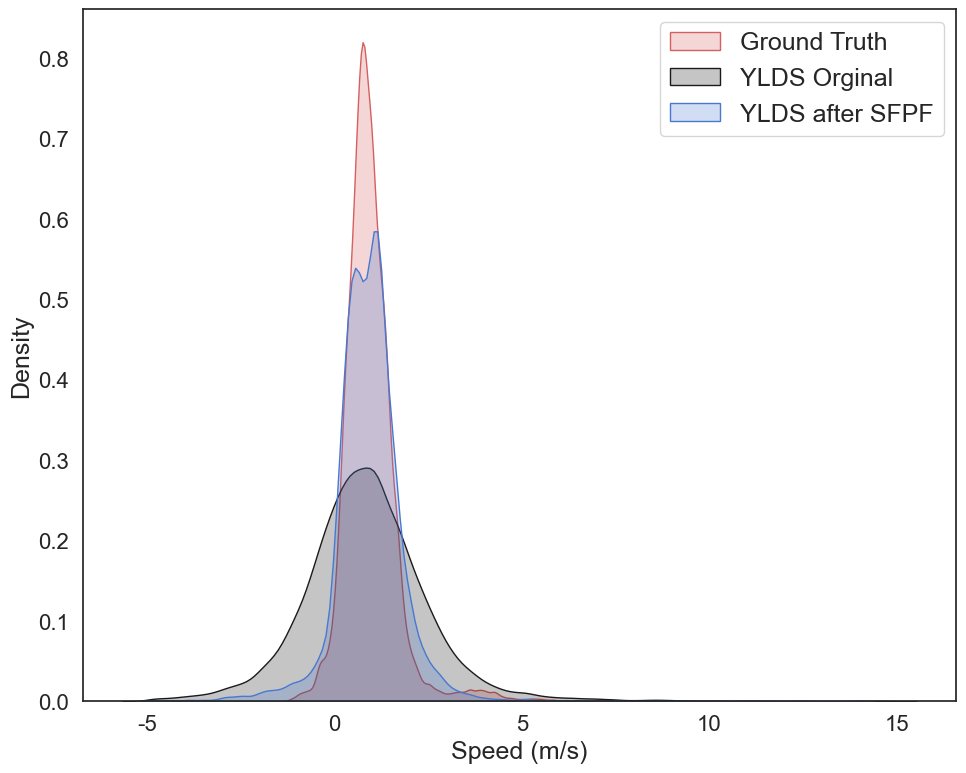

In [26]:
# 绘制参数分布对比图

import numpy as np
import seaborn as sns
from  scipy import stats
import matplotlib.pyplot as plt


# 导入数据
# #    Eandbike_Masksfpf\Eandbike_Groundtruth

%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
#DATA ground truth 

Ground = Eandbike_Groundtruth.speed_x
Ground_truth = Ground[Ground>=-5]
ground_truth = Ground_truth[Ground_truth<=15]

# Mask_rcnn_loop_0
Eandbike_M_sfpf0 = Ebike_Yolosfpfdata[Ebike_Yolosfpfdata.loopid ==0]
eb_mask_rcnn0 = Eandbike_M_sfpf0.speed_x
eb_mask_rcnn_xy0 = eb_mask_rcnn0[eb_mask_rcnn0>=-5]
eb_mask_rcnn_xyy0 = eb_mask_rcnn_xy0[eb_mask_rcnn_xy0<=15]

# Mask_rcnn_loop_10
Eandbike_M_sfpf10= Ebike_Yolosfpfdata[Ebike_Yolosfpfdata.loopid ==200]
eb_mask_rcnn10 = Eandbike_M_sfpf10.speed_x
eb_mask_rcnn_xy10 = eb_mask_rcnn10[eb_mask_rcnn10>=-5]
eb_mask_rcnn_xyy10 = eb_mask_rcnn_xy10[eb_mask_rcnn_xy10<=15]


# # Plot a filled kernel density estimate
# 分布检验
Pd0 = stats.kstest(ground_truth,"norm") 
P_different1 = stats.ks_2samp(ground_truth, eb_mask_rcnn_xyy0)
P_different2 = stats.ks_2samp(ground_truth, eb_mask_rcnn_xyy10)

# print(Pd0,P_different1,P_different2)

fig = plt.figure(figsize=(10,8))   
sns.despine(left=True)

# 分布图
speed = Disspeedmap(eb_mask_rcnn_xyy0,eb_mask_rcnn_xyy10,ground_truth)
plt.xlabel('Speed (m/s)',fontsize=18)     #设置x轴名称
# plt.savefig('./speed_dis_Y.pdf')
# plt.savefig('./speed_dis_Y.jpg')  #facecolor='grey', edgecolor='red'

In [27]:
# X方向的速度分布

In [28]:
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
##DATA ground truth 
Groundtruthebike = Groundtruthebike[Groundtruthebike.Vehicle_type==22]
Ground = Groundtruthebike.speed_y*3.6
Ground_truth = Ground[Ground>=-30]
ground_truth = Ground_truth[Ground_truth<=60]
# yolov5
pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal.csv'
yOLO_data = pd.read_csv(pathdata2)
df = pd.DataFrame(yOLO_data)
Yoloorginalebike =  df[df.Vehicle_type==22] 
YoloX = WT_bike.speed_y*3.6
YoloCV = YoloX[YoloX>=-30]
Yolo_cv = YoloCV[YoloCV<=60]
# Plot a filled kernel density estimate
# yolov5
pathdata3 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal.csv'
YOLOV7 = pd.read_csv(pathdata3)
df = pd.DataFrame(YOLOV7)

# Mask rcnn
YoloSFPFlebike =  df[df.Vehicle_type==22] 
YoloSFPF = YoloSFPFlebike.speed_y*3.6
YoloSFPF1 = YoloSFPF[YoloSFPF>=-30]
Yolo_cv0 = YoloSFPF1[YoloSFPF1<=60]

# MASKRCNN = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid ==1]
# MASK_RCNNTRJ = Mask_ebike_sfpf[Mask_ebike_sfpf.Vehicle_type==22]
# mask_rcnn = MASK_RCNNTRJ.speed_x
# mask_rcnn_cv = mask_rcnn[mask_rcnn>=-7]
# mask_rcnn_cv = mask_rcnn_cv[mask_rcnn_cv<=15]

fig = plt.figure(figsize=(10,8))   
sns.despine(left=True)
speed = Disspeedmap(Yolo_cv,Yolo_cv0,ground_truth)
plt.xlabel('Speed (Km/h)',fontsize=18)     #设置x轴名称
plt.savefig('./speed_dis_x.pdf')
plt.savefig('./speed_dis_x.jpg')  #facecolor='grey', edgecolor='red'

NameError: name 'WT_bike' is not defined

In [29]:
# 加速度分布
def Disaccmap(cvdata1,cvdata2,Ground_truth):
    sns.distplot(Ground_truth,hist=False, color="r",hist_kws={'alpha':0.6,'color':'gray'}, kde_kws={"shade": True},label='Ground Truth')
    sns.distplot(cvdata1,hist=False, color="k",hist_kws={'alpha':0.6,'color':'m'}, kde_kws={"shade": True},label='Yolov7 Orginal')
    sns.distplot(cvdata2,hist=False, color="b", hist_kws={'alpha':0.6,'color':'blue'},kde_kws={"shade": True},label='Yolov7 after SFPF')
    
#     sns.distplot(cvdata1, bins=30,hist=False, color="k", hist_kws={'alpha':0.6,'color':'gray'},kde_kws={"shade": True},rug_kws={'color':'g'},label='Yolov7 orginal')
    # Plot a historgram and kernel density estimate
    plt.legend()
    plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=16,rotation=0)
    plt.yticks(fontsize=16)
    # 坐标名称
    plt.rcParams.update({"font.size":18})
#     plt.title("The distribution of speed",fontsize=18)
    plt.ylabel('Density',fontsize=18)     #设置y轴名称
#     plt.setp(axes, yticks=[])
    plt.tight_layout()


In [30]:
# y方向加速度

In [31]:
##DATA ground truth 
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)
Groundtruthebike = Groundtruthebike[Groundtruthebike.Vehicle_type==22]
Ground = Groundtruthebike.acc_y
Ground_truth = Ground[Ground>=-10]
ground_truth = Ground_truth[Ground_truth<=45]
print(ground_truth.shape[0])
# sns.distplot(ground_truth,hist=True, color="g", kde_kws={"shade": True},label='Ground truth')
# print(len(ground_truth))
# yolov5
pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/clear_yolov7_orgina.csv'
yOLO_data = pd.read_csv(pathdata2)
df = pd.DataFrame(yOLO_data)

# Yolosfpf =  Yolosfpfdata[ Yolosfpfdata.loopid==10]
Yoloorginalebike =  df[df.Vehicle_type==22] 
YoloX = WT_bike.acc_y
YoloCV = YoloX[YoloX>=-100]
Yolo_cv = YoloCV[YoloCV<=100]
print(Yolo_cv.shape[0])
# sns.distplot(Yolo_cv,hist=True, color="g", kde_kws={"shade": True},label='Ground truth')
# print(len(Yolo_cv))

pathdata3 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Mask_orginal.csv'
YOLOV7 = pd.read_csv(pathdata3)
ddf = pd.DataFrame(YOLOV7)
# Mask rcnn
# MASKRCNN = Masksfpfdata[Masksfpfdata.loopid ==10]
MASK_RCNNTRJ = ddf[ddf.Vehicle_type==22]
mask_rcnn = MASK_RCNNTRJ.acc_y
mask_rcnn_cv = mask_rcnn[mask_rcnn>=-100]
mask_rcnn_cv = mask_rcnn_cv[mask_rcnn_cv<=100]
print(mask_rcnn_cv.shape[0])

# Plot a filled kernel density estimate
fig = plt.figure(figsize=(10,8))   
sns.despine(left=True)
speed = Disaccmap(Yolo_cv,mask_rcnn_cv,ground_truth)
plt.xlabel('Acceleration (m/s2)',fontsize=18)     #设置x轴名称
# plt.savefig('./acc_dis_y.pdf')
# plt.savefig('./acc_dis_y.jpg')  #facecolor='grey', edgecolor='red'

33261


NameError: name 'WT_bike' is not defined

In [27]:
import numpy as np
import scipy.stats
p=np.asarray([0.65,0.25,0.07,0.03,8])
q=np.array([0.6,0.25,0.1,0.05,9])
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q, base=8)
print(KL_divergence(p,q)) # 0.01693110139988926
print(KL_divergence(q,p)) # 0.019019266539324498

0.0009466270691422068
0.0009437781689879411


In [28]:
import numpy as np
import scipy.stats
p=np.asarray([0.65,0.25,0.07,0.03,1])
q=np.array([0.6,0.25,0.1,0.05])
q2=np.array([0.1,0.2,0.3,0.4])
def JS_divergence(p,q):
    M=(p+q)/2
    return 0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
print(JS_divergence(p,q))  # 0.004463665396105692
print(JS_divergence(p,q2)) # 0.35662209477833745
print(JS_divergence(p,p)) # 0.0

ValueError: operands could not be broadcast together with shapes (5,) (4,) 

In [29]:
from scipy.stats import norm
import pandas as pd
def JS_div(arr1,arr2,num_bins):
    max0 = max(np.max(arr1),np.max(arr2))
    min0 = min(np.min(arr1),np.min(arr2))
    bins = np.linspace(min0-1e-4, max0-1e-4, num=num_bins)
    PDF1 = pd.cut(arr1,bins).value_counts() / len(arr1)
    PDF2 = pd.cut(arr2,bins).value_counts() / len(arr2)
    return JS_divergence(PDF1.values,PDF2.values)

In [30]:
#code-python(3.6)
from scipy.stats import wasserstein_distance


In [36]:
#1000个均值170，标准差10的正态分布身高样本
# h_real = norm.rvs(loc=170, scale=10, size=1000) 
# h_predict1 = norm.rvs(loc=168, scale=9, size=2000)
# h_predict2 = norm.rvs(loc=160, scale=20, size=3000)


yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Yolov7_CV_S_Rawdata.csv'
# yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'
Yolov7_ebike_data = pd.read_csv(yolov7data)
# print(Yolov7_ebike_data)
Yolov7_ebike = pd.DataFrame(Yolov7_ebike_data)
Yolov7_ebike_speedx = Yolov7_ebike.speed_x
# print(Yolov7_ebike_speedx)
# yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'

# mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Yolo0926.csv'
mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Mask_CV_S_Rawdata.csv'
mask_ebikedata = pd.read_csv(mask_ebike_data)
# print(Yolov7_ebike_data)
mask_ebike = pd.DataFrame(mask_ebikedata)
mask_ebike_speedx = mask_ebike['speed_x']



In [31]:
import numpy as np
import pandas as pd
from scipy import stats

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
e = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (e, std))

#kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
#结果返回两个值：statistic → D值，pvalue → P值
#p值大于0.05，为正态分布
#KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)
#p值大于0.05，不拒绝原假设，因此上面的数据服从正态分布。
#且一般情况下， stats.kstest(df[‘value’], ‘norm’, (u, std))一条语句就得到p值的结果。

#from scipy import stats
#stats.kstest(rvs, cdf, args=(),…)
#其中rvs可以是数组、生成数组的函数或者scipy.stats里面理论分布的名字
#cdf可以与rvs一致。若rvs和cdf同是数组，则是比较两数组的分布是否一致；一个是数组，另一个是理论分布的名字，则是看样本是否否和理论分布
#args是一个元组，当rvs或者cds是理论分布时，这个参数用来存储理论分布的参数，如正态分布的mean和std。

KstestResult(statistic=0.1590180704824098, pvalue=0.3056480127078781)

In [32]:
import numpy as np
import scipy.stats

# 随机生成两个离散型分布
def KL(X,Y):
    px = x / np.sum(x)
    py = y / np.sum(y)
    # 利用scipy API进行计算
    # scipy计算函数可以处理非归一化情况，因此这里使用
    # scipy.stats.entropy(x, y)或scipy.stats.entropy(px, py)均可
    KL1= scipy.stats.entropy(x, y) 
    # 实现
    KL2= 0.0
    for i in range(10):
        KL2+= px[i] * np.log(px[i] / py[i])
        # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))
    return KL1,KL2

In [33]:
x = [np.random.randint(1, 11) for i in range(10)]
y = [np.random.randint(1, 20) for i in range(10)]
A,B = KL(x,y)
print(A,B)

0.29570587583016733 0.29570587583016733


0.007361127098347299
0.002364736858290031
0.6037947272026928
0.28584037498271925


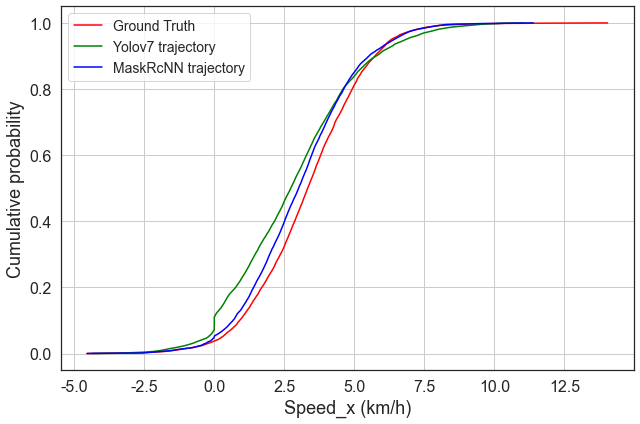

In [33]:
# 重新计算运动参数
# 横向速度分布
yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Yolov7_CV_S_Rawdata.csv'
# yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'
Yolov7_ebike_data = pd.read_csv(yolov7data)
# print(Yolov7_ebike_data)
Yolov7_ebike = pd.DataFrame(Yolov7_ebike_data)

# yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'
# mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Yolo0926.csv'
mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Mask_CV_S_Rawdata.csv'
mask_ebikedata = pd.read_csv(mask_ebike_data)
# print(Yolov7_ebike_data)
mask_ebike = pd.DataFrame(mask_ebikedata)

# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp
%matplotlib inline

Ground_traj = Groundtruthebike[Groundtruthebike['speed_x'].astype(float) >=-10]

data = Ground_traj.speed_x*3.6
Yolov7_ebike_traj_1 = Yolov7_ebike[Yolov7_ebike['speed_x'].astype(float) >= -1.5]
Yolov7_ebike_traj_2 = Yolov7_ebike_traj_1[Yolov7_ebike_traj_1['speed_x'].astype(float) <= 10]
# print(min(Yolov7))
# Yolov7[Yolov7['speed_y']<0]=[]
data2 = Yolov7_ebike_traj_2.speed_x*3.6
mask_ebike_traj_1 = mask_ebike[mask_ebike['speed_x'].astype(float) >=-1.5]
mask_ebike_traj_2 = mask_ebike_traj_1[mask_ebike_traj_1['speed_x'].astype(float) <= 10]
data3 = mask_ebike_traj_2.speed_x*3.6

# print(Q)
# JS检验
print(JS_div(data2,data,num_bins=30))  # 0.0014
print(JS_div(data,data3,num_bins=30))  # 0.0014


# print(JS_div(h_real,h_predict2,num_bins=20))  # 0.1978
from scipy.stats import wasserstein_distance
print(wasserstein_distance(data,data2))
print(wasserstein_distance(data,data3))


# data = np.random.randn(N)
N = data.shape[0]
N2 = data2.shape[0]
N3 = data3.shape[0]
# sort the data in ascending order
x = np.sort(data)
# print(x)
x2 = np.sort(data2)
# print(x2)
x3 = np.sort(data3)
# print(x3)
# get the cdf values of y
y = np.arange(N) / float(N)
y2 = np.arange(N2) / float(N2)  
y3 = np.arange(N3) / float(N3)  
# plotting
fig = plt.figure(figsize=(9,6))   
plt.xlabel('Speed_x (km/h)',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.ylabel('Cumulative probability',fontsize=18)
  
# plt.title('CDF using sorting the data',fontsize=18)
  
plt.plot(x, y,color='red',label='Ground Truth')
plt.plot(x2, y2,color='green',label='Yolov7 trajectory')
plt.plot(x3, y3,color='blue',label='MaskRcNN trajectory')
plt.legend(loc="upper left",fontsize=14)   #设置图例字体大小

plt.tight_layout()
    
plt.grid()
plt.show()


D:\Research-tools\python\installfile\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Research-tools\python\installfile\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Research-tools\python\installfile\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

0.5472670481751719
0.16698733034156318
9.480825870726823
1.0833859374130592


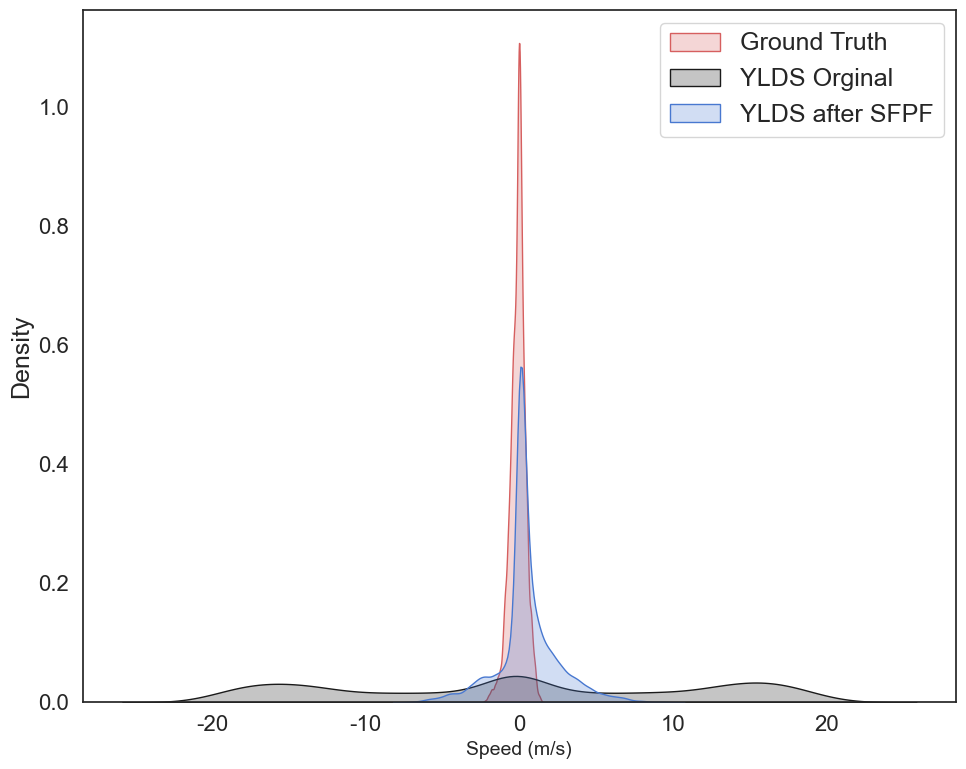

In [66]:
# 绘制参数分布对比图
import numpy as np
import seaborn as sns
from  scipy import stats
import matplotlib.pyplot as plt

# 导入数据
# #  Eandbike_Masksfpf/Eandbike_Groundtruth

%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
#DATA ground truth 


Eandbike_Groundtruth=Eandbike_Groundtruth[Eandbike_Groundtruth['Vehicle_type']==22]

# Mask_RCNN
Ebike_Masksfpfdata1=Ebike_Masksfpfdata[Ebike_Masksfpfdata['Vehicle_type']==22]

# Yolov7
Ebike_Yolosfpfdata1=Ebike_Yolosfpfdata[Ebike_Yolosfpfdata['Vehicle_type']==22]


Ground = Eandbike_Groundtruth.acc_y
Ground_truth = Ground[Ground>=-7.5]
ground_truth = Ground_truth[Ground_truth<=10]

# Mask_rcnn_loop_0
Eandbike_M_sfpf0 = Ebike_Masksfpfdata1[Ebike_Masksfpfdata1.loopid ==0]
eb_mask_rcnn0 = Eandbike_M_sfpf0.acc_y
eb_mask_rcnn_xy0 = eb_mask_rcnn0[eb_mask_rcnn0>=-20]
eb_mask_rcnn_xyy0 = eb_mask_rcnn_xy0[eb_mask_rcnn_xy0<=20]

# Mask_rcnn_loop_10
Eandbike_M_sfpf10= Ebike_Masksfpfdata1[Ebike_Masksfpfdata1.loopid ==1]
eb_mask_rcnn10 = Eandbike_M_sfpf10.acc_y
eb_mask_rcnn_xy10 = eb_mask_rcnn10[eb_mask_rcnn10>=-7.5]
eb_mask_rcnn_xyy10 = eb_mask_rcnn_xy10[eb_mask_rcnn_xy10<=10]

# # Plot a filled kernel density estimate
# 分布检验
Pd0 = stats.kstest(ground_truth,"norm") 
P_different1 = stats.ks_2samp(ground_truth, eb_mask_rcnn_xyy0)
P_different2 = stats.ks_2samp(ground_truth, eb_mask_rcnn_xyy10)

# print(Pd0,P_different1,P_different2)

fig = plt.figure(figsize=(10,8))   
sns.despine(left=True)

# 分布图
speed = Disspeedmap(eb_mask_rcnn_xyy0,eb_mask_rcnn_xyy10,ground_truth)
plt.xlabel('Speed (m/s)',fontsize=14)     #设置x轴名称
plt.savefig('E:/研究进展/IEEE TIS/分布对比/Mark RCNN/acc_dis_y.pdf')
# plt.savefig('./speed_dis_Y.jpg')  #facecolor='grey', edgecolor='red'

print(JS_div(ground_truth,eb_mask_rcnn_xyy0,num_bins=30))  # 0.0014
print(JS_div(ground_truth,eb_mask_rcnn_xyy10,num_bins=30))  # 0.0014

# print(JS_div(h_real,h_predict2,num_bins=20))  # 0.1978
from scipy.stats import wasserstein_distance
print(wasserstein_distance(eb_mask_rcnn_xyy0,ground_truth))
print(wasserstein_distance(eb_mask_rcnn_xyy10,ground_truth))

0.01655283415739603
0.005925229837475975
1.2247438951184382
0.9051156298440833


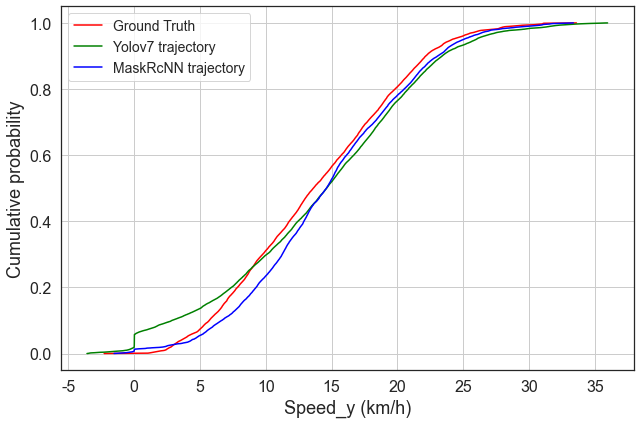

In [34]:
# 重新计算运动参数
# 纵向速度拟合
yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Yolov7_CV_S_Rawdata.csv'
Yolov7_ebike_data = pd.read_csv(yolov7data)
Yolov7_ebike = pd.DataFrame(Yolov7_ebike_data)

mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Mask_CV_S_Rawdata.csv'
mask_ebikedata = pd.read_csv(mask_ebike_data)
mask_ebike = pd.DataFrame(mask_ebikedata)

# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp
%matplotlib inline

Ground_traj = Groundtruthebike[Groundtruthebike['speed_y'].astype(float) >=-10]

data = Ground_traj.speed_y*3.6
Yolov7_ebike_traj_1 = Yolov7_ebike[Yolov7_ebike['speed_y'].astype(float) >= -1.0]
Yolov7_ebike_traj_2 = Yolov7_ebike_traj_1[Yolov7_ebike_traj_1['speed_y'].astype(float) <= 10]
# print(min(Yolov7))
# Yolov7[Yolov7['speed_y']<0]=[]
data2 = Yolov7_ebike_traj_2.speed_y*3.6
mask_ebike_traj_1 = mask_ebike[mask_ebike['speed_y'].astype(float) >=-1.0]
mask_ebike_traj_2 = mask_ebike_traj_1[mask_ebike_traj_1['speed_y'].astype(float) <= 10]
data3 = mask_ebike_traj_2.speed_y*3.6

# 

# JS检验
print(JS_div(data2,data,num_bins=30))  # 0.0014
print(JS_div(data,data3,num_bins=30))  # 0.0014


# print(JS_div(h_real,h_predict2,num_bins=20))  # 0.1978
from scipy.stats import wasserstein_distance
print(wasserstein_distance(data,data2))
print(wasserstein_distance(data,data3))

# data = np.random.randn(N)
N = data.shape[0]
N2 = data2.shape[0]
N3 = data3.shape[0]
# sort the data in ascending order
x = np.sort(data)
# print(x)
x2 = np.sort(data2)
# print(x2)
x3 = np.sort(data3)
# print(x3)
# get the cdf values of y
y = np.arange(N) / float(N)
y2 = np.arange(N2) / float(N2)  
y3 = np.arange(N3) / float(N3)  
# plotting
fig = plt.figure(figsize=(9,6))   
plt.xlabel('Speed_y (km/h)',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.ylabel('Cumulative probability',fontsize=18)
  
# plt.title('CDF using sorting the data',fontsize=18)
  
plt.plot(x, y,color='red',label='Ground Truth')
plt.plot(x2, y2,color='green',label='Yolov7 trajectory')
plt.plot(x3, y3,color='blue',label='MaskRcNN trajectory')
plt.legend(loc="upper left",fontsize=14)   #设置图例字体大小

plt.tight_layout()
    
plt.grid()
plt.show()


0.0683400067804105
0.04578038801025448
0.18930288392085973
0.13038050180174043


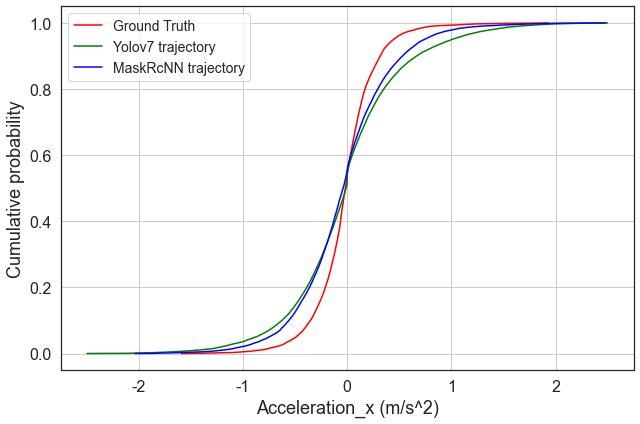

In [35]:
# 重新计算运动参数
# 横向加速度
yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Yolov7_CV_S_Rawdata.csv'
Yolov7_ebike_data = pd.read_csv(yolov7data)
# print(Yolov7_ebike_data)
Yolov7_ebike = pd.DataFrame(Yolov7_ebike_data)

mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Mask_CV_S_Rawdata.csv'
mask_ebikedata = pd.read_csv(mask_ebike_data)
# print(Yolov7_ebike_data)
mask_ebike = pd.DataFrame(mask_ebikedata)


# traj_ground0 = Groundtruthebike[roundtruthebike.Object_id ==ground_id]
# traj_ground0 = pd.DataFrame(traj_ground0)
# # CV输出的轨迹数据
# Yolov7 = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid ==1]
# Yolov7_ebike = Yolov7[Yolov7.Vehicle_type==22]
# # traj_compare0 = CV_traj_loops[CV_traj_loops.Object_id == yolo_id]
# #         MaskRcnn
# mask = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid == 1]
# mask_ebike = mask[mask.Vehicle_type==22]
# # traj_compare0 = mask_traj_loops[mask_traj_loops.Object_id == yolo_id]

# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp
%matplotlib inline

Ground_traj = Groundtruthebike[Groundtruthebike['acc_x'].astype(float) >=-10]

data = Ground_traj.acc_x
Yolov7_ebike_traj_1 = Yolov7_ebike[Yolov7_ebike['acc_x'].astype(float) >= -2.5]
Yolov7_ebike_traj_2 = Yolov7_ebike_traj_1[Yolov7_ebike_traj_1['acc_x'].astype(float) <= 2.5]
# print(min(Yolov7))
# Yolov7[Yolov7['speed_y']<0]=[]
data2 = Yolov7_ebike_traj_2.acc_x
mask_ebike_traj_1 = mask_ebike[mask_ebike['acc_x'].astype(float) >=-2.5]
mask_ebike_traj_2 = mask_ebike_traj_1[mask_ebike_traj_1['acc_x'].astype(float) <= 2.5]
data3 = mask_ebike_traj_2.acc_x


# KS检验

# JS检验
# print(JS_div(data,data2,num_bins=20))  # 0.0014
# print(JS_div(data,data3,num_bins=20))  # 0.0014
print(JS_div(data2,data,num_bins=30))  # 0.0014
print(JS_div(data,data3,num_bins=30))  # 0.0014

# print(JS_div(h_real,h_predict2,num_bins=20))  # 0.1978
from scipy.stats import wasserstein_distance
print(wasserstein_distance(data,data2))
print(wasserstein_distance(data,data3))

# data = np.random.randn(N)
N = data.shape[0]
N2 = data2.shape[0]
N3 = data3.shape[0]
# sort the data in ascending order
x = np.sort(data)
# print(x)
x2 = np.sort(data2)
# print(x2)
x3 = np.sort(data3)
# print(x3)
# get the cdf values of y
y = np.arange(N) / float(N)
y2 = np.arange(N2) / float(N2)  
y3 = np.arange(N3) / float(N3)  
# plotting
fig = plt.figure(figsize=(9,6))   
plt.xlabel('Acceleration_x (m/s^2)',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.ylabel('Cumulative probability',fontsize=18)
  
# plt.title('CDF using sorting the data',fontsize=18)
  
plt.plot(x, y,color='red',label='Ground Truth')
plt.plot(x2, y2,color='green',label='Yolov7 trajectory')
plt.plot(x3, y3,color='blue',label='MaskRcNN trajectory')
plt.legend(loc="upper left",fontsize=14)   #设置图例字体大小

plt.tight_layout()
    
plt.grid()
plt.show()


0.049101068520178884
0.026123137727418637
0.22768442445760928
0.1387396935346108


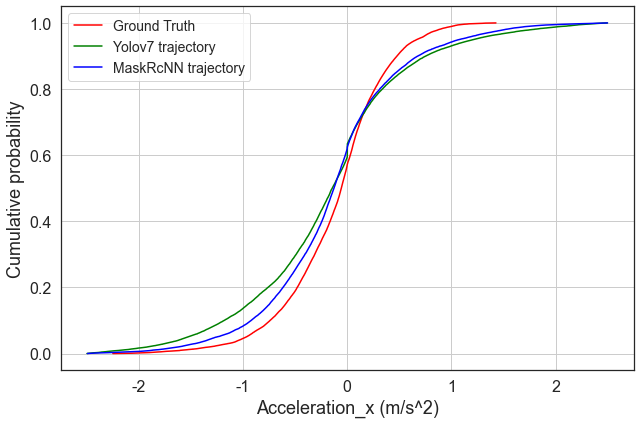

In [64]:
# 重新计算运动参数
# 纵向加速度
yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Yolov7_CV_S_Rawdata.csv'
Yolov7_ebike_data = pd.read_csv(yolov7data)
# print(Yolov7_ebike_data)
Yolov7_ebike = pd.DataFrame(Yolov7_ebike_data)

mask_ebike_data = r'E:\CodeResource\000_Mycode\GA_social_force_model\trajectoryformcv\YL_orginaldata\cleandata\import_divide\Mask_CV_S_Rawdata.csv'
mask_ebikedata = pd.read_csv(mask_ebike_data)
# print(Yolov7_ebike_data)
mask_ebike = pd.DataFrame(mask_ebikedata)


# traj_ground0 = Groundtruthebike[roundtruthebike.Object_id ==ground_id]
# traj_ground0 = pd.DataFrame(traj_ground0)
# # CV输出的轨迹数据
# Yolov7 = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid ==1]
# Yolov7_ebike = Yolov7[Yolov7.Vehicle_type==22]
# # traj_compare0 = CV_traj_loops[CV_traj_loops.Object_id == yolo_id]
# #         MaskRcnn
# mask = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid == 1]
# mask_ebike = mask[mask.Vehicle_type==22]
# # traj_compare0 = mask_traj_loops[mask_traj_loops.Object_id == yolo_id]

# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp
%matplotlib inline

Ground_traj = Groundtruthebike[Groundtruthebike['acc_y'].astype(float) >=-10]

data = Ground_traj.acc_y
Yolov7_ebike_traj_1 = Yolov7_ebike[Yolov7_ebike['acc_y'].astype(float) >= -2.5]
Yolov7_ebike_traj_2 = Yolov7_ebike_traj_1[Yolov7_ebike_traj_1['acc_y'].astype(float) <= 2.5]
# print(min(Yolov7))
# Yolov7[Yolov7['speed_y']<0]=[]
data2 = Yolov7_ebike_traj_2.acc_y
mask_ebike_traj_1 = mask_ebike[mask_ebike['acc_y'].astype(float) >=-2.5]
mask_ebike_traj_2 = mask_ebike_traj_1[mask_ebike_traj_1['acc_y'].astype(float) <= 2.5]
data3 = mask_ebike_traj_2.acc_y


# KS检验
# JS检验
print(JS_div(data,data2,num_bins=30))  # 0.0014
print(JS_div(data,data3,num_bins=30))  # 0.0014


# print(JS_div(h_real,h_predict2,num_bins=20))  # 0.1978
from scipy.stats import wasserstein_distance
print(wasserstein_distance(data,data2))
print(wasserstein_distance(data,data3))

# data = np.random.randn(N)
N = data.shape[0]
N2 = data2.shape[0]
N3 = data3.shape[0]
# sort the data in ascending order
x = np.sort(data)
# print(x)
x2 = np.sort(data2)
# print(x2)
x3 = np.sort(data3)
# print(x3)
# get the cdf values of y
y = np.arange(N) / float(N)
y2 = np.arange(N2) / float(N2)  
y3 = np.arange(N3) / float(N3)  
# plotting
fig = plt.figure(figsize=(9,6))   
plt.xlabel('Acceleration_x (m/s^2)',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.ylabel('Cumulative probability',fontsize=18)
  
# plt.title('CDF using sorting the data',fontsize=18)
  
plt.plot(x, y,color='red',label='Ground Truth')
plt.plot(x2, y2,color='green',label='Yolov7 trajectory')
plt.plot(x3, y3,color='blue',label='MaskRcNN trajectory')
plt.legend(loc="upper left",fontsize=14)   #设置图例字体大小

plt.tight_layout()
    
plt.grid()
plt.show()


D:\Research-tools\python\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Research-tools\python\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Research-tools\python\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

0.5524484694087957
0.15835201701247384
4.118046190325164
0.7182753725866651


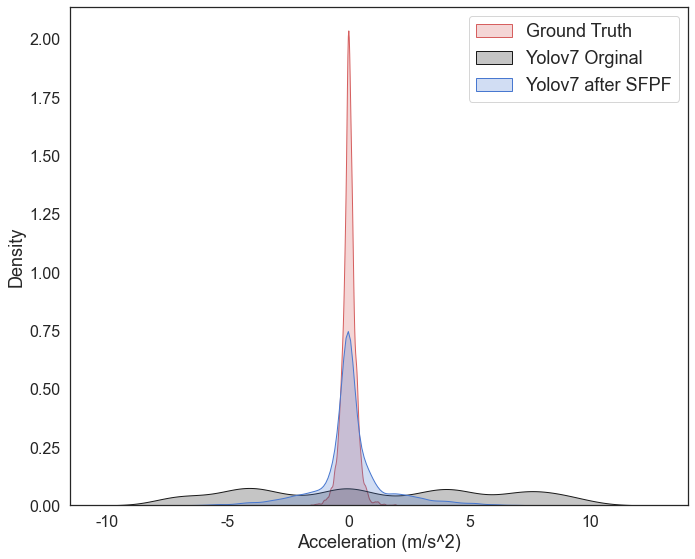

In [87]:
##DATA ground truth 
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
Ground = Groundtruthebike.acc_x
Ground_truth = Ground[Ground>=-10]
ground_truth = Ground_truth[Ground_truth<=10]
# yolov5


# # yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\Otherfilter\wavelet_filter_yolov7.csv'
# Yolov7_ebike_data = pd.read_csv(yolov7data)
# # print(Yolov7_ebike_data)
# Yolov7_ebike = pd.DataFrame(Yolov7_ebike_data)

#
Yolosfpf =  Yolov7_ebike_sfpf[ Yolov7_ebike_sfpf.loopid==1]
# Yolosfpf = Yolov7_ebike
Yoloorginalebike =  Yolosfpf[Yolosfpf.Vehicle_type==22] 
YoloX = Yoloorginalebike.acc_x
YoloCV = YoloX[YoloX>=-7.5]
Yolo_cv = YoloCV[YoloCV<=10]
# Yolosfpf =  Yolosfpfdata[ Yolosfpfdata.loopid==10]
# Yoloorginalebike =  Yolosfpf[Yolosfpf.Vehicle_type==22] 
# Mask rcnn
# pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal.csv'
# yOLO_data = pd.read_csv(pathdata2)
# MASKRCNN = pd.DataFrame(yOLO_data)


# MASKRCNN = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid ==10]
MASKRCNN =  Yolov7_ebike_sfpf[ Yolov7_ebike_sfpf.loopid==0]
MASK_RCNNTRJ = MASKRCNN[MASKRCNN.Vehicle_type==22]
mask_rcnn = MASK_RCNNTRJ.acc_x
mask_rcnn_cv = mask_rcnn[mask_rcnn>=-7.5]
mask_rcnn_cv = mask_rcnn_cv[mask_rcnn_cv<=10]

# Plot a filled kernel density estimate
fig = plt.figure(figsize=(10,8))   
sns.despine(left=True)
# speed = Disaccmap(mask_rcnn_cv,Yolo_cv,ground_truth)
speed = Disspeedmap(mask_rcnn_cv,Yolo_cv,Ground_truth)

plt.xlabel('Acceleration (m/s^2)',fontsize=18)     #设置x轴名称
# plt.savefig('./acc_dis_x.pdf')
# plt.savefig('./acc_dis_x.jpg')  #facecolor='grey', edgecolor='red'
# KS检验
# JS检验

print(JS_div(Ground_truth,mask_rcnn_cv,num_bins=30))  # 0.0014
print(JS_div(Ground_truth,Yolo_cv,num_bins=30))  # 0.0014


# print(JS_div(h_real,h_predict2,num_bins=20))  # 0.1978
from scipy.stats import wasserstein_distance
print(wasserstein_distance(mask_rcnn_cv,Ground_truth))
print(wasserstein_distance(Yolo_cv,Ground_truth))


In [39]:
# 对比分布的差异
import numpy as np
import scipy.stats

# 随机生成两个离散型分布
# 导入数据
Ground = Groundtruthebike.speed_x
Ground_truth = Ground[Ground>=-20]
ground_truth = Ground_truth[Ground_truth<=60]


pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/clear_yolov7_orgina.csv'
yOLO_data = pd.read_csv(pathdata2)
df = pd.DataFrame(yOLO_data)

# Yolosfpf =  Yolosfpfdata[ Yolosfpfdata.loopid==10]
Yoloorginalebike =  df[df.Vehicle_type==22] 
YoloX = Yoloorginalebike.speed_x
YoloCV = YoloX[YoloX>=-20]
Yolo_cv = YoloCV[YoloCV<=60]
# sns.distplot(Yolo_cv,hist=True, color="g", kde_kws={"shade": True},label='Ground truth')
# print(len(Yolo_cv))

pathdata3 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Mask_orginal.csv'
YOLOV7 = pd.read_csv(pathdata3)
ddf = pd.DataFrame(YOLOV7)
# Mask rcnn
# MASKRCNN = Masksfpfdata[Masksfpfdata.loopid ==10]
MASK_RCNNTRJ = ddf[ddf.Vehicle_type==22]
mask_rcnn = MASK_RCNNTRJ.speed_x
mask_rcnn_cv = mask_rcnn[mask_rcnn>=-20]
mask_rcnn_cv = mask_rcnn_cv[mask_rcnn_cv<=60]


# x = [np.random.randint(1, 11) for i in range(10)]
x = pd.array(ground_truth)
# print(x)
print(np.sum(x))
px = x / np.sum(x)
print(px)
# y = [np.random.randint(1, 11) for i in range(10)]

y = pd.array(Yolo_cv)
# print(y)
print(np.sum(y))
py = y / np.sum(y)
print(py)

# 利用scipy API进行计算
# scipy计算函数可以处理非归一化情况，因此这里使用
# scipy.stats.entropy(x, y)或scipy.stats.entropy(px, py)均可
KL = scipy.stats.entropy(px, py) 
print(KL)

# 实现
KL = 0.0
for i in range(10):
    KL += px[i] * np.log(px[i] / py[i])
    # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))

print(KL)

30733.318973308
<PandasArray>
[ 5.104460049897255e-05, 5.0942052641946853e-05, 5.0857763242476203e-05,
  5.079289306032205e-05,  5.075215209768514e-05,  5.073949459719396e-05,
 5.0758141558184334e-05,  5.081059118138969e-05, 5.0898615192149785e-05,
  5.102324081437193e-05,
 ...
  6.502252004528314e-05,  6.526022788953989e-05,   6.54760966346553e-05,
  6.566907520638558e-05,  6.583357751752194e-05,  6.596915760256315e-05,
  6.607610478919323e-05,  6.615538997808274e-05,  6.620862422204516e-05,
  6.623802979977612e-05]
Length: 33261, dtype: float64
22548.782542072
<PandasArray>
[ 0.00012558779453907413,   6.961868043522983e-05,   6.942981746703836e-05,
   2.229066962095124e-05,   7.369627353048664e-05,  2.2118710093080264e-05,
  5.1922616124197026e-05,  0.00012817512846236448,  5.1041085914620864e-05,
   7.664202006363389e-05,
 ...
   3.752258626031582e-05, -2.6335474116707365e-05,   3.744641651603825e-05,
   5.541728506488029e-06,   5.676890060967234e-05, -4.5070656790617736e-05,
 -0.00

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [39]:
import numpy as np
import scipy.stats

x = [np.random.randint(1,110) for i in range(20)]
print(x)
print(np.sum(x))
px = x/np.sum(x)#归一化
print(px)

y = [np.random.randint(1, 100) for i in range(10)]
print(y)
print(np.sum(y))
py = y / np.sum(y)#归一化
print(py)
## scipy计算函数可以处理非归一化情况，因此这里使用# scipy.stats.entropy(x, y)或scipy.stats.entropy(px, py)均可
KL = scipy.stats.entropy(x, y) 
print(KL)

#自己编程实现
kl= 0.0
for i in range(90):
    kl += px[i] * np.log(px[i]/py[i])
print(kl)

[49, 87, 88, 94, 46, 41, 108, 86, 78, 3, 105, 64, 55, 9, 55, 87, 97, 21, 31, 83]
1287
[0.03807304 0.06759907 0.06837607 0.07303807 0.03574204 0.03185703
 0.08391608 0.06682207 0.06060606 0.002331   0.08158508 0.04972805
 0.04273504 0.00699301 0.04273504 0.06759907 0.07536908 0.01631702
 0.02408702 0.06449106]
[4, 9, 48, 22, 33, 79, 74, 56, 8, 18]
351
[0.01139601 0.02564103 0.13675214 0.06267806 0.09401709 0.22507123
 0.21082621 0.15954416 0.02279202 0.05128205]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [29]:
# 逐条轨迹显示其速度和加速度（选取交互环境下的轨迹）
# 需要计算加加速度

In [15]:
# 二维轨迹显示
def Mapoftraj(data):
    # 获取车辆数
    df = pd.DataFrame(data)
    vehids = pd.unique(df["Object_id"])
    for vehid in vehids:
        traj_id = df[df.Object_id==vehid]
        plt.plot(traj_id["World_x"],traj_id["World_y"],c="yellowgreen",linestyle="-")
        

In [16]:
def XYmap(traj_data):
    fig = plt.figure(figsize=(12,8))   
    sns.despine(left=True)
    trajmap = Mapoftraj(traj_data)
    plt.xlabel('X (m)',fontsize=18)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=16,rotation=0)
    plt.yticks(fontsize=16)
    # 坐标名称
    plt.rcParams.update({"font.size":18})
    plt.title("The trajectory",fontsize=18)
    plt.ylabel('Y(m)',fontsize=18)     #设置y轴名称

In [17]:
## Groundtruthebike
# Ground_ebike = XYmap(Groundtruthebike)

In [18]:
# 时空轨迹显示
def Mapframetraj_y(data):
    # 获取车辆数
    df = pd.DataFrame(data)
    vehids = pd.unique(df["Object_id"])
    for vehid in vehids:
        traj_id = df[df.Object_id==vehid]
        plt.plot(traj_id["frame_id"],traj_id["World_y"],c="yellowgreen",linestyle="-")

In [19]:
# 时空图
def Stmap(trajdadta):
    fig = plt.figure(figsize=(12,8))   
    sns.despine(left=True)
    trajmap = Mapframetraj_y(trajdadta)
    plt.xlabel('time (0.04s/frame)',fontsize=18)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=16,rotation=0)
    plt.yticks(fontsize=16)
    # 坐标名称
    plt.rcParams.update({"font.size":18})
    plt.title("The trajectory",fontsize=18)
    plt.ylabel('Y(m)',fontsize=18)     #设置y轴名称
    plt.tight_layout()

In [20]:
from matplotlib.pyplot import MultipleLocator
# 多维轨迹显示图
# 绘制时空分布图
def Stmap2(data):
    # 计算车辆个数
    vehids = pd.unique(data["Object_id"])
    # 设置图框大小
#     plt.Figure([1200,1200],dpi=1000)
    fig = plt.figure(figsize=(14,7))   
    sns.despine(left=True)    
    for vehid in vehids:
        # 获取第vehid辆车的轨迹
        traj_vehid = data[data.Object_id == vehid]
        # 获取x方向轨迹点
        x = traj_vehid['frame_id']
        y = traj_vehid['World_y']
        v = traj_vehid['speed_y']*3.6
        norm = matplotlib.colors.Normalize(vmin=0, vmax=50)
        # 绘制散点图
        ax = plt.scatter(x,y, marker = '.', s=1, c=v, cmap='jet_r', norm = norm)       
    plt.xlabel('time (0.04s/frame)',fontsize=18)     #设置x轴名称
#     plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=16,rotation=0)
    plt.yticks(fontsize=16)
    # 坐标名称
    plt.rcParams.update({"font.size":18})
#     plt.title("The trajectory",fontsize=18)
    plt.ylabel('Y(m)',fontsize=18)     #设置y轴名称
    plt.tight_layout()
    plt.clim(0, 60)
    
    plt.colorbar()
#     plt.title("The trajectory",fontsize=18)
    plt.grid()
    plt.show()

In [21]:
# 轨迹数据的平齐
def Areatraj(traj_CVCV):
    # 对上述数据进行处理
    # 取y得区间（-6,45）之间
    # 选择yolo输出数据中的自行车数据
    traj_ebike = traj_CVCV[traj_CVCV.Vehicle_type==22]
    traj_ebike_traj = traj_ebike[traj_ebike.World_y>=-6]
    ebike_CV_traj = traj_ebike_traj[traj_ebike_traj.World_y<=45]
    return ebike_CV_traj

In [18]:
# 导入数据
pathMASKfile = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\fram\YOLO_RAW.csv"
MASKRCNN = pd.read_csv(pathMASKfile)
MASKRCNNTRJ = pd.DataFrame(MASKRCNN) #swatch the dict to dataframe

In [47]:
MASK_RCNNTRJ = MASKRCNNTRJ[MASKRCNNTRJ.Vehicle_type==22]
# print(MASK_RCNNTRJ)

NameError: name 'MASKRCNNTRJ' is not defined

In [22]:
Yolosfpf =  Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==200]
Yoloorginalebike =  Yolosfpf[Yolosfpf.Vehicle_type==22] 
# pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0919102.csv'
yOLO_data = pd.read_csv(pathdata2)
df = pd.DataFrame(yOLO_data)
# Mask rcnn
# MASKRCNN = Masksfpfdata[Masksfpfdata.loopid ==200]
# MASK_RCNNTRJ = df[df.Vehicle_type==22]

yolo_sfpf = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==1]
Orgtraj = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==0]
finaltraj = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==200]

# data from Maskrcnn
# ground_truth = Stmap2(Groundtruthebike)
# 选择yolo输出数据中的自行车数据
# MASK_RCNNTRJ = MASK_RCNNTRJ[MASK_RCNNTRJ.Vehicle_type==22]
# Overtimecar = [1386,1608,2508,2634,2651,2692,2699,2724,2735,2825,2827,2841,2908,10819,105]
# Overtimecar = []
# Maskrcnn_car =MASK_RCNNTRJ[-MASK_RCNNTRJ.Object_id.isin(Overtimecar)] 
Maskrcnn_car_traj =  Stmap2(MASK_RCNNTRJ)

NameError: name 'pathdata2' is not defined

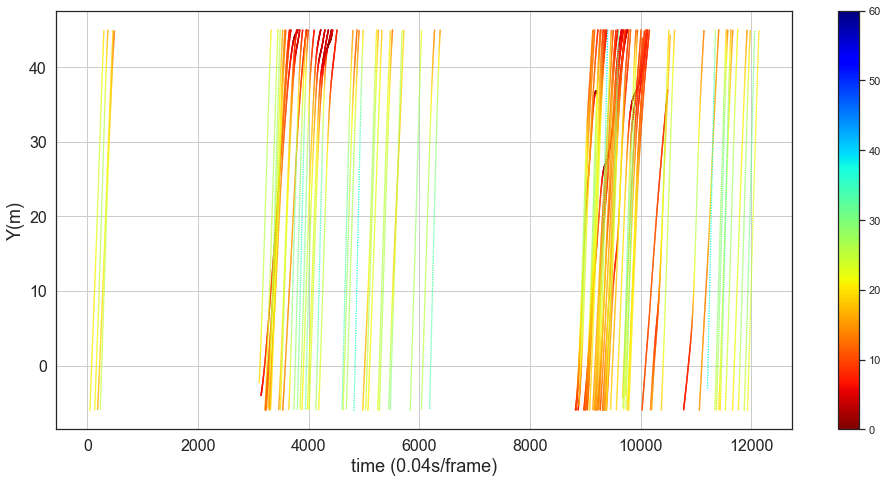

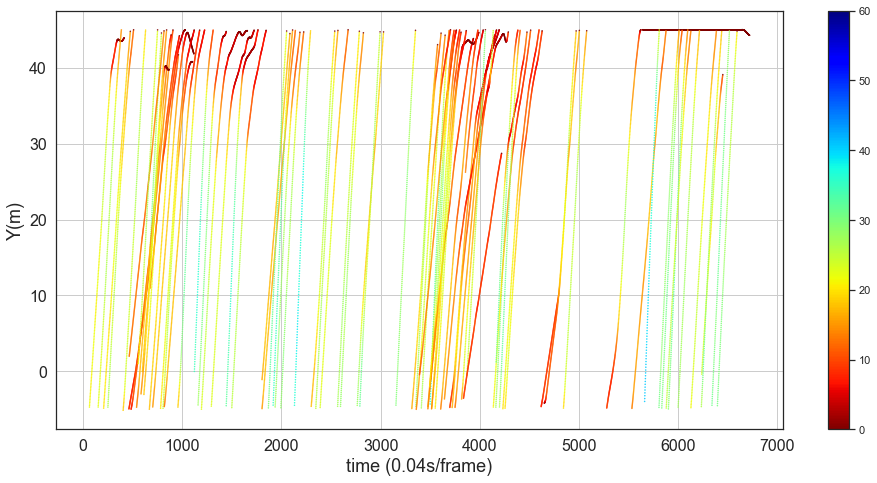

In [31]:
# data from yolo 
ground_truth = pd.DataFrame(Areatraj(Groundtruthebike))
ground_truth_TRAJ = Stmap2(ground_truth)
# 选择yolo输出数据中的自行车数据
# ground_truth = pd.DataFrame(Areatraj(Groundtruthebike))
# pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0919102.csv'

# pathdata2 = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'

pathdata2 = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Yolo0926.csv'

yOLO_data = pd.read_csv(pathdata2)
df = pd.DataFrame(yOLO_data)
Mask_traj_ebike = pd.DataFrame(Areatraj(df))
mask_traj =  Stmap2(Mask_traj_ebike)
# Maskrcnn_traj =  Stmap(Maskorginaldata)

In [19]:
# 取时间帧小于1000的所有轨迹点
def Timelength(trajdata,bottom,upper):
    # 选择自行车轨迹
    EBIKETRAJ = trajdata[trajdata.Vehicle_type==22]
    UPebiketraj = EBIKETRAJ[EBIKETRAJ.frame_id>=bottom]
    Inebiketraj =  UPebiketraj[UPebiketraj.frame_id<=upper]
    return Inebiketraj

In [23]:
# 提取区间内轨迹所包含车辆的id和最小帧
def Vehid_frame(vehtraj):
    vehtraj_id = pd.unique(vehtraj.Object_id)
    txxt = []
    A = []
    ID = []
    minframe = []
    miny = []
    for id in range(0,len(vehtraj_id)):
        V_ID = vehtraj_id[id]
        A = np.append(A,V_ID)
        Fram_V_ID = min(vehtraj[vehtraj.Object_id ==V_ID].frame_id)
        Id_traj = vehtraj[vehtraj.Object_id ==V_ID]
        minframe = np.append(minframe,Fram_V_ID)
#         Id_traj_min_fram = Id_traj[Id_traj.frame_id==minframe]
        Min_y_ID = min(Id_traj.World_y)
        miny = np.append(miny,Min_y_ID)
    txxt = pd.DataFrame(txxt)
    A = pd.DataFrame(A)
    minframe = pd.DataFrame(minframe)
    miny = pd.DataFrame(miny)
    txxt['id'] = A
    txxt['min frame'] = minframe
    txxt['miny'] = miny
    return txxt

In [24]:
bottom = 4500
top = 6500
ground_truth = pd.DataFrame(Areatraj(Groundtruthebike))
Inebike_G = pd.DataFrame(Timelength(ground_truth,bottom,top))
ground_truth = Stmap2(Inebike_G)
ID_G = Vehid_frame(Inebike_G)
A = pd.DataFrame(ID_G)
filepath = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\testA.csv"
A.to_csv(filepath, index=False, mode='a+', header=False)

Mask_traj_ebike = pd.DataFrame(Areatraj(Maskrcnn_car))
Inebike_C = Timelength(Mask_traj_ebike,bottom,top)
Mask_traj_ebike = Stmap2(Inebike_C)
ID_C = Vehid_frame(Inebike_C)
B = pd.DataFrame(ID_C)
filepath = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\testB.csv"
B.to_csv(filepath, index=False, mode='a+', header=False)

NameError: name 'Timelength' is not defined

In [22]:


# 需要确定id之间的对应关系
# 查找每个id对应的最小帧

# ttt = (163,165,166,169)
# # ,,149,150,151,154,156,159,160,161
# print(txxt)
# Traj_ebik_ground = Groundtraj2[Groundtraj2.Object_id.isin(ttt)]
# XYmap(Traj_ebik_ground)
# ttty = (3997,3972,4001,3919,3975)
# Traj_ebik_yolo = YOLOtraj2[YOLOtraj2.Object_id.isin(ttty)]
# XYmap(Traj_ebik_yolo)

In [25]:
# 时空轨迹显示
def Mapframetraj_yy(data):
    # 获取车辆数
    df = pd.DataFrame(data)
    vehids = pd.unique(df["Object_id"])
    for vehid in vehids:
        fig = plt.figure(figsize=(12,8))  
        traj_id = df[df.Object_id==vehid]
        plt.plot(traj_id["World_y"],traj_id["speed_y"],c="yellowgreen",linestyle="-")

In [33]:
pathdata2 = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/Yolov7_orginal0919102.csv'
yOLO_data = pd.read_csv(pathdata2)
df = pd.DataFrame(yOLO_data)
Mask_traj_ebike = pd.DataFrame(Areatraj(df))

C:\Users\19501\AppData\Local\Temp\ipykernel_5772\2540434016.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,8))
No handles with labels found to put in legend.


<Figure size 576x288 with 0 Axes>

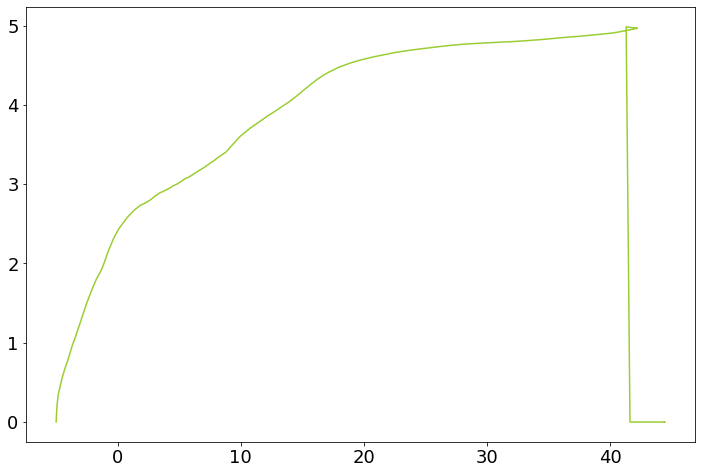

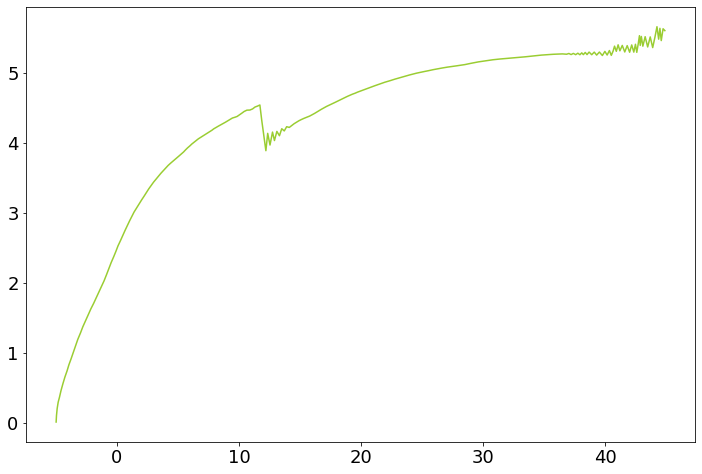

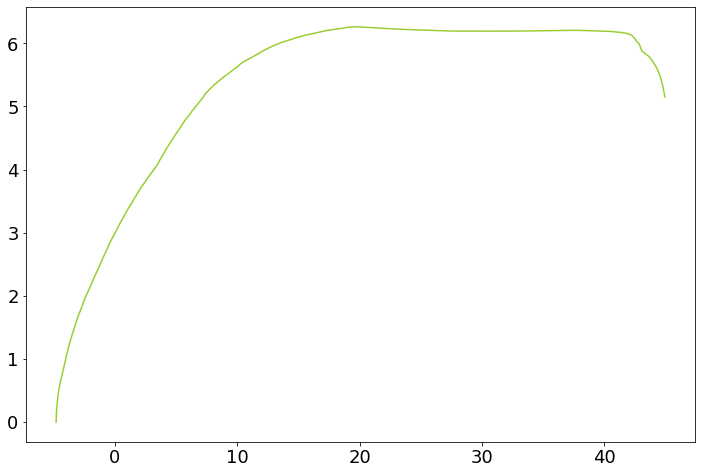

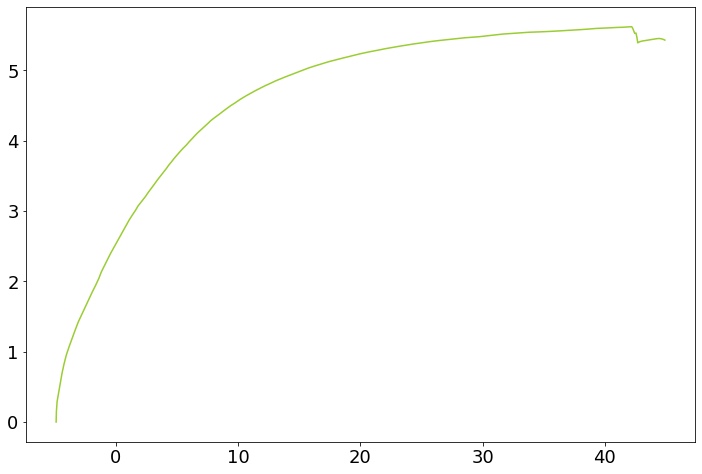

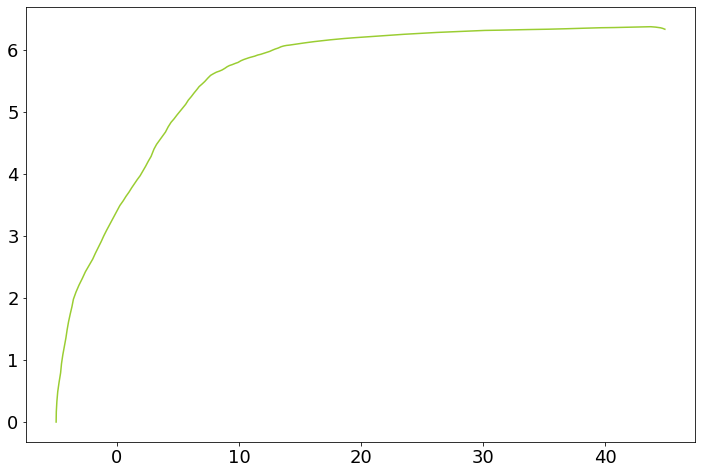

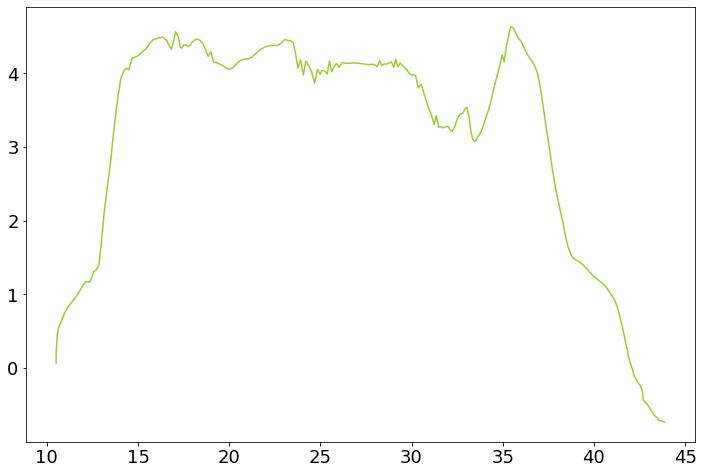

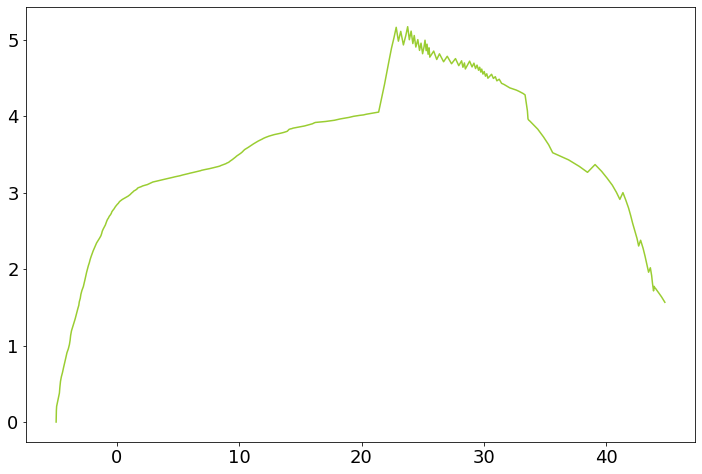

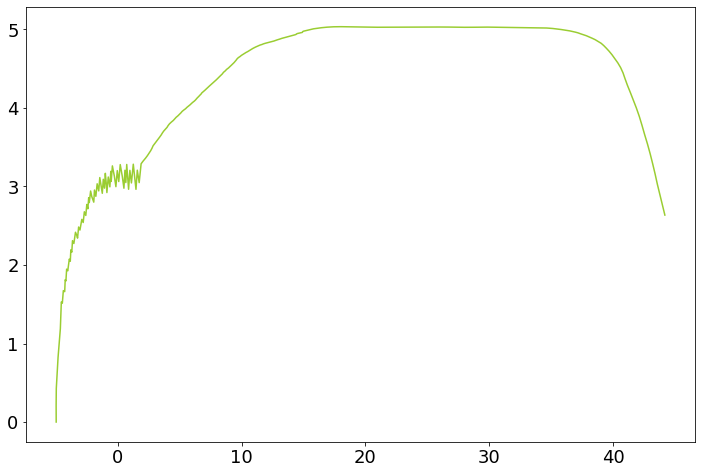

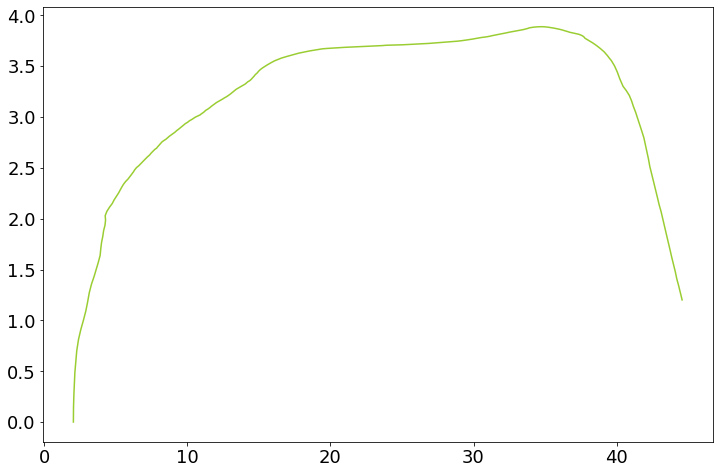

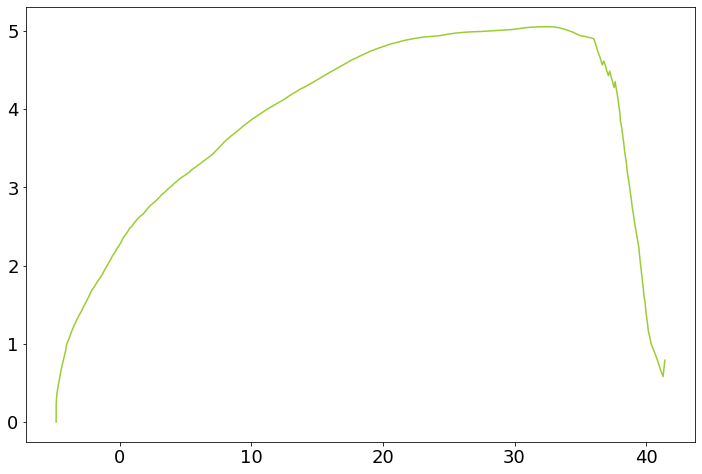

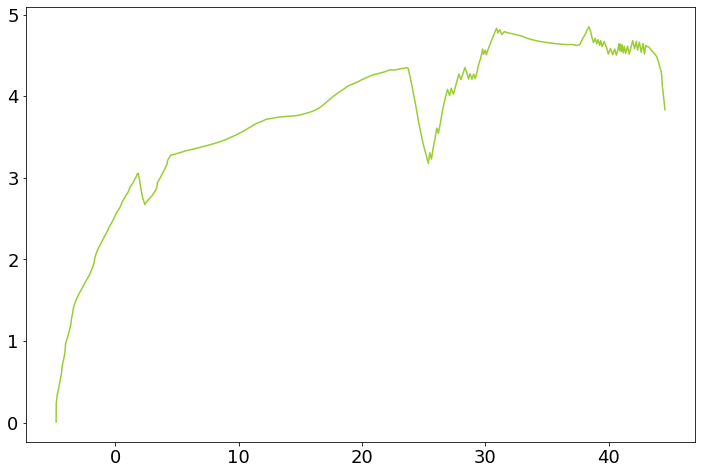

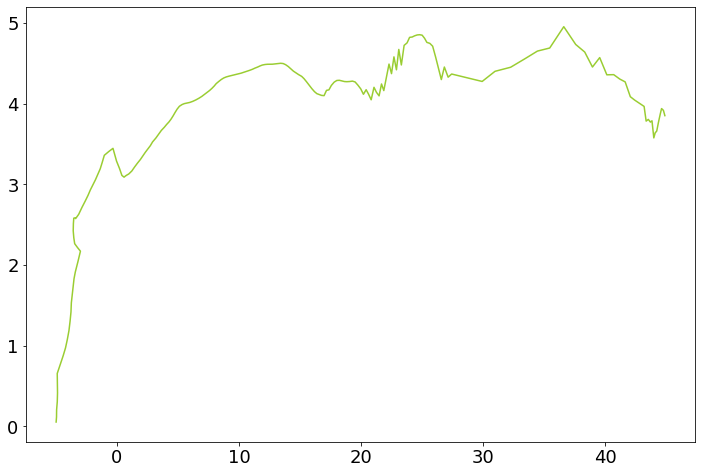

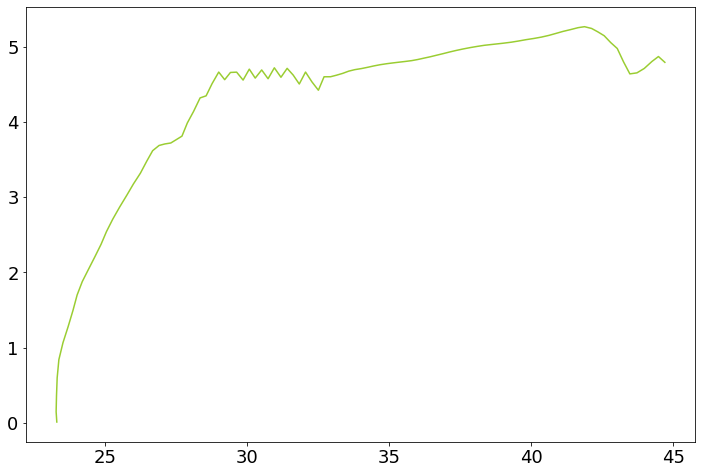

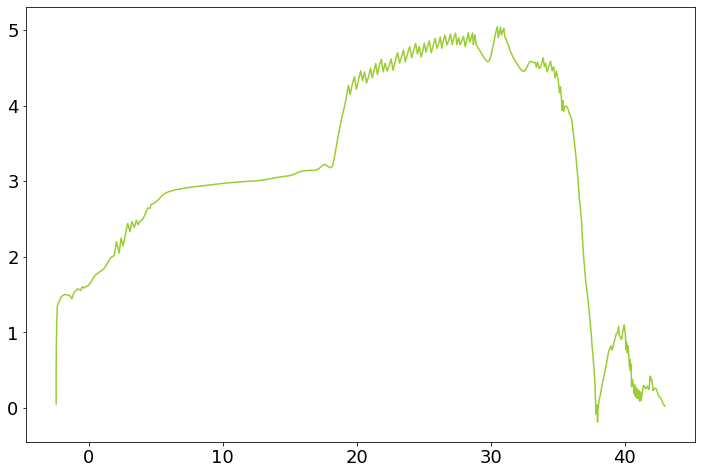

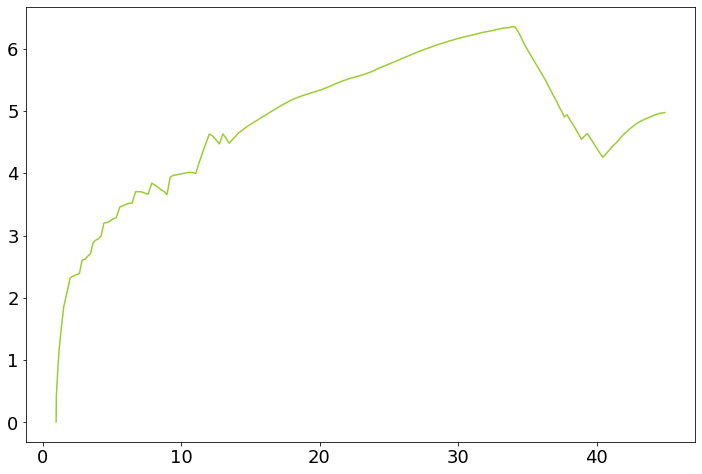

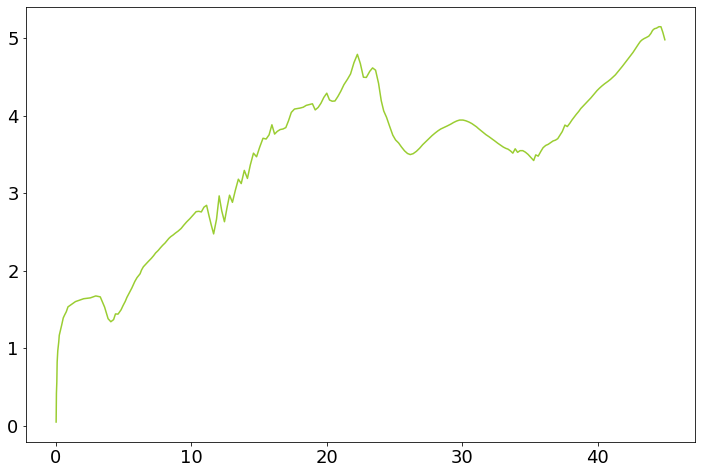

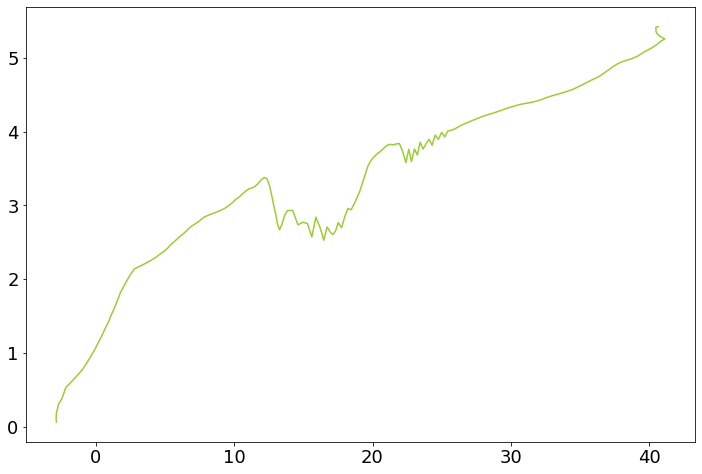

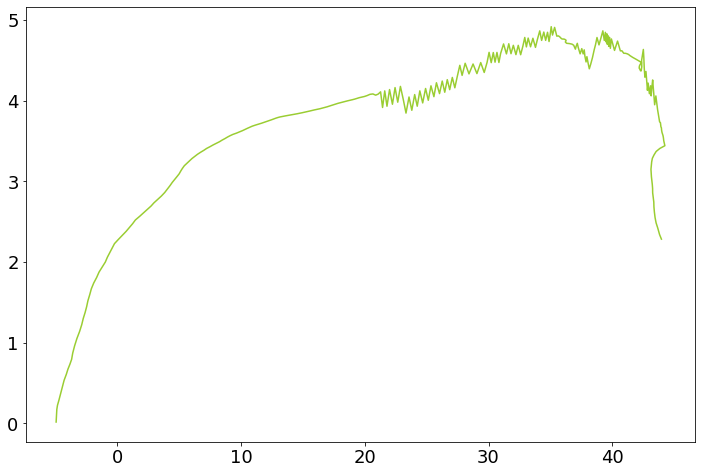

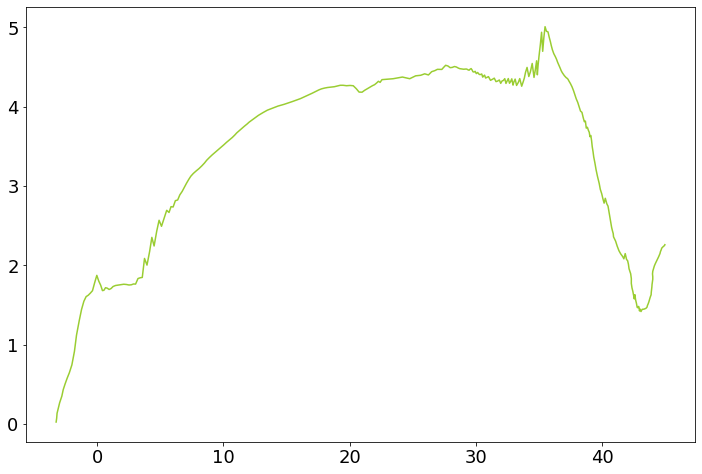

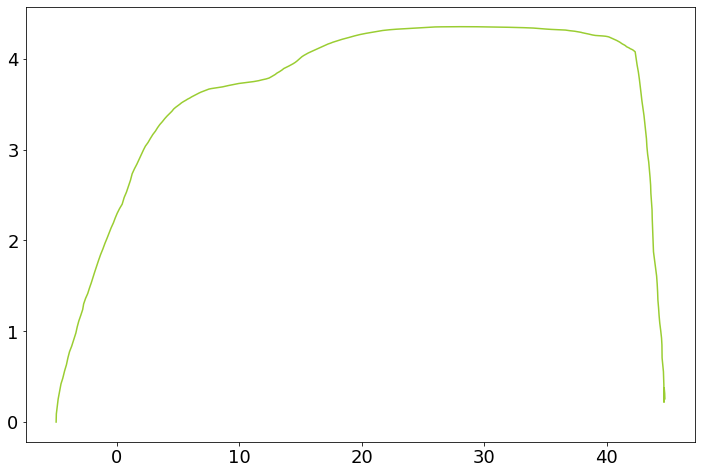

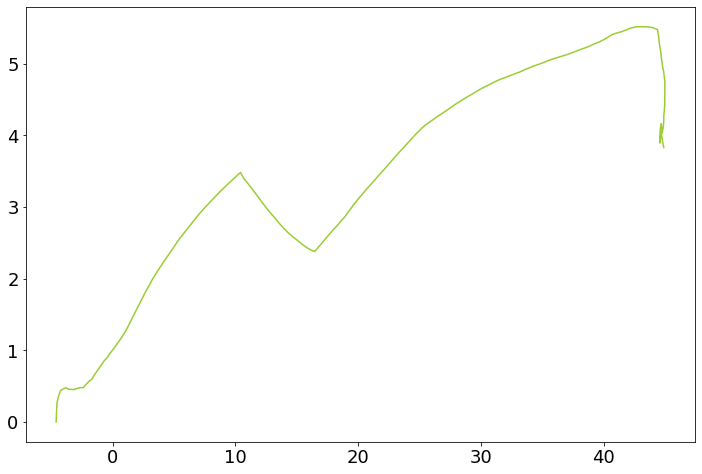

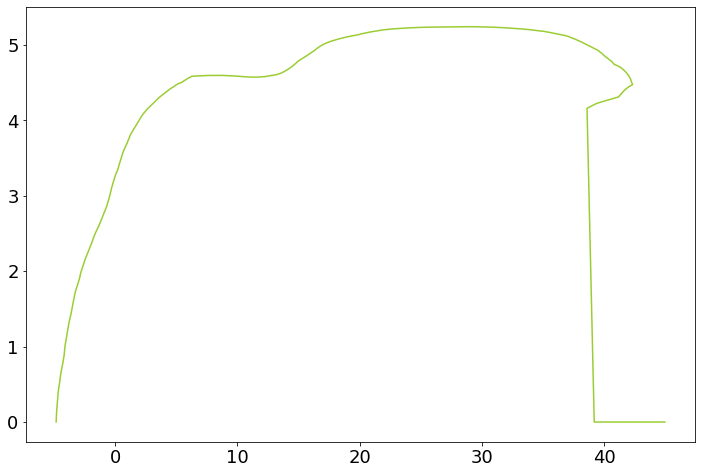

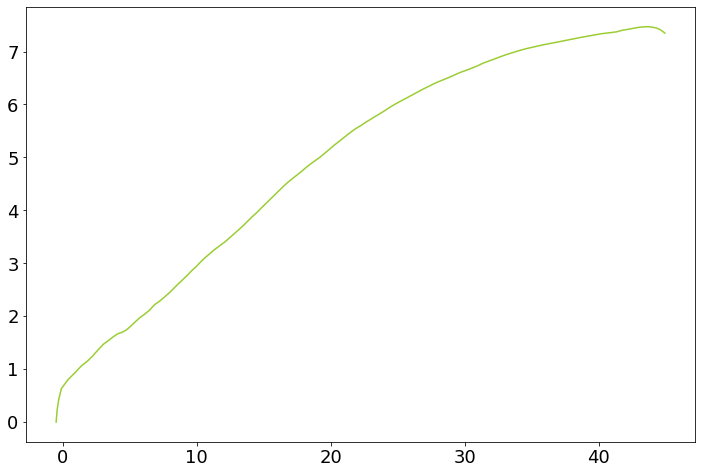

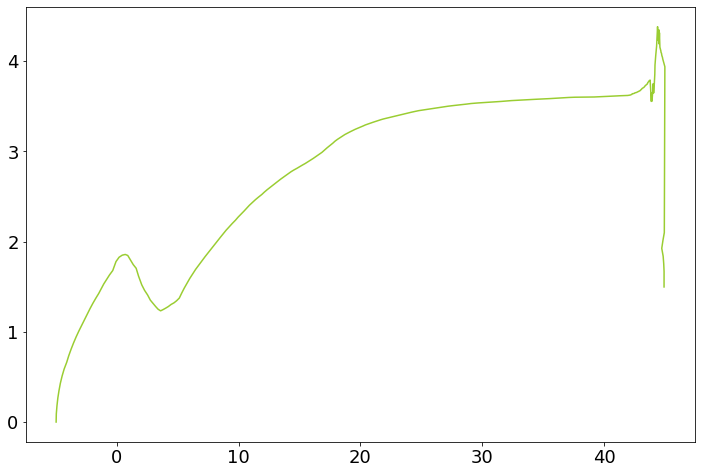

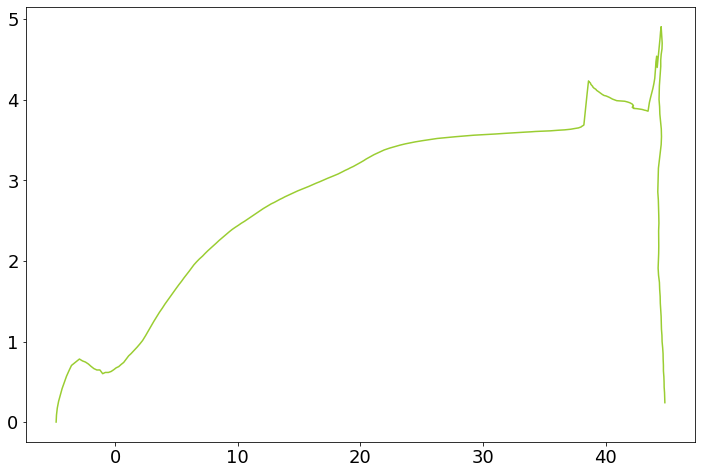

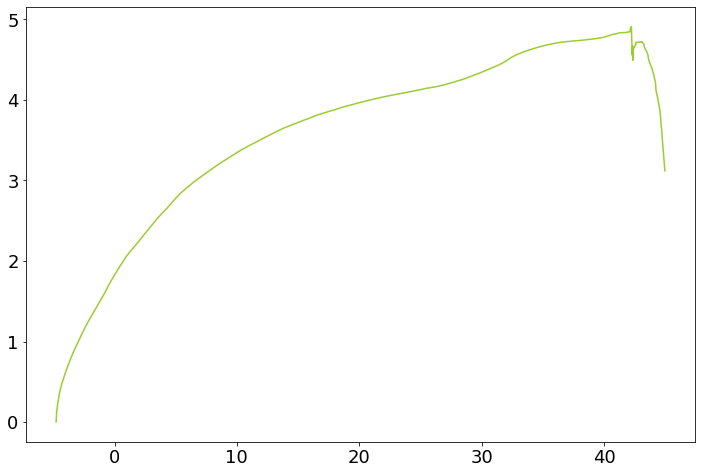

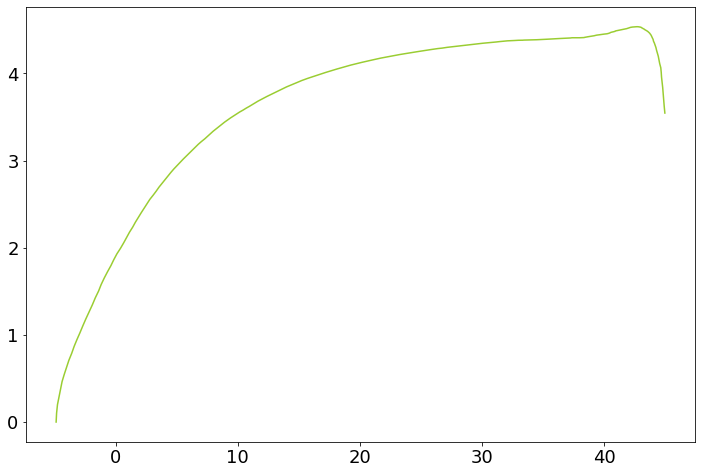

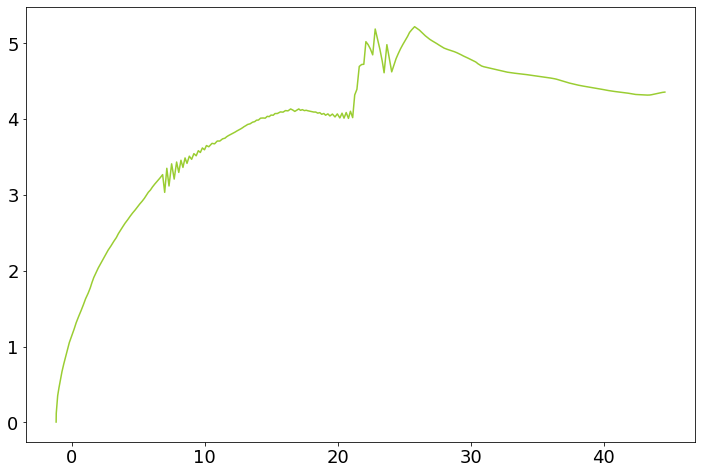

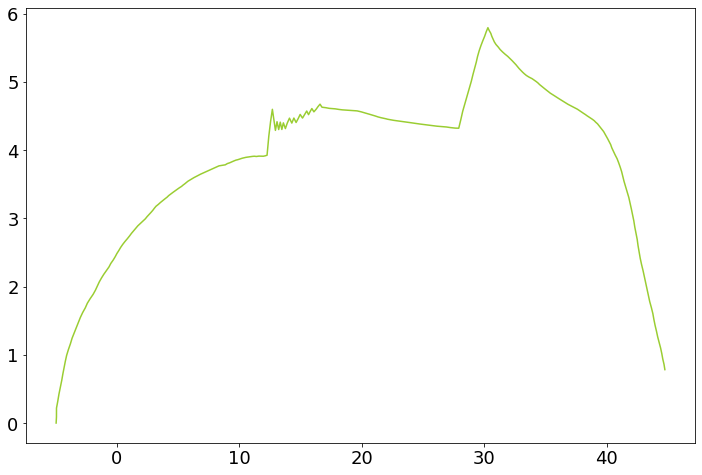

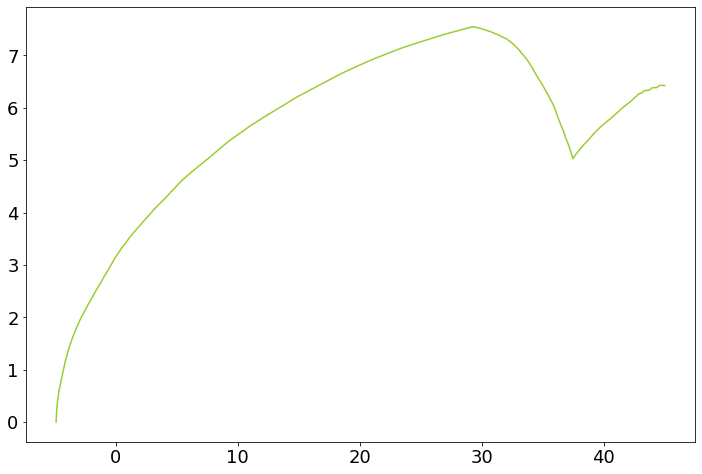

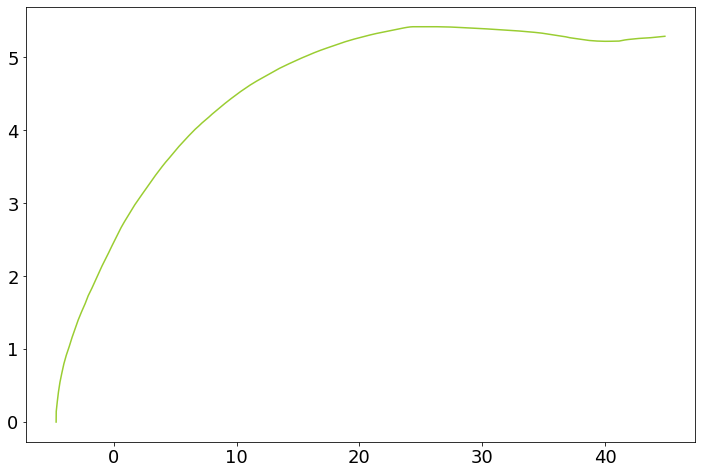

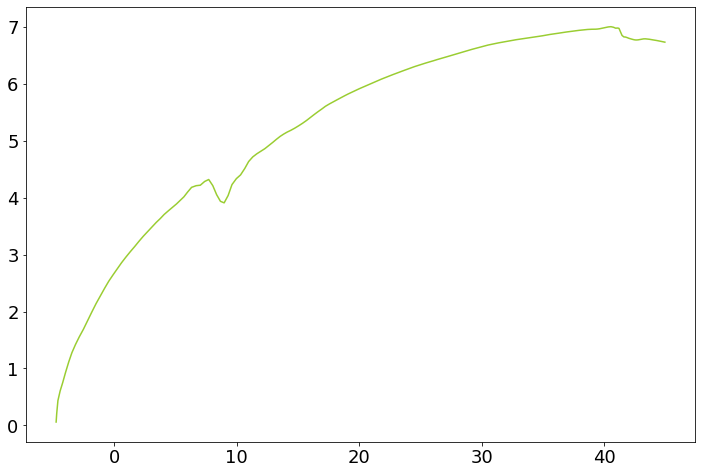

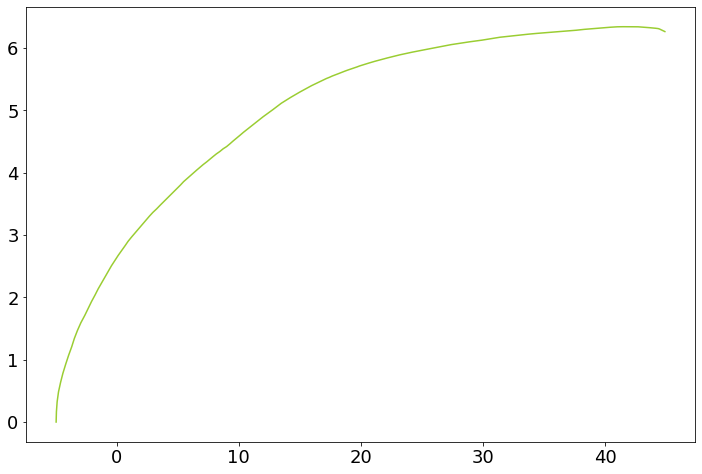

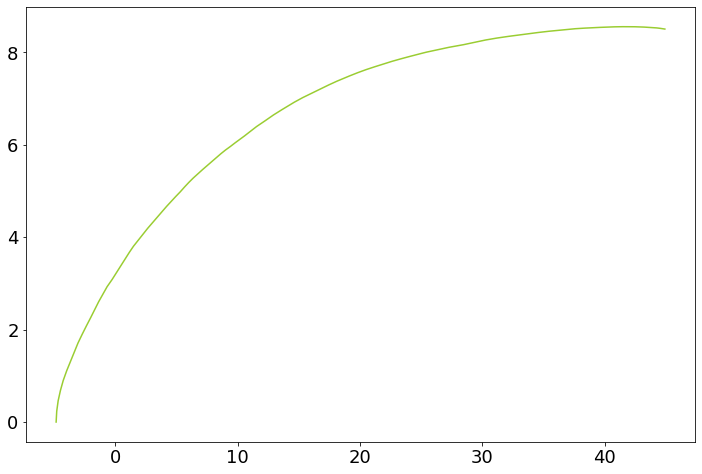

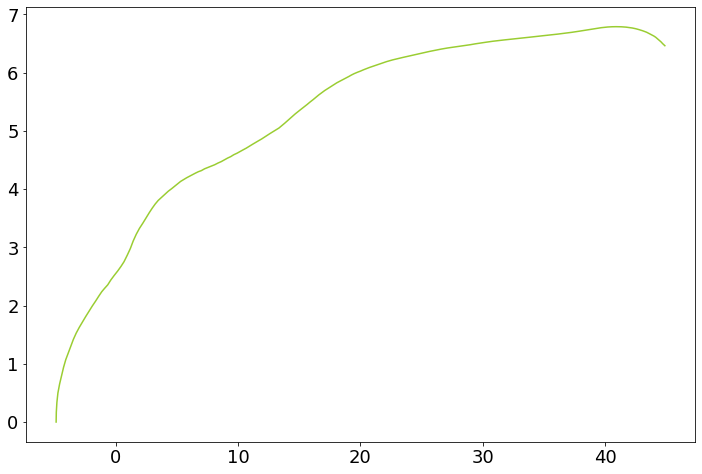

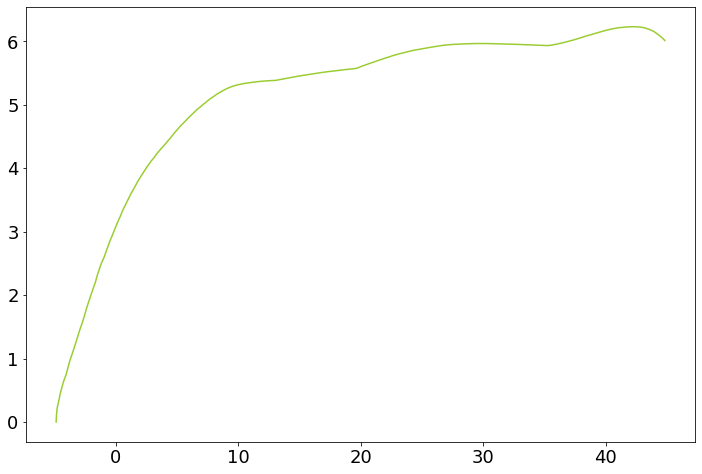

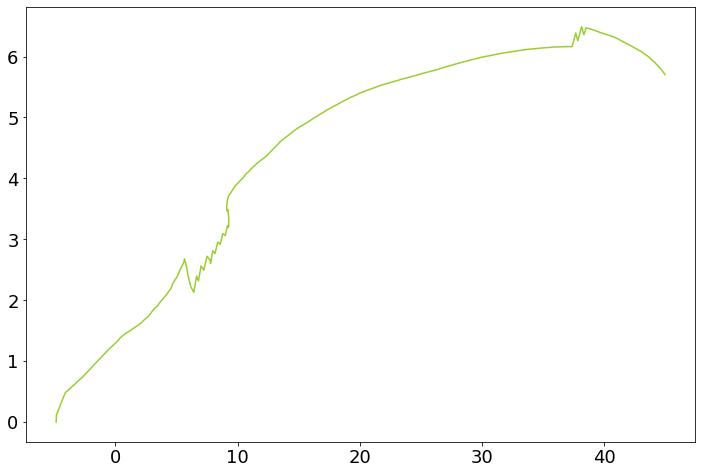

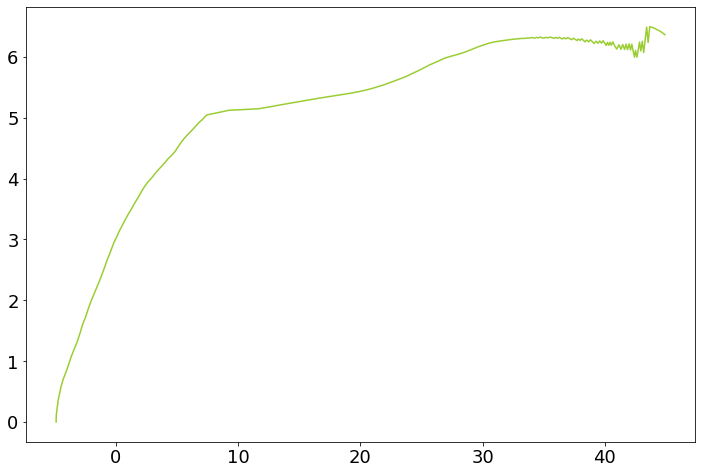

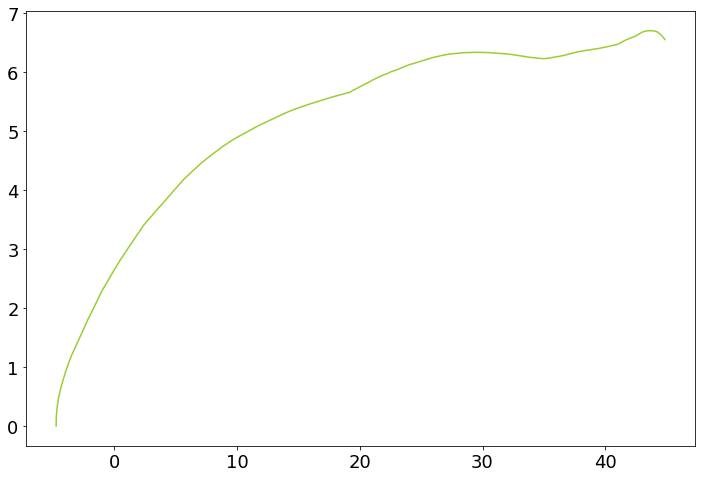

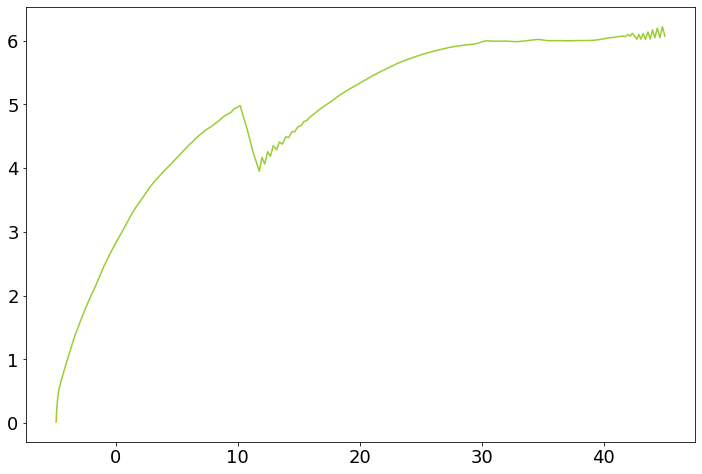

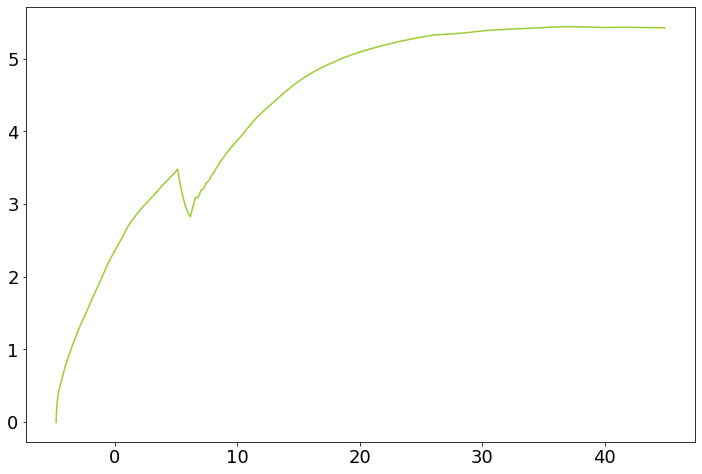

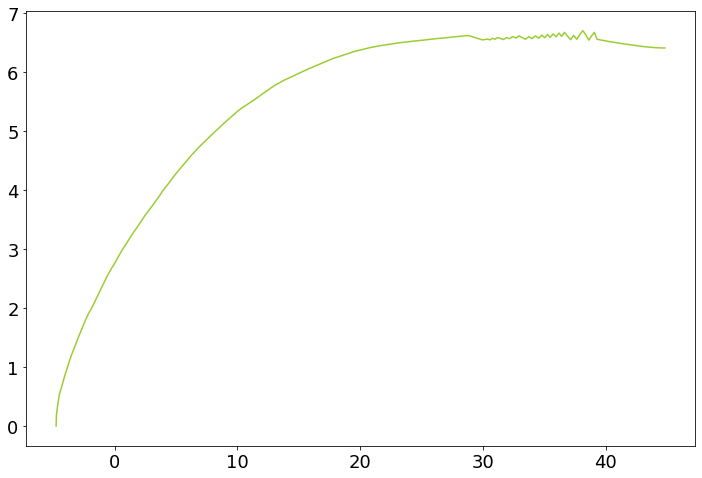

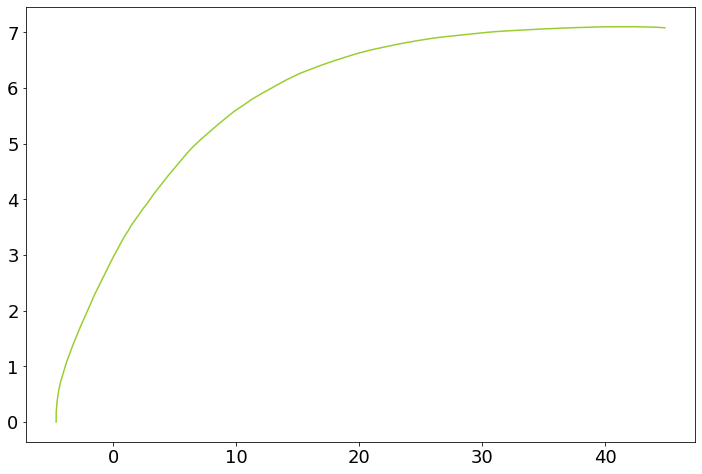

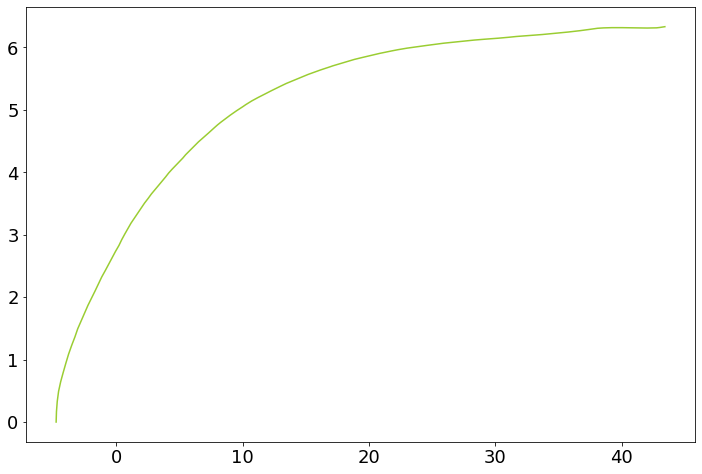

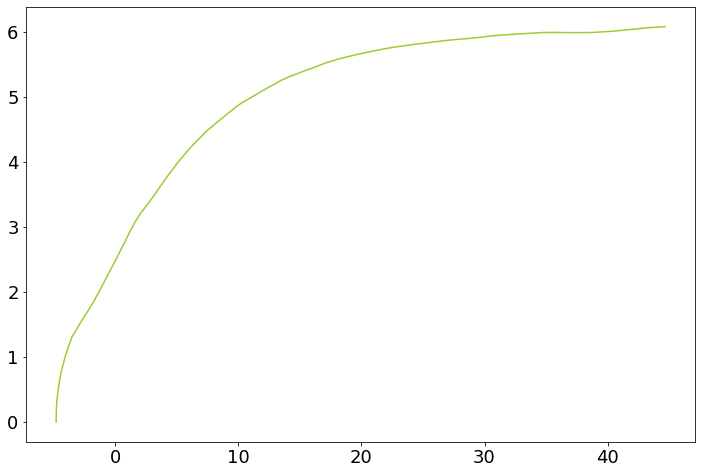

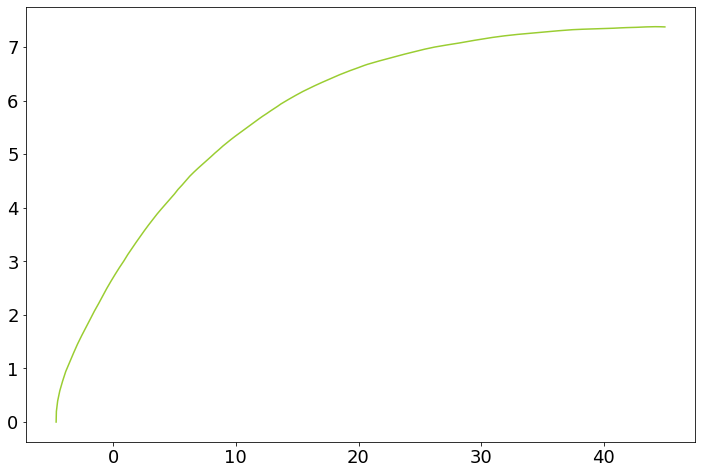

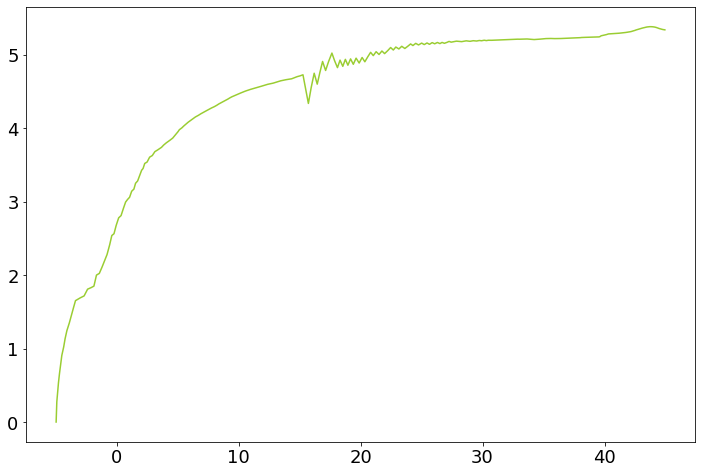

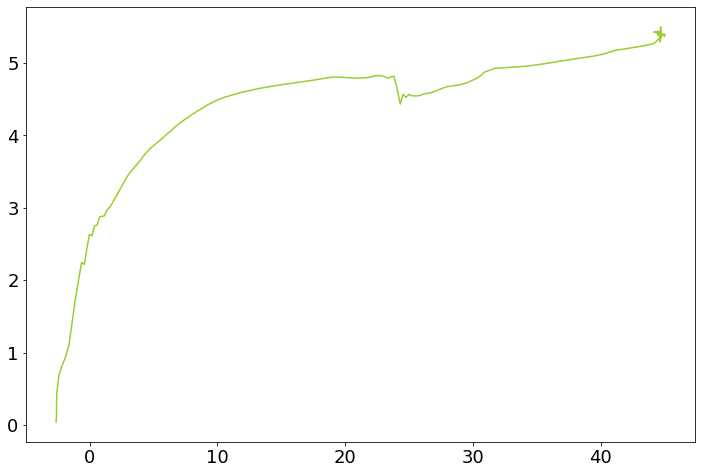

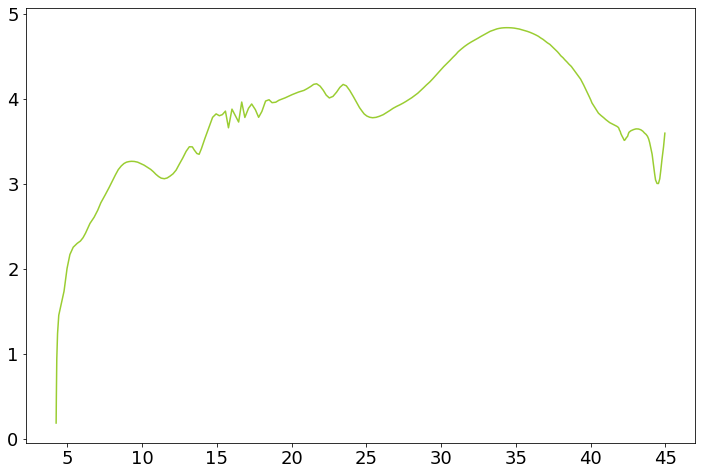

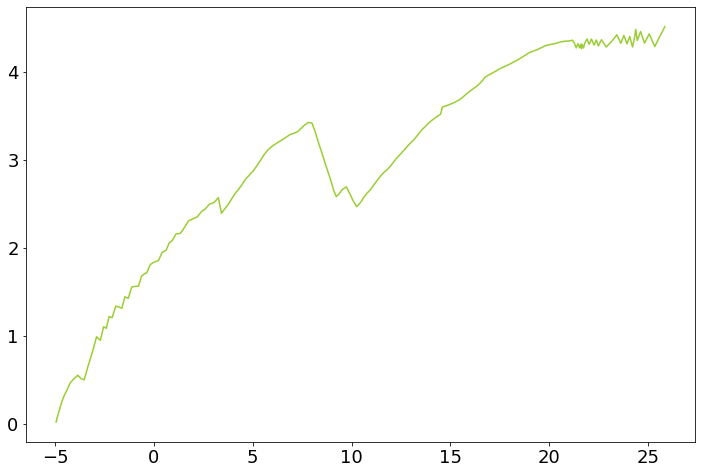

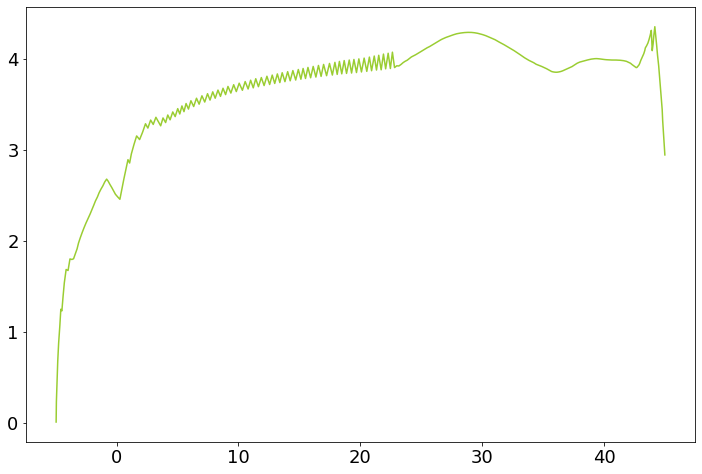

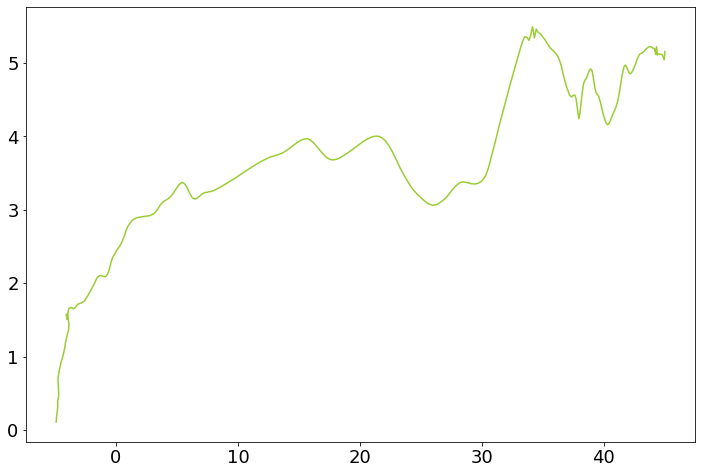

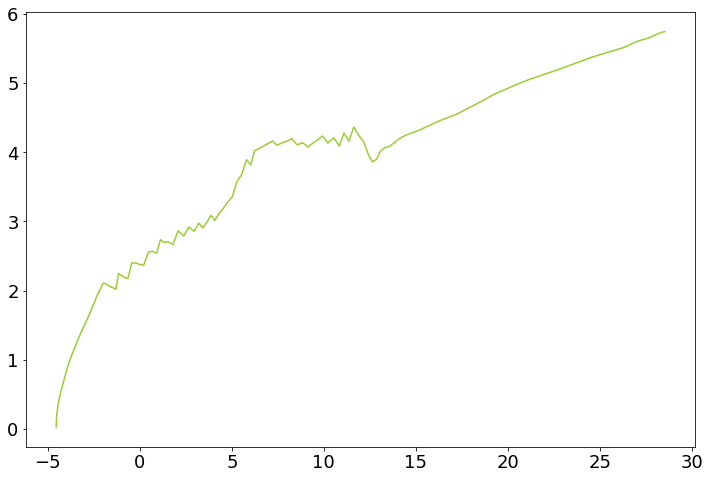

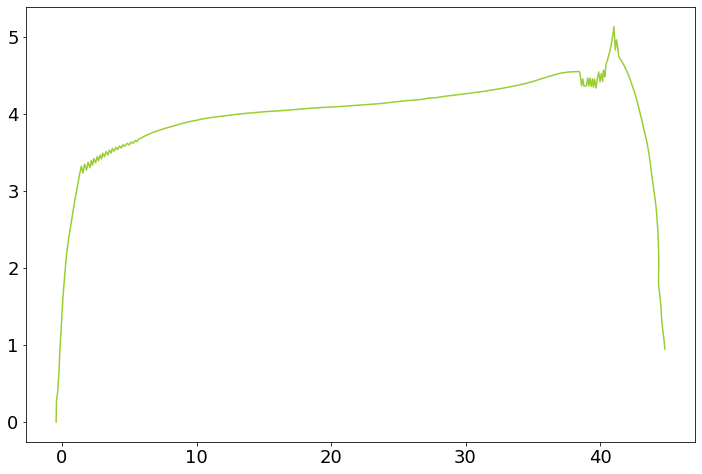

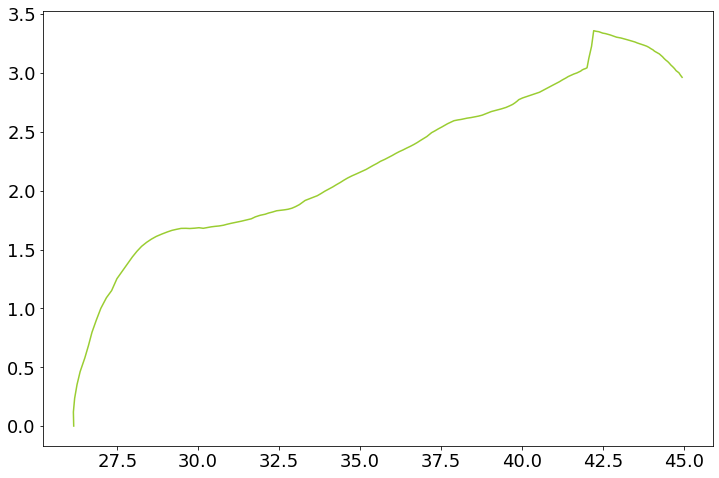

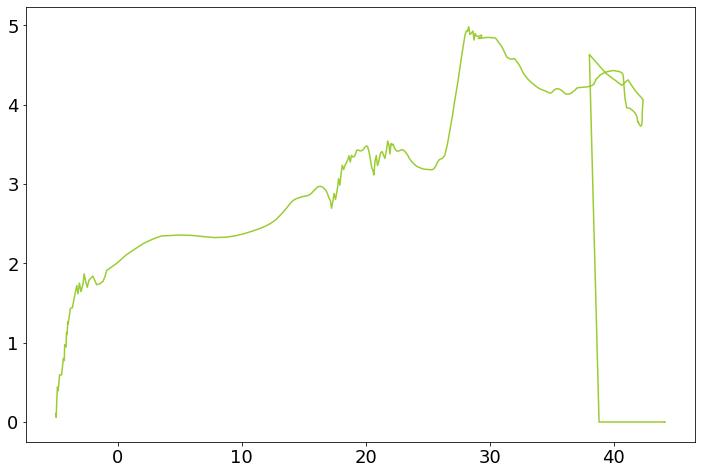

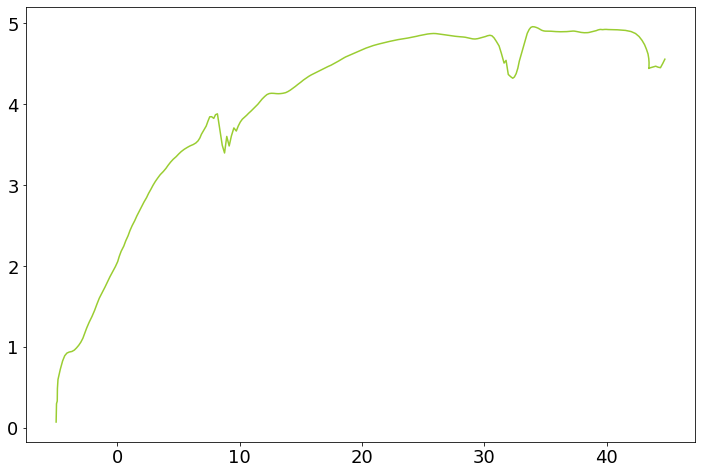

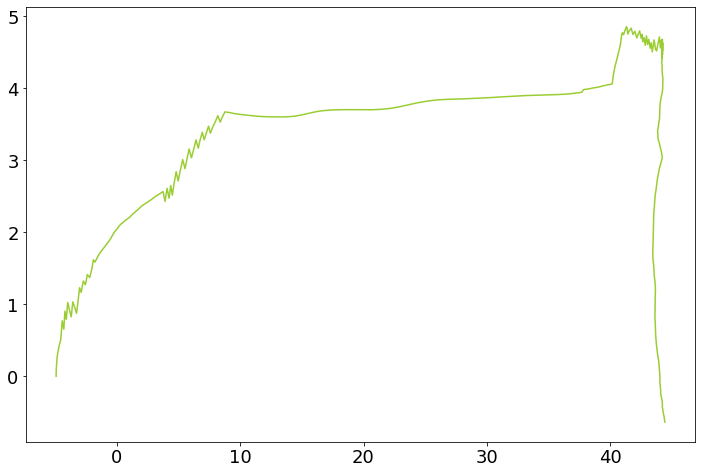

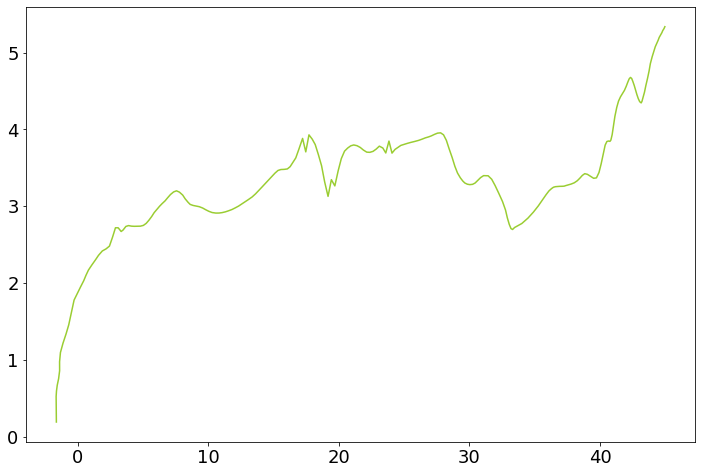

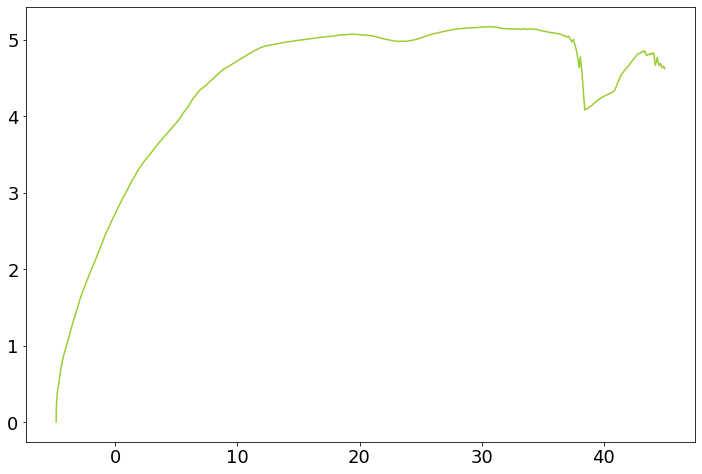

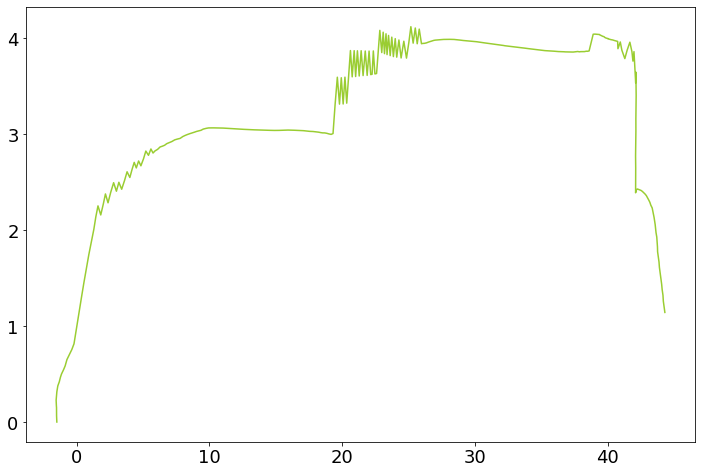

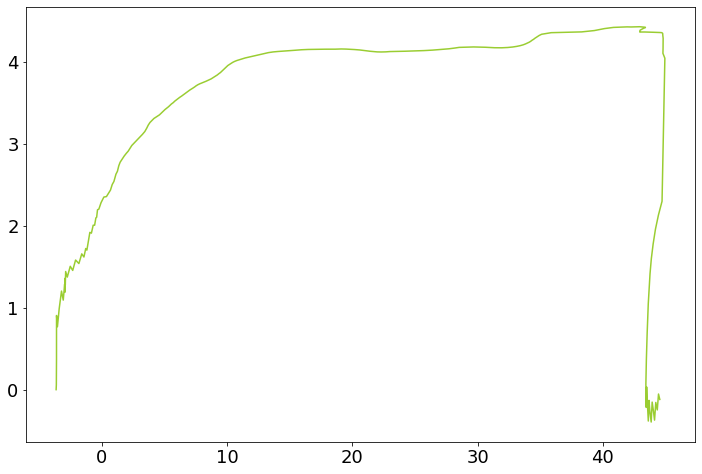

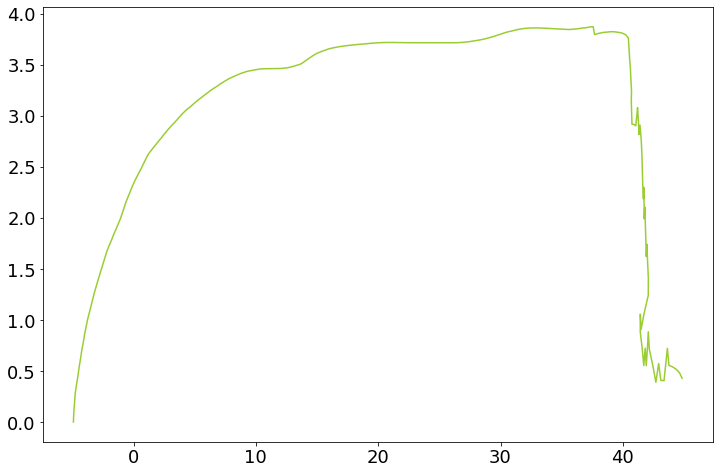

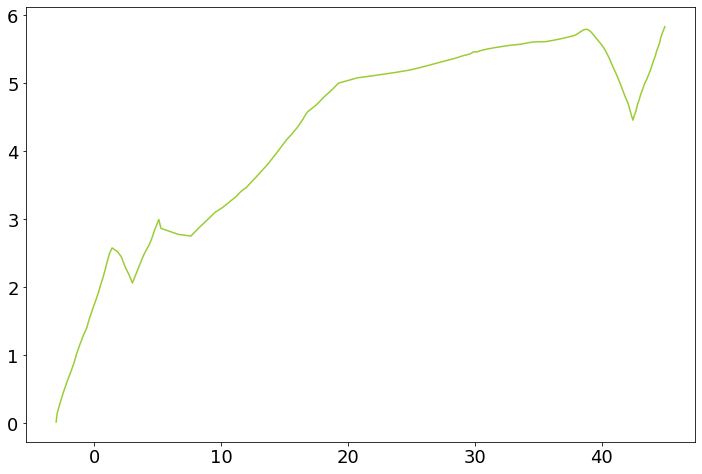

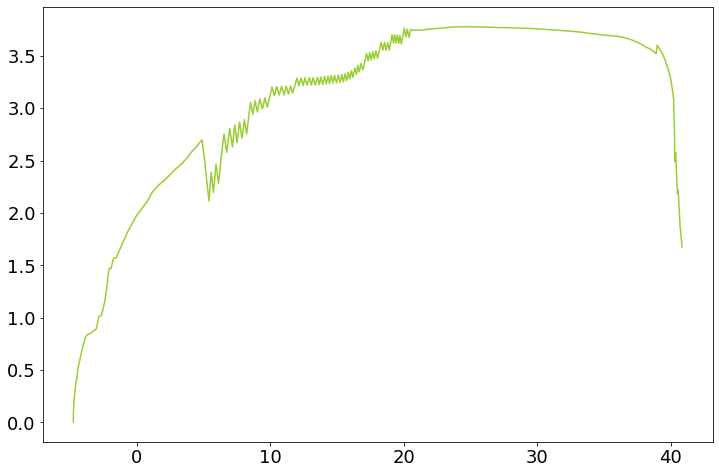

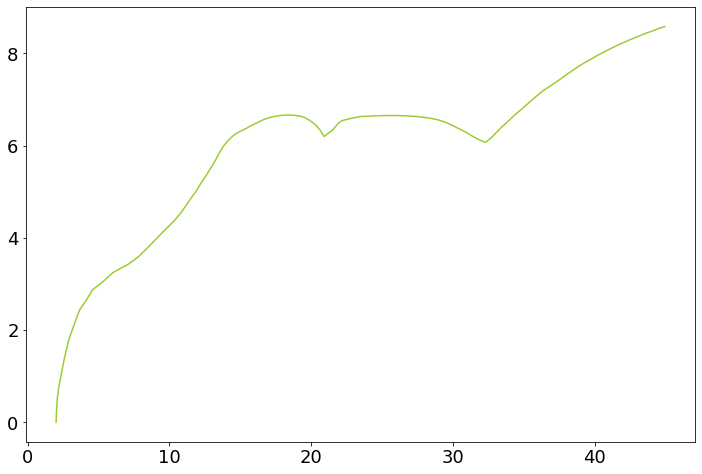

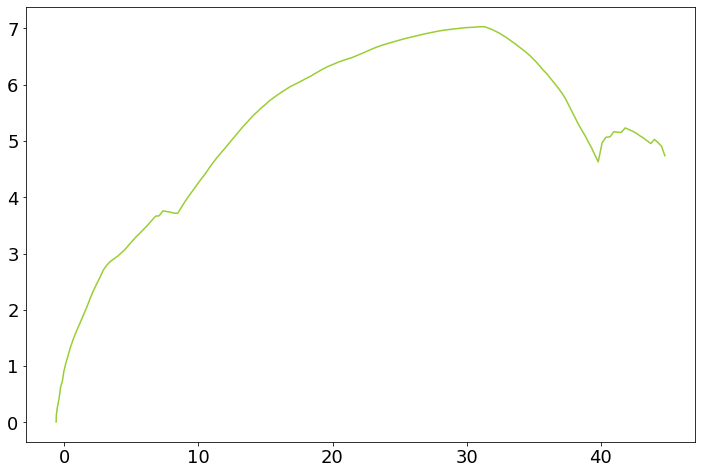

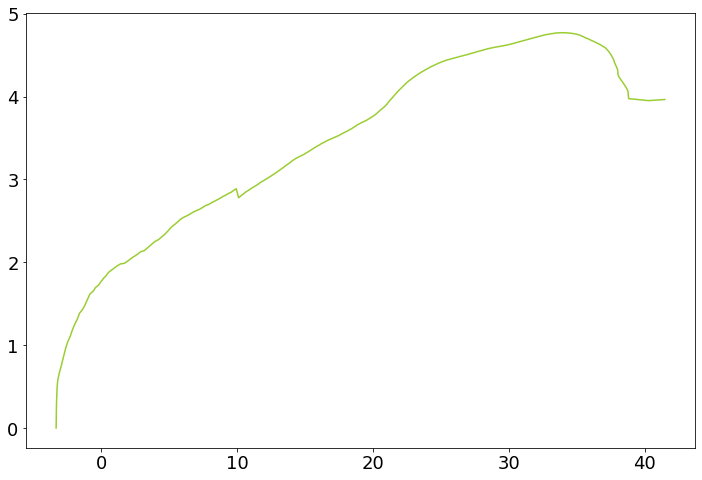

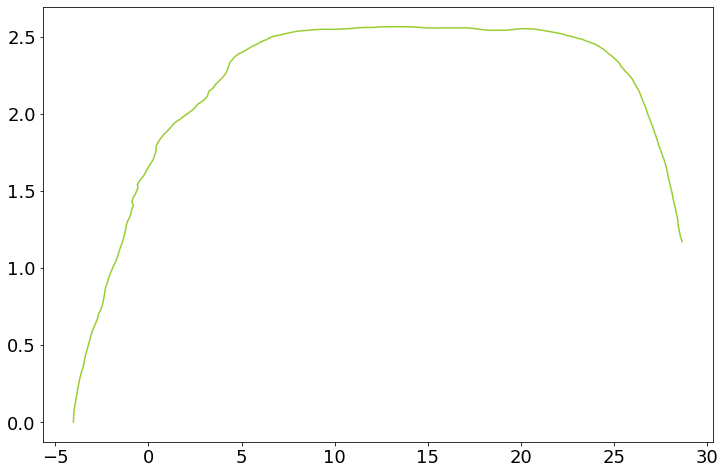

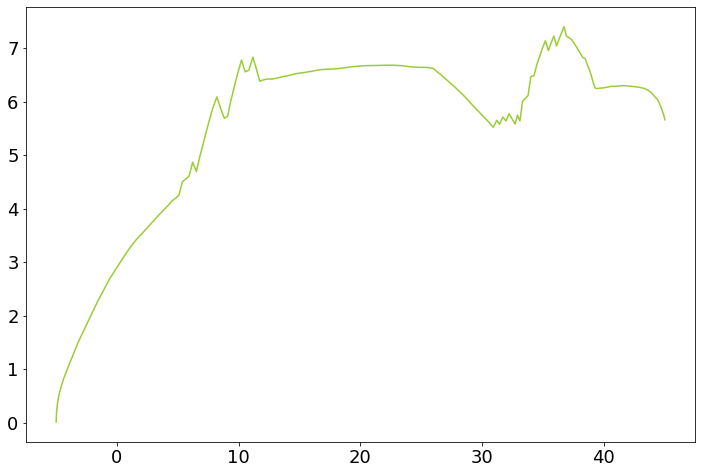

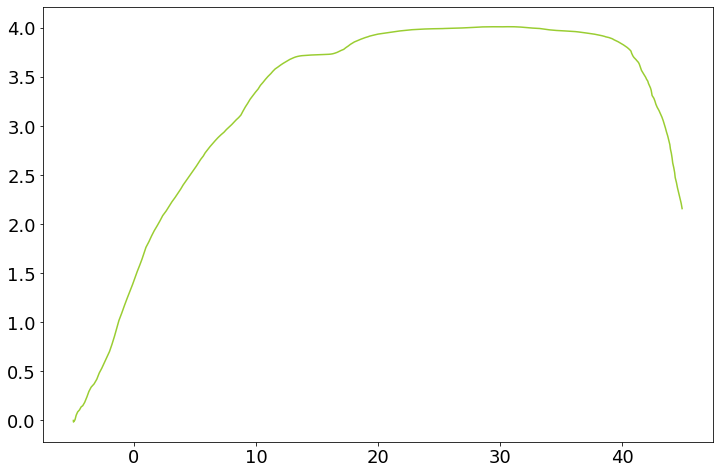

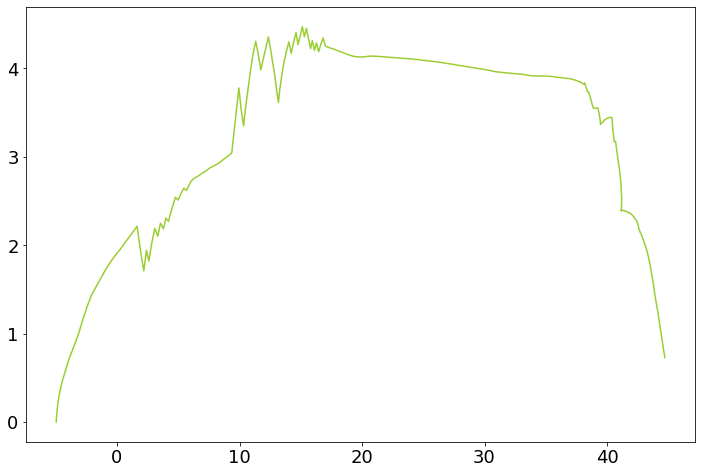

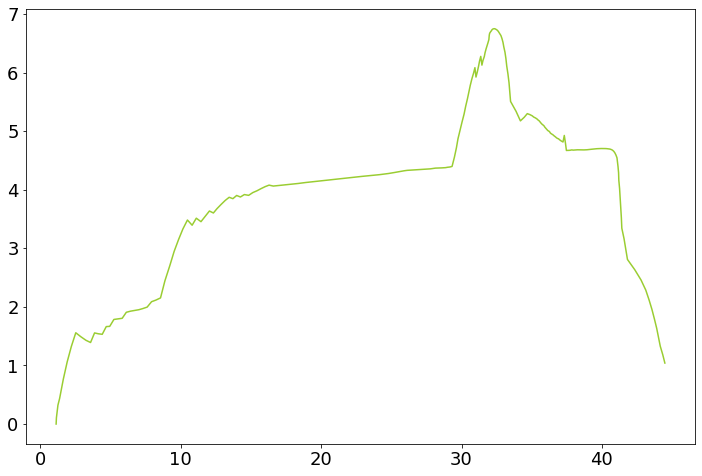

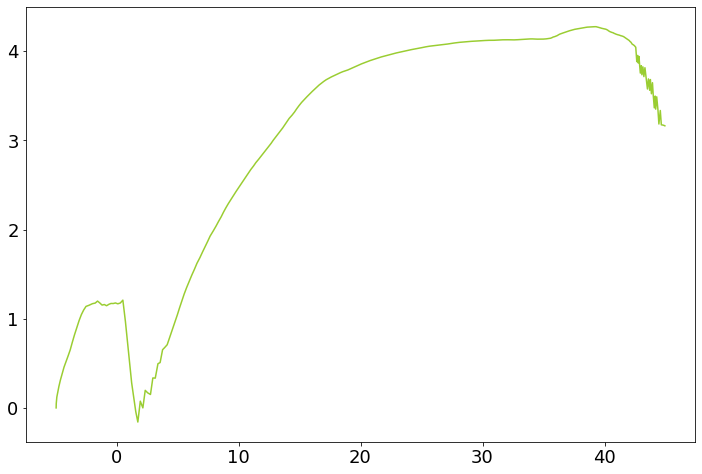

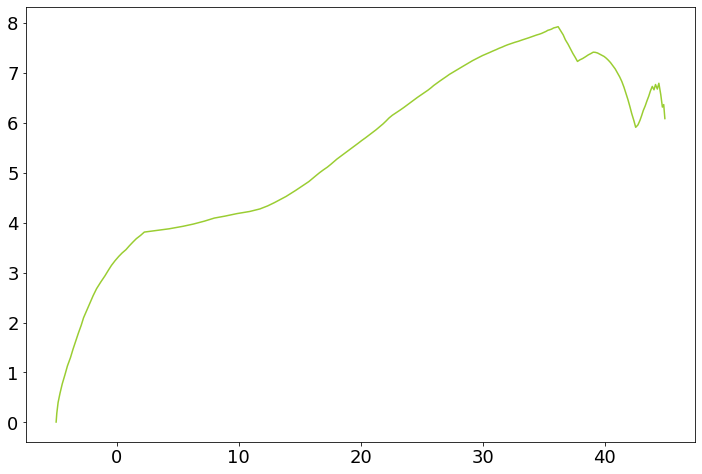

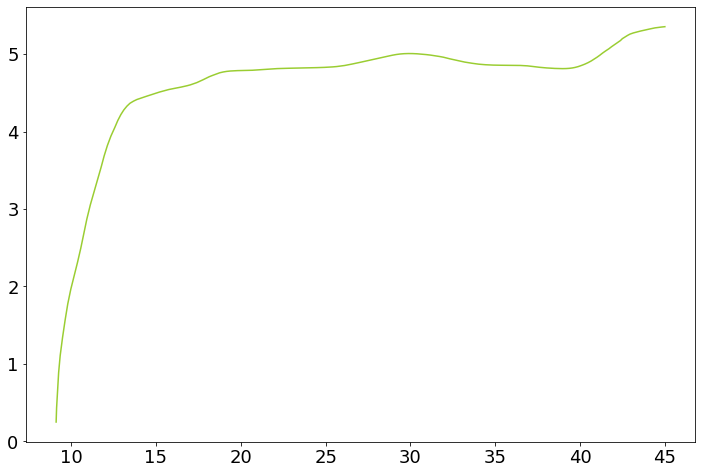

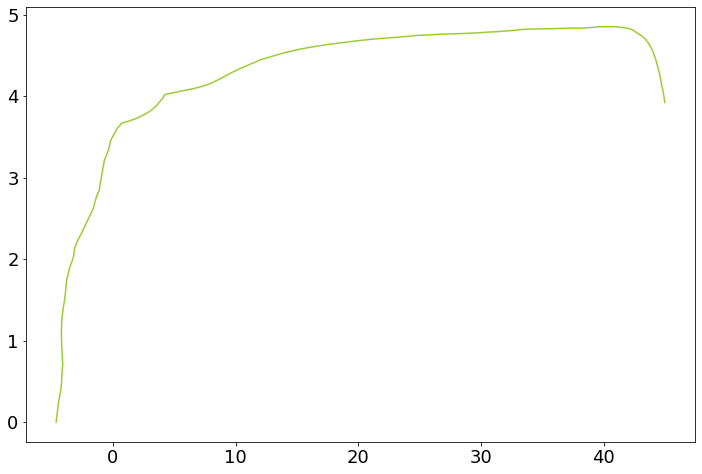

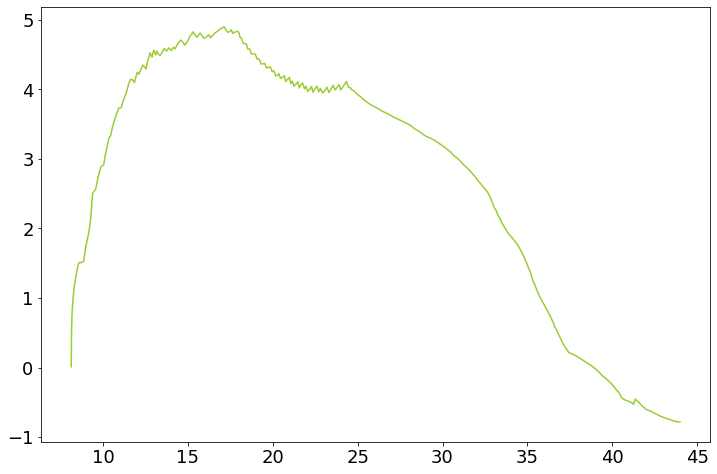

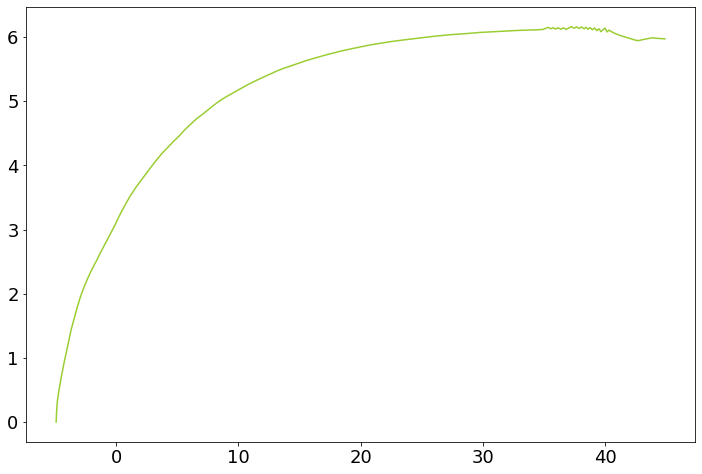

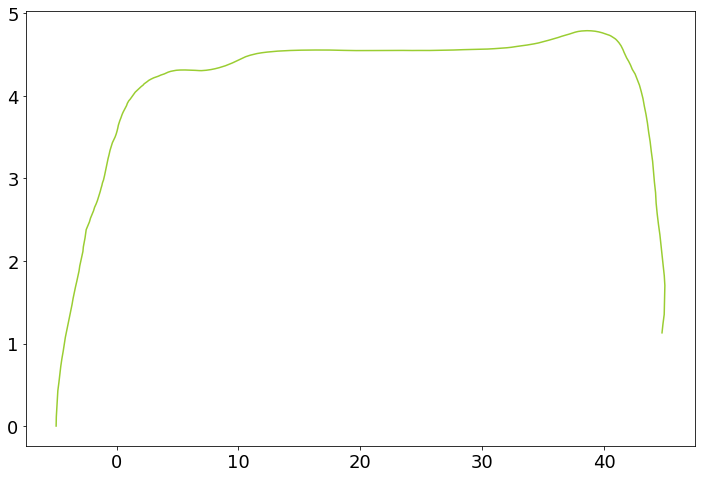

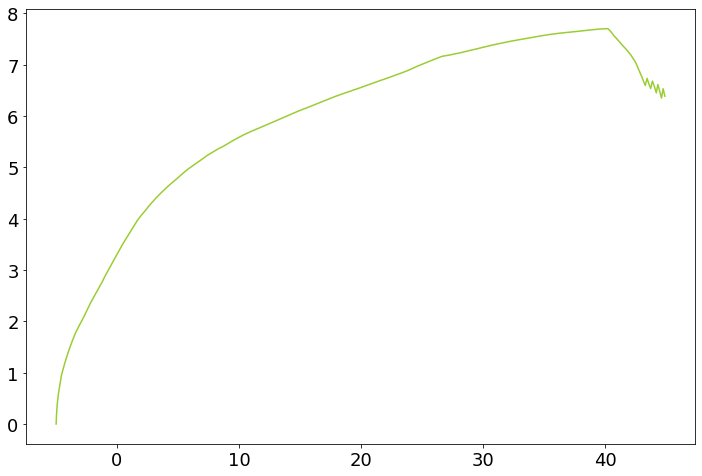

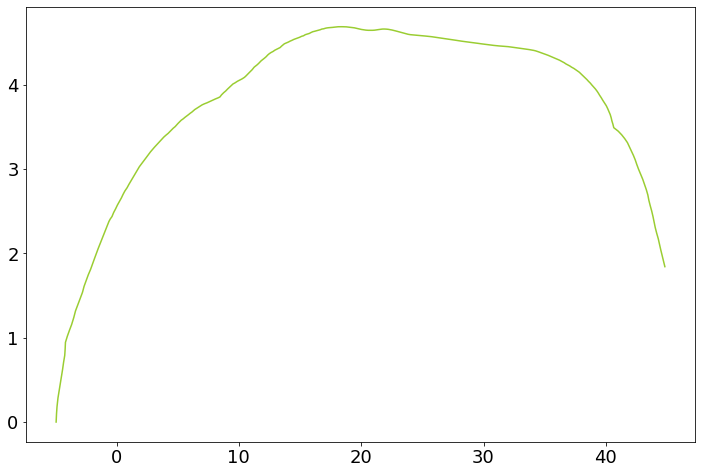

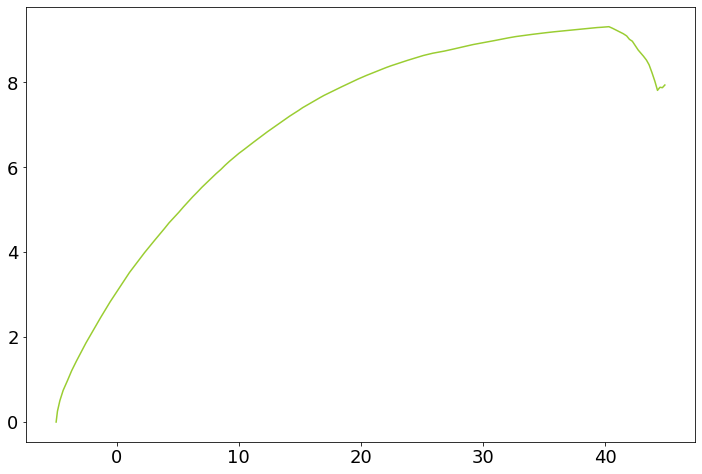

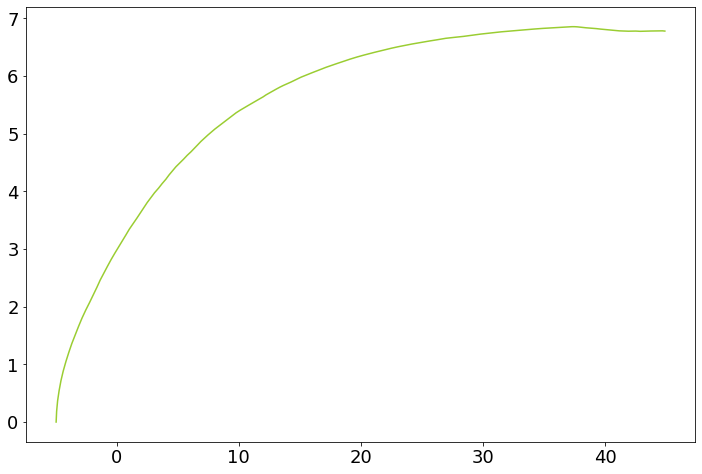

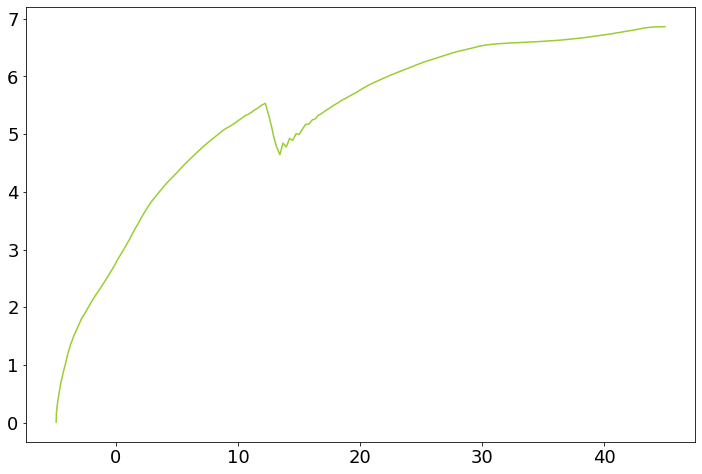

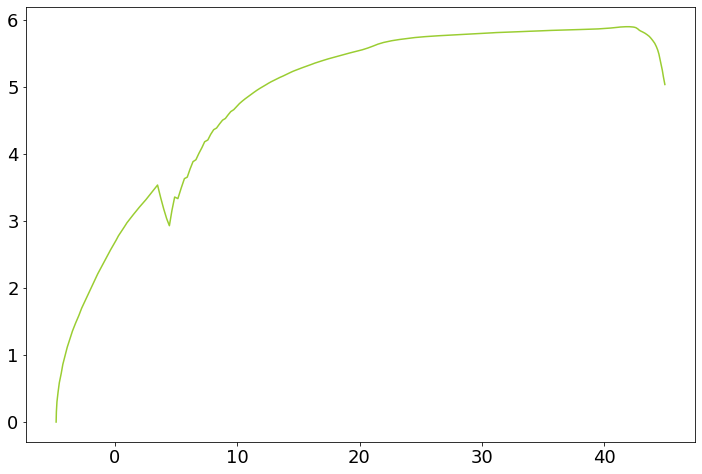

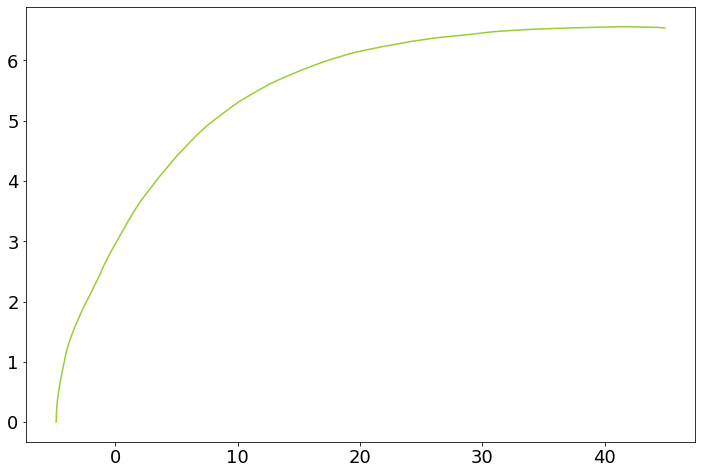

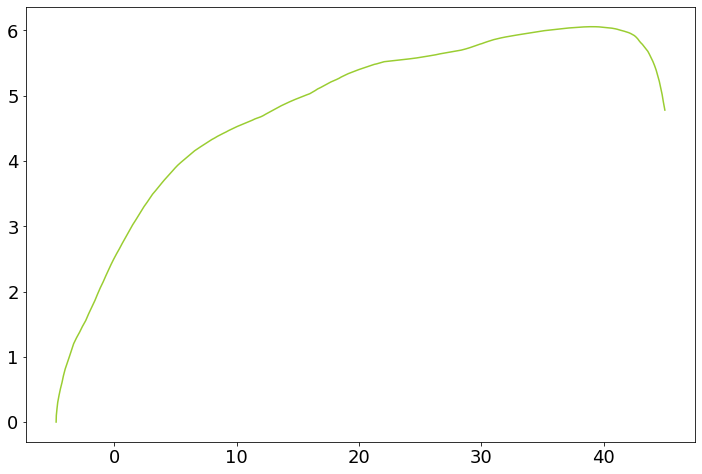

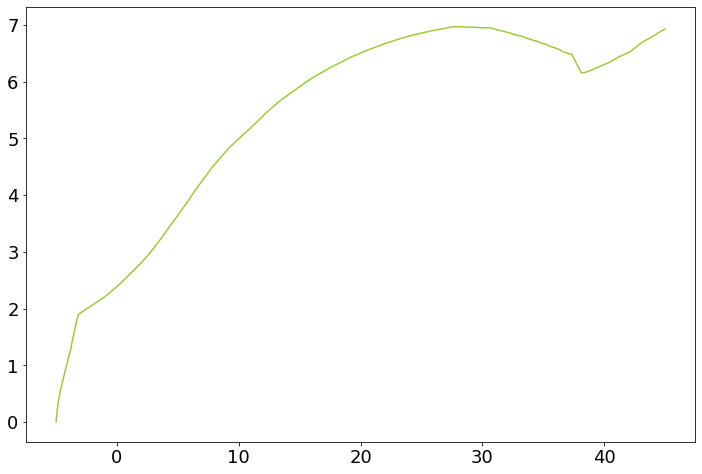

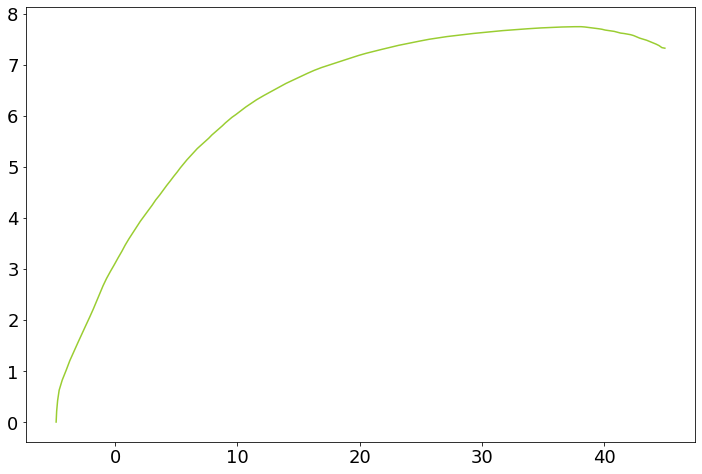

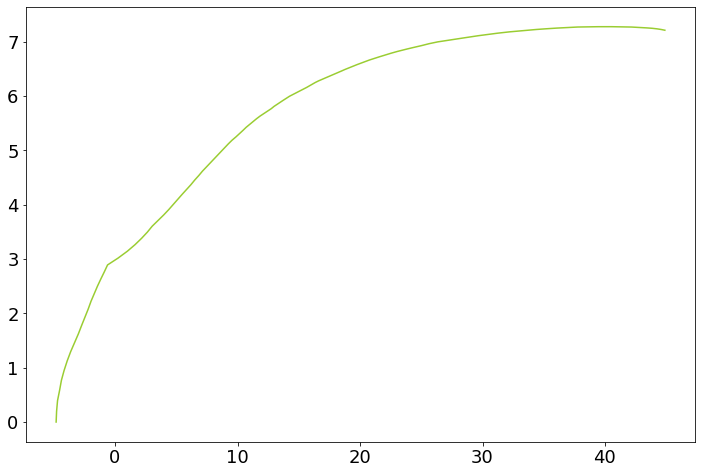

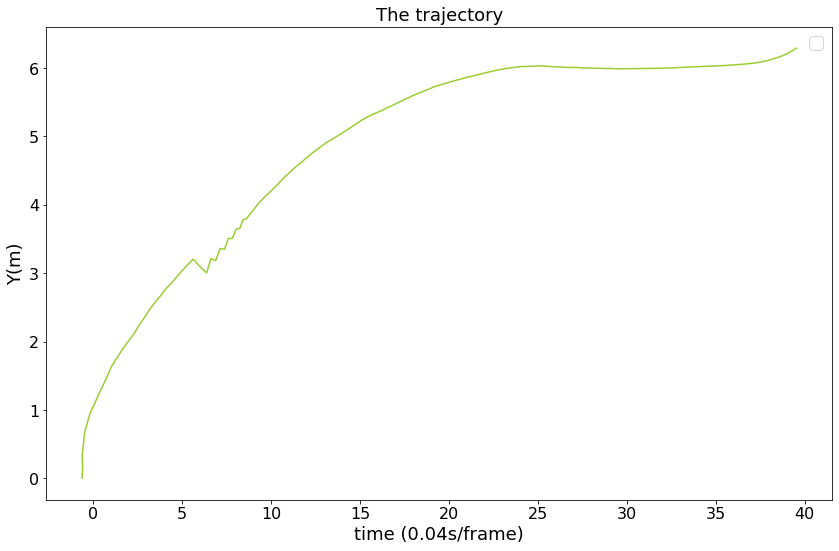

In [25]:
##DATA ground truth 
fig = plt.figure(figsize=(8,4))   
sns.despine(left=True)
trajmap = Mapframetraj_yy(Mask_traj_ebike)

plt.xlabel('time (0.04s/frame)',fontsize=18)     #设置x轴名称
plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
# 坐标尺
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
# 坐标名称
plt.rcParams.update({"font.size":18})
plt.title("The trajectory",fontsize=18)
plt.ylabel('Y(m)',fontsize=18)     #设置y轴名称

# plt.setp(axes, yticks=[])
plt.tight_layout()
# plt.savefig('./traj_dis_xy.pdf')
# plt.savefig('./traj_dis_xy.jpg')  #facecolor='grey', edgecolor='red'

In [26]:
def Mapframetraj_yyy(data):
    # 获取车辆数
    df = pd.DataFrame(data)
    vehids = pd.unique(df["Object_id"])
    for vehid in vehids:
        fig = plt.figure(figsize=(12,8))  
        traj_id = df[df.Object_id==vehid]
        plt.plot(traj_id["frame_ida"],traj_id["speed_y"],c="yellowgreen",linestyle="-")
        plt.xlabel('time (0.04s/frame)',fontsize=18)     #设置x轴名称
        plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
        # 坐标尺
        plt.xticks(fontsize=16,rotation=0)
        plt.yticks(fontsize=16)
        # 坐标名称
        plt.rcParams.update({"font.size":18})
        plt.title("The trajectory",fontsize=18)
        plt.ylabel('Y(m)',fontsize=18)     #设置y轴名称
        plt.show()
#         plt.setp(axes, yticks=[])
#         plt.tight_layout()

In [27]:
##DATA ground truth 
fig = plt.figure(figsize=(12,8))   
sns.despine(left=True)
# trajmap = Mapframetraj_yy(Yoloorginalebike)
# plt.savefig('./traj_dis_xy.pdf')
# plt.savefig('./traj_dis_xy.jpg')  #facecolor='grey', edgecolor='red'

<Figure size 864x576 with 0 Axes>

In [28]:
def Mapframetraj_accy(data):
    # 获取车辆数
    df = pd.DataFrame(data)
    vehids = pd.unique(df["Object_id"])
    for vehid in vehids:
        fig = plt.figure(figsize=(12,8))  
        traj_id = df[df.Object_id==vehid]
        plt.plot(traj_id["frame_id"],traj_id["acc_y"],c="b",linestyle="-")

In [29]:
# 对比真实轨迹与cv输出轨迹之间的差距
fig = plt.figure(figsize=(12,8))   
sns.despine(left=True)
# trajmap = Mapframetraj_accy(Yoloorginalebike)

# plt.xlabel('time (0.04s/frame)',fontsize=18)     #设置x轴名称
# plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
# # 坐标尺
# plt.xticks(fontsize=16,rotation=0)
# plt.yticks(fontsize=16)
# # 坐标名称
# plt.rcParams.update({"font.size":18})
# plt.title("The trajectory",fontsize=18)
# plt.ylabel('Y(m)',fontsize=18)     #设置y轴名称

# plt.setp(axes, yticks=[])
# plt.tight_layout()

<Figure size 864x576 with 0 Axes>

In [38]:
## # 轨迹微观对比

In [39]:
# 对比相同一辆车在不同算法中的轨迹
# 选择10条交互环境下的轨迹进行对比分析
# Yoloorginalebike

In [40]:
# Mask中所有车辆的id
# Maskid = pd.unique(Maskorginaldata.Object_id)
# print(Maskid)
Yolo_ID = pd.unique(Mask_traj_ebike.Object_id)
# print(Yolo_ID)
Ground_truth_id = pd.unique(Groundtruthebike.Object_id)
# print(Ground_truth_id)

In [41]:
# 对比相同一辆车在不用算法输出的结果的差异
# 选择10辆具体的车辆，分别覆盖不同的交通流环境

In [42]:
# gound_yolo_ID_high

In [30]:
# 对齐轨迹点的函数
def Alignment(Groundtruthebike,Comparetraj):
#     traj_ground0 = Groundtruthebike[Groundtruthebike.Object_id ==ground_id]
#     print(Groundtruthebike,Comparetraj)
    min_Y_G = min(pd.array(Groundtruthebike.World_y))
    max_Y_G = max(pd.array(Groundtruthebike.World_y))
    # CV输出的轨迹数据
#     Comparetraj0 = Comparetraj[Comparetraj.Object_id == yolo_id]
    min_Y_C = min(pd.array(Comparetraj.World_y))
    max_Y_C = max(pd.array(Comparetraj.World_y))
    bottom = max(min_Y_G,min_Y_C)
    top = min(max_Y_G,max_Y_C)
    #让轨迹点对齐
    # 需要对齐时间帧
#     print("------------------------1--------------------------")
    traj_ground1 = Groundtruthebike[Groundtruthebike.World_y>=bottom]
    traj_ground = traj_ground1[traj_ground1.World_y<=top] 
#     traj_ground['G_frameid'] = range(1:traj_ground.shape[0])
    Comparetraj1 = Comparetraj[Comparetraj.World_y>=bottom]
    traj_compare = Comparetraj1[Comparetraj1.World_y<=top] 
#     print("-----------------------2---------------------------")
    #设置时间帧对齐的方法
    if traj_ground.shape[0]>=traj_compare.shape[0]:
        frame_ids =  traj_ground.frame_id[0:traj_compare.shape[0]]
#         print("----------------------------1------------------------")
        traj_compare['G_frameid'] = pd.array(frame_ids)
#         print(traj_compare.shape[0])        
    else:
        frame_ids = traj_ground.frame_id
#         print("----------------------------2------------------------")
#         print(traj_ground.shape[0])
        traj_compare = traj_compare[0:traj_ground.shape[0]]
#         print(traj_compare.shape[0])
        traj_compare['G_frameid'] = pd.array(frame_ids)   
#         print(traj_compare)     
    return traj_ground,traj_compare

In [31]:
def Samelen(GTRAJ,COMTRAJ): 
    frame_len = min(len(GTRAJ),len(COMTRAJ))
    traj_ground2 = GTRAJ.iloc[:frame_len]
    traj_compare2 = COMTRAJ[:frame_len]
    return traj_ground2,traj_compare2

In [32]:
# 二维坐标显示
def Trajmap(trajdata,traj_compare):
    fig1 = plt.figure(figsize=(8,4))   
    g_World_x,g_World_y,com_World_x,com_World_y = XY(traj_ground,traj_compare) 
    plt.plot(g_World_x,g_World_y,color="blue",label='Ground trajectory')
    plt.plot(com_World_x,com_World_y,color="red",label='Yolov7 trajectory')
    plt.legend()
    plt.legend(loc="upper right",fontsize=12)   #设置图例字体大小
    plt.xlabel('X(m))',fontsize=16)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=16)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=12,rotation=0)
    plt.yticks(fontsize=12)
    # 坐标名称
    plt.rcParams.update({"font.size":16})
    plt.title("The trajectory",fontsize=16)
    plt.ylabel('Y(m)',fontsize=16)     #设置y轴名称
    plt.grid()
    plt.show()
    return fig1  

In [33]:
# 时间速度图像显示
def Timespeed(traj_ground,traj_compare):
    fig2 = plt.figure(figsize=(12,6))   
    traj_ground2,traj_compare2 = Samelen(traj_ground,traj_compare)
    G_velocity_x,G_velocity_y = Velocity(traj_ground2)
    C_velocity_x,C_velocity_y = Velocity(traj_compare2)
    frame_g_id = np.array(traj_ground2.frame_id)
    frame_y_id = np.array(traj_compare2.G_frameid)

    plt.plot(frame_g_id,G_velocity_y,color="red",label='Ground trajectory')
    plt.plot(frame_y_id,C_velocity_y,color="blue",label='Yolov7 trajectory')

    plt.legend()
    plt.legend(loc="upper right",fontsize=12)   #设置图例字体大小

    plt.xlabel('Frame id (0.04s/frame))',fontsize=16)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=16)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=12,rotation=0)
    plt.yticks(fontsize=12)
    # 坐标名称
    plt.rcParams.update({"font.size":16})
#     plt.title("The trajectory",fontsize=16)
    plt.ylabel('velocity(m/s)',fontsize=16)     #设置y轴名称  
    plt.grid()
    plt.show()
    return fig2

In [34]:
# 时间速度图像显示
def Timeacc(traj_ground,traj_compare):
    fig3 = plt.figure(figsize=(12,6))   
    traj_ground2,traj_compare2 = Samelen(traj_ground,traj_compare)
    G_accelerate_x,G_accelerate_y = Accelection(traj_ground2)
    C_accelerate_x,C_accelerate_y = Accelection(traj_compare2)
    frame_g_id = np.array(traj_ground2.frame_id)
    frame_y_id = np.array(traj_compare2.G_frameid)
     # #       绘制加速度随着时间帧的变化曲线        
    # #     plt.plot(frame,accelection_xx)
    plt.plot(frame_g_id,G_accelerate_y,color="red",label='Ground trajectory')
    plt.plot(frame_y_id,C_accelerate_y,color="blue",label='Yolov7 trajectory')
        # Plot a historgram and kernel density estimate
    plt.legend()
    plt.legend(loc="upper right",fontsize=12)   #设置图例字体大小

    plt.xlabel('Frame id (0.04s/frame)',fontsize=16)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=16)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=12,rotation=0)
    plt.yticks(fontsize=12)
    # 坐标名称
    plt.rcParams.update({"font.size":16})
#     plt.title("The ",fontsize=16)
    plt.ylabel('Acceleration (m/s^2)',fontsize=16)     #设置y轴名称
    plt.grid()
    plt.show()
    return fig3

In [35]:
def Jerk(trajdata):
    """计算急动度""" 
    len_x = trajdata.acc_x.shape[0]
    acc_x = np.array(trajdata.acc_x)
    acc_y = np.array(trajdata.acc_y)
    jerk_x = (acc_x[1:len_x] - acc_x[0:(len_x-1)])/0.04
    jerk_y = (acc_y[1:len_x] - acc_y[0:(len_x-1)])/0.04
#     print("---------------------1-------------------------")
#     print(jerk_x)
    jerk_x = np.array(jerk_x)
    jerk_y = np.array(jerk_y)
    jerk_x = np.insert(jerk_x,0,[0])
#     jerk_x = np.append(0,0)
#     jerk_y = np.append(0,0)
    jerk_y = np.insert(jerk_y,0,[0])
#     print("---------------------2-------------------------")
#     jerk_x = np.append(jerk_x,0)
#     jerk_y = np.append(jerk_y,0)
    return jerk_x,jerk_y

In [36]:
# 时间速度图像显示
def Timejerk(traj_ground,traj_compare):
    fig4 = plt.figure(figsize=(12,6))   
    traj_ground2,traj_compare2 = Samelen(traj_ground,traj_compare)
    G_Jerk_x,G_Jerk_y = Jerk(traj_ground2)
    C_Jerk_x,C_Jerk_y = Jerk(traj_compare2)
    frame_g_id = np.array(traj_ground2.frame_id)
    frame_y_id = np.array(traj_compare2.G_frameid)
    
    
    # #       绘制加加速度随着时间帧的变化曲线        
    # #     plt.plot(frame,jerk_xx)
    plt.plot(frame_g_id,G_Jerk_y,color="red",label='Ground trajectory')
    plt.plot(frame_y_id,C_Jerk_y,color="blue",label='Yolov7 trajectory')
        # Plot a historgram and kernel density estimate
    plt.legend()
    plt.legend(loc="upper right",fontsize=12)   #设置图例字体大小

    plt.xlabel('Frame id (0.04s/frame)',fontsize=16)     #设置x轴名称
    plt.legend(loc="upper right",fontsize=16)   #设置图例字体大小
    # 坐标尺
    plt.xticks(fontsize=12,rotation=0)
    plt.yticks(fontsize=12)
    # 坐标名称
    plt.rcParams.update({"font.size":16})
    plt.title("The jerk ",fontsize=16)
    plt.ylabel('Jerk (m/s^3)',fontsize=16)     #设置y轴名称
    plt.grid()
    plt.show()
    return fig4

In [37]:
# Mask_ebike_traj_orginal = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid==0]
# mask_ebike_traj = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Removeoutlin\Mask_remove_wavel0926.csv'
mask_ebike_traj = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'

# mask_ebike_traj = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Yolo0926.csv'

Mask_ebike_traj_orginal = pd.read_csv(mask_ebike_traj)
# Yolov7_traj_orginal = pd.read_csv(yolov7data)
# Yolov7_wt = pd.DataFrame(Yolov7_traj_orginal)
# Yolov7_ebike_sfpf = Yolov7_wt[Yolov7_wt.Vehicle_type==22]

for id in range(len(gound_mask_ID_LOW)):
    ground_id = gound_mask_ID_LOW.Ground_ID[id]
    yolo_id = gound_mask_ID_LOW.Mask_ID[id]
    # 真实轨迹数据 
    #  print(ground_id)
    traj_ground0 = Groundtruthebike[Groundtruthebike.Object_id ==ground_id]
    traj_ground0 = pd.DataFrame(traj_ground0)
    # CV输出的轨迹数据
    traj_compare0 = Mask_ebike_traj_orginal[Mask_ebike_traj_orginal.Object_id == yolo_id]
    # print(traj_ground0)
    # print(traj_ground0.World_y)
    # min(pd.array(Groundtruthebike.World_y))
    if traj_compare0.shape[0]>=10:
        traj_ground,traj_compare = Alignment(traj_ground0,traj_compare0)
        fig1 = Trajmap(traj_ground,traj_compare)  
#         #  显示时间速度对比图像   
        fig2 = Timespeed(traj_ground,traj_compare) 
#         #   显示时间加速度对比图像
        fig3 = Timeacc(traj_ground,traj_compare) 
        #  显示时间加加速度对比图像
        fig4 = Timejerk(traj_ground,traj_compare)

NameError: name 'gound_mask_ID_LOW' is not defined

In [38]:
# RMSE
def Index_rmse(traj_ground,traj_compare):
    #比较真实轨迹与CV输出轨迹以及算法输出轨迹之间的差异
    #选择相同的起点坐标，后面选取相同长度的轨迹点，比较两个数据集长度
#     print(traj_ground,traj_compare)
    ground_truth,Comparetraj = Samelen(traj_ground,traj_compare)
    len_ground_truth = ground_truth.shape[0]
    len_Compare_traj = Comparetraj.shape[0]     
    num_traj_id = min(len_ground_truth,len_Compare_traj)    
    Ground_traj = ground_truth[0:num_traj_id]    
    Compar_traj = Comparetraj[0:num_traj_id]    
    Ground_traj_world_x = np.array(Ground_traj.World_x)
    Ground_traj_world_y = np.array(Ground_traj.World_y)
    Compar_traj_world_x = np.array(Compar_traj.World_x)
    Compar_traj_world_y = np.array(Compar_traj.World_y)
    #计算真实轨迹点的差异
    deltx = np.array(Ground_traj_world_x - Compar_traj_world_x)
    delty = np.array(Ground_traj_world_y - Compar_traj_world_y)
    RMSE = math.sqrt((np.sum(deltx*deltx) + np.sum(deltx*deltx))/num_traj_id)
    return RMSE

In [39]:
# 计算信噪比
def SNR(traj_ground,traj_compare):
    # 计算信号与噪声的比值
    #比较真实轨迹与CV输出轨迹以及算法输出轨迹之间的差异
    #选择相同的起点坐标，后面选取相同长度的轨迹点，比较两个数据集长度
    # print(traj_ground,traj_compare)
    ground_truth,Comparetraj = Samelen(traj_ground,traj_compare)
    len_ground_truth = ground_truth.shape[0]
    len_Compare_traj = Comparetraj.shape[0]     
    num_traj_id = min(len_ground_truth,len_Compare_traj)    
    Ground_traj = ground_truth[0:num_traj_id]    
    Compar_traj = Comparetraj[0:num_traj_id]    
    Ground_traj_world_x = np.array(Ground_traj.World_x)
    Ground_traj_world_y = np.array(Ground_traj.World_y)
    Compar_traj_world_x = np.array(Compar_traj.World_x)
    Compar_traj_world_y = np.array(Compar_traj.World_y)
    #计算轨迹噪声    
    deltx = np.array(Ground_traj_world_x - Compar_traj_world_x)
    delty = np.array(Ground_traj_world_y - Compar_traj_world_y)
    Noise = (np.sum(deltx*deltx) + np.sum(deltx*deltx))
    # 计算轨迹信号
    SIGNAL = np.sum(Compar_traj_world_x*Compar_traj_world_x+Compar_traj_world_y*Compar_traj_world_y)
    SNRR = 10*math.log(SIGNAL/Noise)
    return SNRR

In [40]:
# 计算R方
def RR(traj_ground,traj_compare):
    #计算轨迹的相似性
    #比较真实轨迹与CV输出轨迹以及算法输出轨迹之间的差异
    #选择相同的起点坐标，后面选取相同长度的轨迹点，比较两个数据集长度
    # print(traj_ground,traj_compare)
    ground_truth,Comparetraj = Samelen(traj_ground,traj_compare)
    len_ground_truth = ground_truth.shape[0]
    len_Compare_traj = Comparetraj.shape[0]     
    num_traj_id = min(len_ground_truth,len_Compare_traj)    
    Ground_traj = ground_truth[0:num_traj_id]    
    Compar_traj = Comparetraj[0:num_traj_id]    
    Ground_traj_world_x = np.array(Ground_traj.World_x)
    Ground_traj_world_y = np.array(Ground_traj.World_y)
    Compar_traj_world_x = np.array(Compar_traj.World_x)
    Compar_traj_world_y = np.array(Compar_traj.World_y)
    
    #将坐标转换为距离起点的距离
    DIS_G =  pd.DataFrame(Ground_traj_world_x*Ground_traj_world_x+Ground_traj_world_y*Ground_traj_world_y)
    Dis_Ground_traj_world = DIS_G.apply(np.sqrt)
    DIS_C =  pd.DataFrame(Compar_traj_world_x*Compar_traj_world_x+Compar_traj_world_y*Compar_traj_world_y)
    Dis_Compar_traj_world = DIS_C.apply(np.sqrt)
    
    M_DIS_G = np.mean(Dis_Ground_traj_world)
    M_DIS_C = np.mean(Dis_Compar_traj_world)
    G_delta = Dis_Ground_traj_world-M_DIS_G
    C_delta = Dis_Compar_traj_world- M_DIS_C
    up_1 = np.array(G_delta)
    up_2 = np.array(C_delta)
    UP_total = np.multiply(up_1,up_2)
    UP_total_value = np.sum(UP_total)
    
    
    Botm_1 = np.sum(G_delta*G_delta)
#     Botm_2 = np.sum(C_delta*C_delta)
    Botm_2 = 1
    Botm_total_value = np.multiply(Botm_1,Botm_2)
    
    print("-----------------")
    Rr = (UP_total_value/Botm_total_value)
    print(Rr)
    return Rr   

In [41]:
import numpy as np
from astropy.units import Ybarn
import math
 
def computeCorrelation(X, Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0 , len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX +=  diffXXBar**2
        varY += diffYYBar**2
    
    SST = math.sqrt(varX * varY)
    if SST==0:
        SST =1
    return SSR / SST
 
def RRR(traj_ground,traj_compare): 
    ground_truth,Comparetraj = Samelen(traj_ground,traj_compare)
    len_ground_truth = ground_truth.shape[0]
    len_Compare_traj = Comparetraj.shape[0]     
    num_traj_id = min(len_ground_truth,len_Compare_traj)    
    Ground_traj = ground_truth[0:num_traj_id]    
    Compar_traj = Comparetraj[0:num_traj_id]    
    Ground_traj_world_x = np.array(Ground_traj.World_x)
    Ground_traj_world_y = np.array(Ground_traj.World_y)
    Compar_traj_world_x = np.array(Compar_traj.World_x)
    Compar_traj_world_y = np.array(Compar_traj.World_y)
    X_RR = computeCorrelation(Ground_traj_world_x, Compar_traj_world_x)
    Y_RR = computeCorrelation(Ground_traj_world_y, Compar_traj_world_y)
    return  X_RR,Y_RR

In [42]:
from scipy.spatial.distance import directed_hausdorff
def Hausdorff(traj_ground,traj_compare):
    ground_truth,Comparetraj = Samelen(traj_ground,traj_compare)
    len_ground_truth = ground_truth.shape[0]
    len_Compare_traj = Comparetraj.shape[0]     
    num_traj_id = min(len_ground_truth,len_Compare_traj)    
    Ground_traj = ground_truth[0:num_traj_id]    
    Compar_traj = Comparetraj[0:num_traj_id]    
    Ground_traj_world_XY = Ground_traj[['World_x','World_y']]
    Compar_traj_world_xy = Compar_traj[['World_x','World_y']]
    Dir_hausdorff_1 = directed_hausdorff(Ground_traj_world_XY, Compar_traj_world_xy)[0]
    Dir_hausdorff_2 = directed_hausdorff(Compar_traj_world_xy, Ground_traj_world_XY)[0]
    Dir_hausdorff_3 = directed_hausdorff(Compar_traj_world_xy, Ground_traj_world_XY)[1:]
    Hausdorff_dis =  max(directed_hausdorff(Ground_traj_world_XY, Compar_traj_world_xy)[0], directed_hausdorff(Compar_traj_world_xy, Ground_traj_world_XY)[0])
    return Hausdorff_dis

In [43]:
# pip install tslearn

In [44]:
# %pip install dtaidistance

In [45]:
# DTW
import numpy as np
np.random.seed(0)
a = np.random.normal(3, 2.5, size=(2, 1000))
print(a)

print("----------------1-----------------")
# 使用tslearn计算dtw距离
import time as t
time1 = t.time()
from tslearn.metrics import dtw
dist_ts = dtw(a[0], a[1])
print(dist_ts)
time2 = t.time()
cost_ts = time2-time1


print("----------------2-----------------")
# 使用dtw计算dtw距离
time1 = t.time()
from dtw import dtw
from numpy.linalg import norm
dist_dtw, cost, acc_cost, path = dtw(
    a[0].reshape(-1, 1),
    a[1].reshape(-1, 1),
    dist=lambda x, y: norm(x - y, ord=1)
)
print(dist_dtw)
time2 = t.time()
cost_dtw = time2-time1
print(cost_dtw)

print("----------------3-----------------")
# 使用fastdtw计算dtw距离
time1 = t.time()
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
dist_fast, path1 = fastdtw(a[0], a[1], dist=euclidean)
print(dist_fast)
time2 = t.time()
cost_fast = time2-time1
print(cost_fast)

print("----------------4-----------------")
# 使用dtaidistance计算dtw距离
time1 = t.time()
from dtaidistance import dtw
dist_dtai = dtw.distance_fast(a[0], a[1])
print(dist_dtai)
time2 = t.time()
cost_dtai = time2-time1


[[ 7.41013086  4.00039302  5.44684496 ...  3.23548075  0.13097264
   2.10471481]
 [ 4.3899067   5.23118472  1.94421294 ...  3.39608462  0.14524645
  -0.27742593]]
----------------1-----------------
52.87500295874739
----------------2-----------------
1439.7227382196934
9.393898010253906
----------------3-----------------


numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


2048.1030965340865
0.5952024459838867
----------------4-----------------
52.87500295874739


------------------------1--------------------------
-----------------------2---------------------------


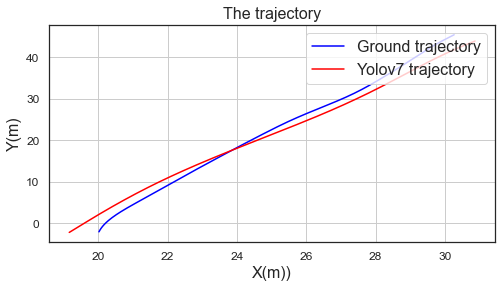

------------------------1--------------------------
-----------------------2---------------------------


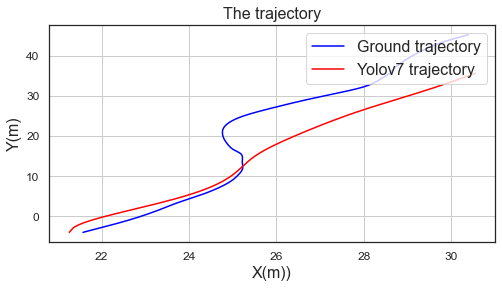

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


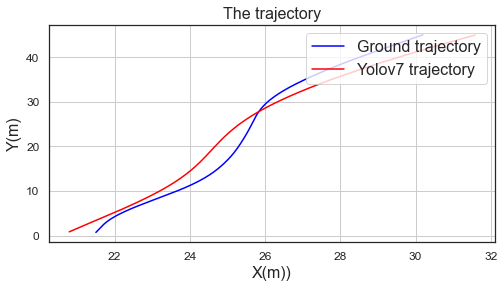

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


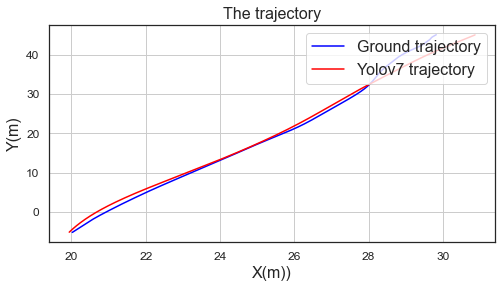

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


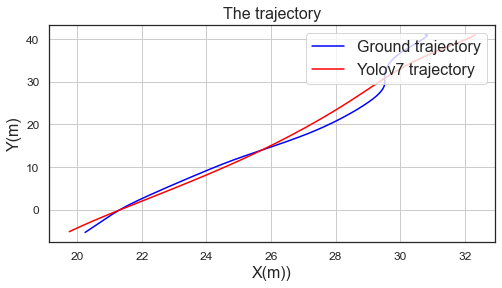

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


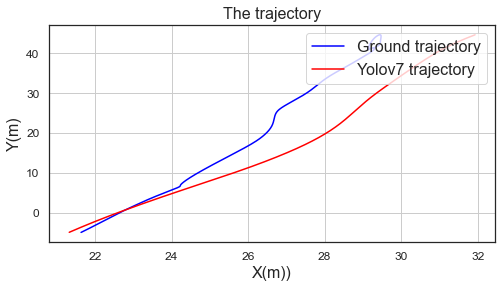

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


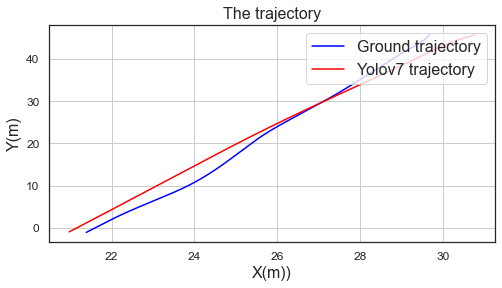

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


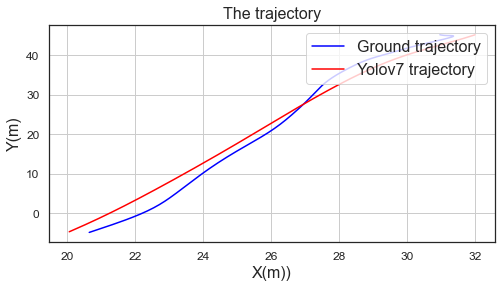

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


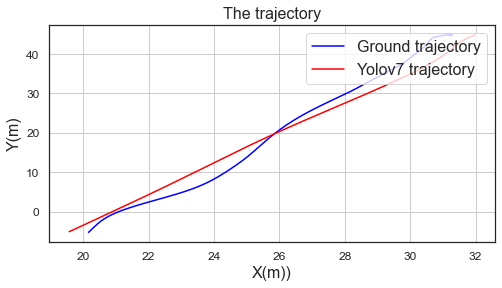

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


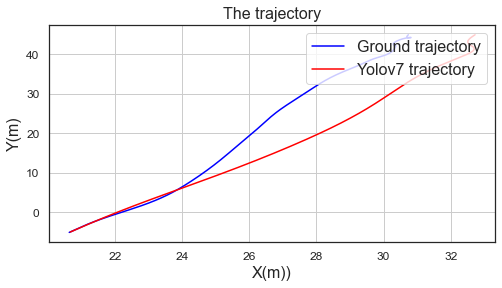

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


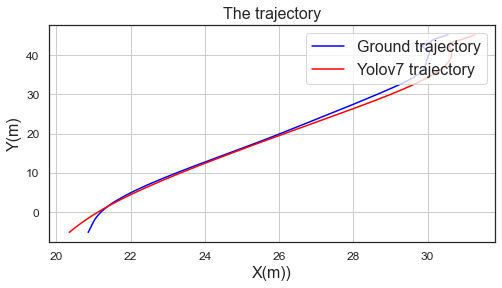

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


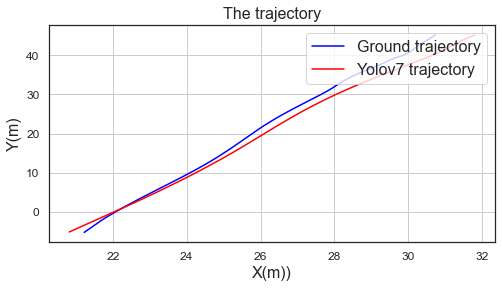

------------------------1--------------------------
-----------------------2---------------------------


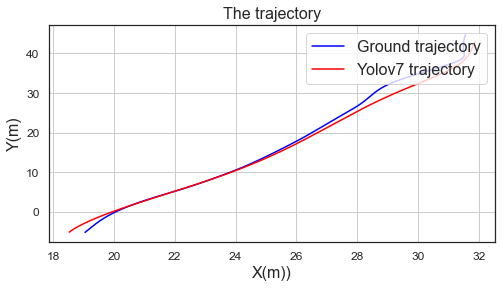

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


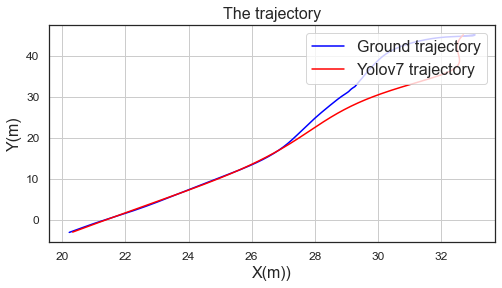

------------------------1--------------------------
-----------------------2---------------------------


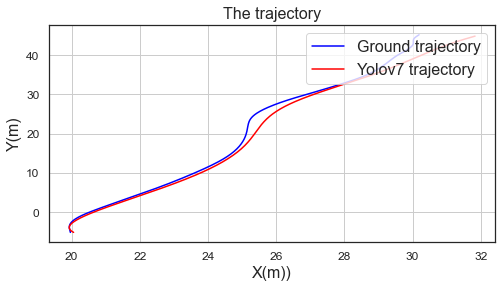

------------------------1--------------------------
-----------------------2---------------------------


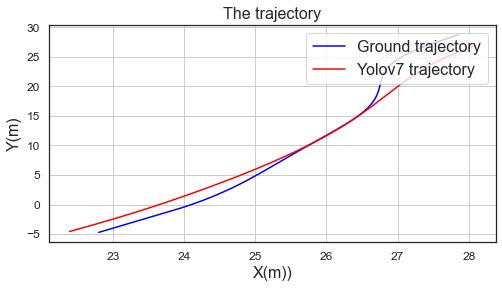

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


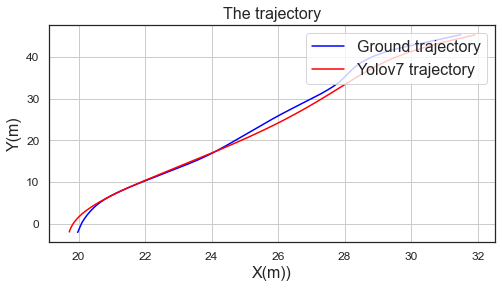

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


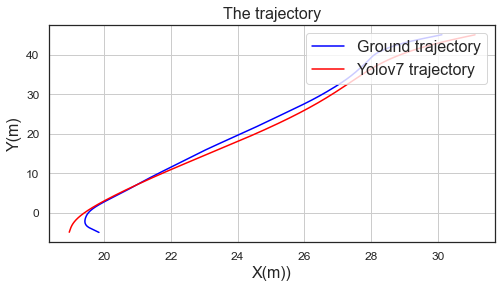

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


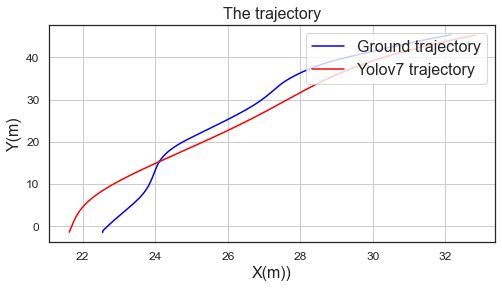

------------------------1--------------------------
-----------------------2---------------------------


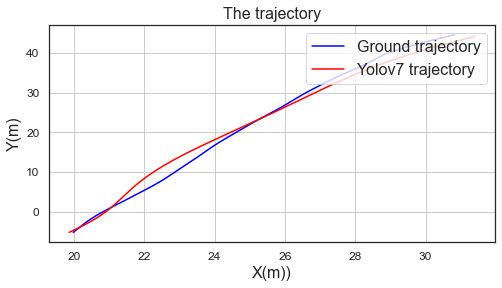

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


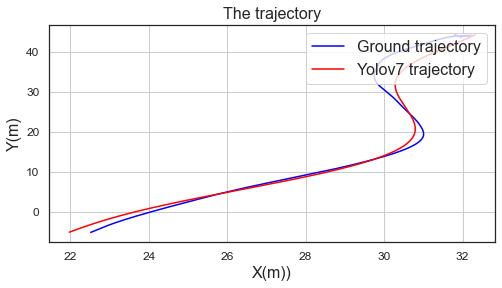

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


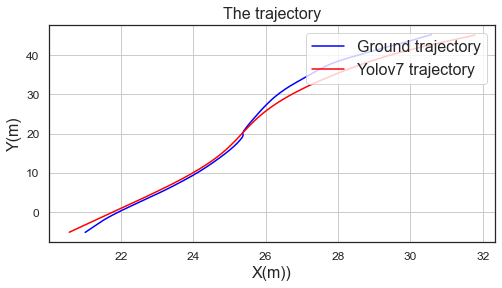

C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


------------------------1--------------------------
-----------------------2---------------------------


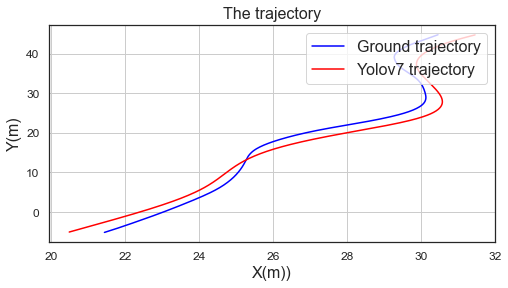

------------------------1--------------------------
-----------------------2---------------------------


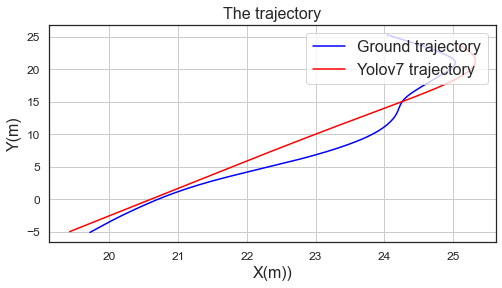

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


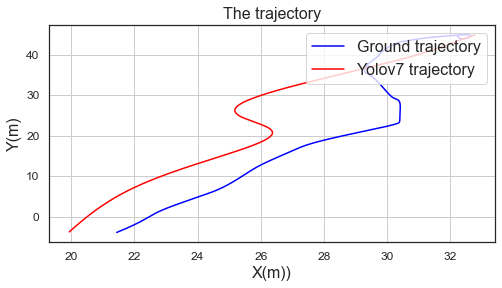

------------------------1--------------------------
-----------------------2---------------------------


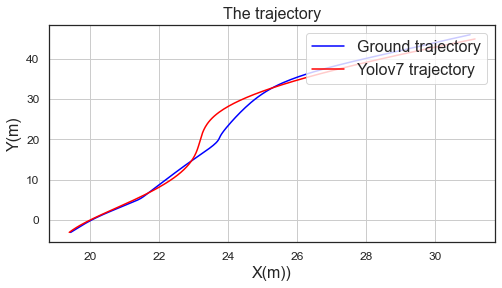

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


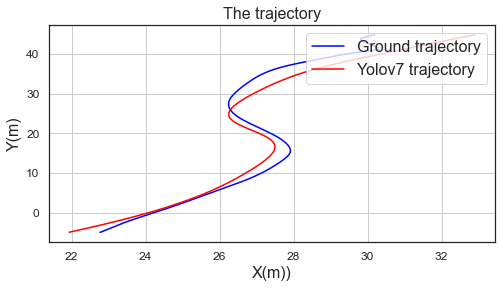

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


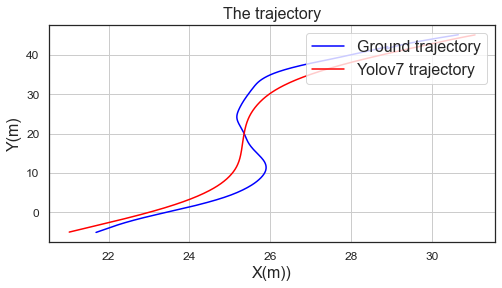

------------------------1--------------------------
-----------------------2---------------------------


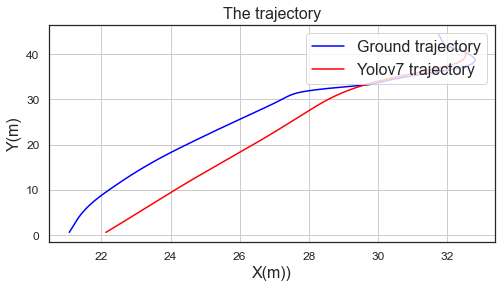

------------------------1--------------------------
-----------------------2---------------------------


C:\Users\19501\AppData\Local\Temp\ipykernel_17732\1831181460.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


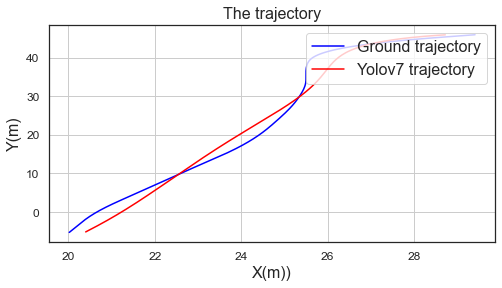

In [300]:
# 数据输入
# Yolov7 轨迹数据
yolov7data = r'E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/procession/traj_id_compar/wtdata/Yolov7_wavel0926.csv'
Yolov7_traj_orginal = pd.read_csv(yolov7data)
Yolov7_wt = pd.DataFrame(Yolov7_traj_orginal)
Yolov7_ebike_sfpf = Yolov7_wt[Yolov7_wt.Vehicle_type==22]
# Yolov7_ebike_traj_orginal = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid==100]
for id in range(len(gound_yolo_ID_high)):
    ground_id = gound_yolo_ID_high.ground_ID[id]
    yolo_id = gound_yolo_ID_high.yolo_ID[id]
    # 真实轨迹数据 
    #  print(ground_id)
    traj_ground1 = Groundtruthebike[Groundtruthebike.Object_id ==ground_id]
    traj_ground0 = pd.DataFrame(traj_ground1)
    
#     print(pd.unique(Yolov7_wt.Object_id))
    # CV输出的轨迹数据
    traj_compare1 = Yolov7_wt[Yolov7_wt.Object_id == yolo_id]
#     print(traj_compare1)
    traj_compare0 = pd.DataFrame(traj_compare1)
    if traj_compare0.shape[0]>=10:
#         print(traj_compare0)
        traj_ground,traj_compare = Alignment(traj_compare0,traj_ground0)
#     print(traj_ground,traj_compare)
        #  显示二维平面轨迹
        fig1 = Trajmap(traj_ground,traj_compare)  
#         SNRRR = SNR(traj_ground,traj_compare)
#         print(SNRRR)
#         R = RR(traj_ground,traj_compare)
#         X_RR,Y_RR = RRR(traj_ground,traj_compare)
#         print(X_RR,Y_RR)
#         Hausdorffdis = Hausdorff(traj_ground,traj_compare)
#         print(Hausdorffdis)
        #  显示时间速度对比图像   
#         fig2 = Timespeed(traj_ground,traj_compare) 
        #   显示时间加速度对比图像
#         fig3 = Timeacc(traj_ground,traj_compare) 
        #  显示时间加加速度对比图像
#         fig4 = Timejerk(traj_ground,traj_compare)

In [31]:
# 计算轨迹之间的差异指标
# 将轨迹数据分为无交互、弱交互和强交互三个阶段，分别比较不同类型轨迹的RMSE
# 第二步，对比cv输出轨迹与真实轨迹之间的差异，选取强交互情景下的轨迹做对比分析：
# 第三部分：对比降噪算法应用之后的轨迹
# 第一步，对比整体参数，
# 第二步，计算微观RMSE、DTWD等检验指标

In [46]:
## 导入对应id数据
# 导入高低密度下的车辆对应id列表
# 导入ground turth dataset
pathG_Y_ID = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\Yolov7\high.csv'
G_Y_ID_high = pd.read_csv(pathG_Y_ID)
gound_yolo_ID_high = pd.DataFrame(G_Y_ID_high) #swatch the dict to dataframe
# print(gound_yolo_ID_high)
# 导入低密度下的车辆对应id列表
# 导入ground turth dataset
pathG_Y_ID = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\Yolov7\low.csv'
G_Y_ID_low = pd.read_csv(pathG_Y_ID)
gound_yolo_ID_low = pd.DataFrame(G_Y_ID_low) #swatch the dict to dataframe
# print(gound_yolo_ID_low)
## 导入ground_truth and Mask_RCNN对应id数据
# 导入低密度下的车辆对应id的列表
pathG_M_ID = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\Maskrcnn\low.csv'
G_M_ID_LOW = pd.read_csv(pathG_M_ID)
gound_mask_ID_LOW = pd.DataFrame(G_M_ID_LOW) #swatch the dict to dataframe
# 导入高密度下的车辆对应id列表
# 导入ground turth dataset
pathG_m_HID = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\Maskrcnn\high.csv'
G_M_ID_HIHG = pd.read_csv(pathG_m_HID)
gound_mask_ID_high = pd.DataFrame(G_M_ID_HIHG) #swatch the dict to dataframe

# 进行敏感性分析
marginal_Y_ID = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\Yolov7\all.csv'
marginalmx = pd.read_csv(marginal_Y_ID)
marginalmx_ID_ALL = pd.DataFrame(marginalmx) #swatch the dict to dataframe

In [48]:
# # yolov7
# gound_yolo_ID_high = pd.DataFrame(gound_yolo_ID_high)
# gound_yolo_ID_low = pd.DataFrame(gound_yolo_ID_low)
# marginalmx_ID_ALL

In [49]:
# print(gound_yolo_ID_high)
# print(gound_yolo_ID_low)

In [35]:
# print(Groundtruthebike.Object_id)

In [ ]:
# 对比原始轨迹与真实值之间的差距

In [73]:
# gound_yolo_ID_high
# gound_mask_ID_LOW
# gound_mask_ID_high
# gound_mask_ID_high

In [88]:
yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Noremoveroutlin\Yolov7_wavel0926.csv'
# yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Mask0926.csv'

# yolov7data = r'E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\linekalman\result\Klamna_over_Yolo0926.csv'

Yolov7_traj_orginal = pd.read_csv(yolov7data)
Yolov7_wt = pd.DataFrame(Yolov7_traj_orginal)
Yolov7_ebike_sfpf = Yolov7_wt[Yolov7_wt.Vehicle_type==22]
# 计算多个loop对应轨迹的RMSE
#   
gound_yolo_ID_high = gound_yolo_ID_low
# print(gound_yolo_ID_high)
hang = gound_yolo_ID_high.shape[0]
LoopRMSE = np.zeros((hang,4))
LoopSNR = np.zeros((hang,4))
LoopHausdorff = np.zeros((hang,4))
LoopRRsquared_x = np.zeros((hang,4))
LoopRRsquared_y = np.zeros((hang,4))
RMSE_allloop = pd.DataFrame(LoopRMSE)
SNR_allloop = pd.DataFrame(LoopSNR)
Hausdorff_allloop = pd.DataFrame(LoopHausdorff)
Rsquared_allloop_x = pd.DataFrame(LoopRRsquared_x)
Rsquared_allloop_y = pd.DataFrame(LoopRRsquared_y)
# A =[] ground_ID  yolo_ID
for loop in range(0,1):
    Rmse_list =[]
    SNR_list = []
    Hausdorff_list = []
    Rsquared_x_list = []
    Rsquared_y_list = []
    for id in range(len(gound_yolo_ID_high)):      
        ground_id = gound_yolo_ID_high.ground_ID[id]
        yolo_id = gound_yolo_ID_high.yolo_ID[id]
            # 真实轨迹数据 
    #         print(ground_id)
        traj_ground0 = Groundtruthebike[Groundtruthebike.Object_id ==ground_id]
        traj_ground0 = pd.DataFrame(traj_ground0)
            # CV输出的轨迹数据
#         CV_traj_loops = Yolov7_wt[Yolov7_wt.loopid ==loop]
        
        CV_traj_loops = Yolov7_wt
        traj_compare0 = CV_traj_loops[CV_traj_loops.Object_id == yolo_id]
#         MaskRcnn
#         mask_traj_loops = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid == loop]
#         traj_compare0 = mask_traj_loops[mask_traj_loops.Object_id == yolo_id]
    #         print(traj_ground0)
    #         print(traj_ground0.World_y)
    #         min(pd.array(Groundtruthebike.World_y))
        if traj_compare0.shape[0]>=10:
            traj_ground,traj_compare = Alignment(traj_ground0,traj_compare0)
#             print(traj_ground,traj_compare)
#             print(traj_ground,traj_compare)
                # 提取轨迹数据
# # #         显示二维平面轨迹
#             fig1 = Trajmap(traj_ground,traj_compare)  
# #         显示时间速度对比图像   
#             fig2 = Timespeed(traj_ground,traj_compare) 
# #         显示时间加速度对比图像
#             fig3 = Timeacc(traj_ground,traj_compare) 
# #         显示时间加加速度对比图像
#             fig4 = Timejerk(traj_ground,traj_compare)
            
            RMSE = Index_rmse(traj_ground,traj_compare)
            Rmse_list.append(RMSE)
        
            # SNRRR = SNR(traj_ground,traj_compare)
            SNRRR = SNR(traj_ground,traj_compare)
            SNR_list.append(SNRRR) 

            HausdorffR = Hausdorff(traj_ground,traj_compare)
            Hausdorff_list.append(HausdorffR)
        
            #R-squared value
            Rsquared_x,Rsquared_y = RRR(traj_ground,traj_compare)
            Rsquared_x_list.append(Rsquared_x)
            Rsquared_y_list.append(Rsquared_y)
        
#     print(Rmse_list)
    A = pd.DataFrame(Rmse_list)
    RMSE_allloop.iloc[:,loop] = A
    B = pd.DataFrame(SNR_list)
    SNR_allloop.iloc[:,loop] = B
    C = pd.DataFrame(Hausdorff_list)
    Hausdorff_allloop.iloc[:,loop] = C
    RX = pd.DataFrame(Rsquared_x_list)
    Rsquared_allloop_x.iloc[:,loop] = RX
    RY = pd.DataFrame(Rsquared_y_list)
    Rsquared_allloop_y.iloc[:,loop] = RY
   

RMSE_allloop.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
SNR_allloop.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
Hausdorff_allloop.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
Rsquared_allloop_x.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
Rsquared_allloop_y.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]

# print(gound_yolo_ID_high)
filepath1 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Noremoveroutlin\GY_L\G_Y_H_RMSE.csv"
RMSE_allloop.to_csv(filepath1, index=False, mode='a+', header=False)
filepath2 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Noremoveroutlin\GY_L\G_Y_H_SNR.csv"
SNR_allloop.to_csv(filepath2, index=False, mode='a+', header=False)
filepath3 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Noremoveroutlin\GY_L\G_Y_H_Hausdorrf.csv"
Hausdorff_allloop.to_csv(filepath3, index=False, mode='a+', header=False)
filepath4 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Noremoveroutlin\GY_L\G_Y_H_Rsquared_X.csv"
Rsquared_allloop_x.to_csv(filepath4, index=False, mode='a+', header=False)
filepath5 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Noremoveroutlin\GY_L\G_Y_H_Rsquared_Y.csv"
Rsquared_allloop_y.to_csv(filepath5, index=False, mode='a+', header=False)

C:\Users\19501\AppData\Local\Temp\ipykernel_13940\3645798012.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


# 敏感性分析

In [74]:
# 进行敏感性分析rmse指标计算
# Marginalmx
# 分别计算每个tesetid对应的RMSE的平均值变化，其中取每条轨迹的RMSE的最优值
# 读入数据，计算RMSE，保存数据，数据存储格式选择列代表测试值，行代表车辆ID


Marginal = pd.DataFrame(Marginalmx)
Yolov7_Marginal = Marginal[Marginal.loopid==20]
# 计算多个loop对应轨迹的RMSE
gound_yolo_ID_high = marginalmx_ID_ALL
hang = gound_yolo_ID_high.shape[0]
LoopRMSE = np.zeros((hang,55))
RMSE_allloop = pd.DataFrame(LoopRMSE)
# A =[] ground_ID  yolo_ID
for tid in range(1,51):
    CV_traj_loops = Yolov7_Marginal[Yolov7_Marginal.testid==tid]
    Rmse_list =[]
    SNR_list = []
    Hausdorff_list = []
    Rsquared_x_list = []
    Rsquared_y_list = []
    for id in range(len(gound_yolo_ID_high)):      
        ground_id = gound_yolo_ID_high.ground_ID[id]
        yolo_id = gound_yolo_ID_high.yolo_ID[id]
            # 真实轨迹数据 
    #         print(ground_id)
        traj_ground0 = Groundtruthebike[Groundtruthebike.Object_id ==ground_id]
        traj_ground0 = pd.DataFrame(traj_ground0)
            # CV输出的轨迹数据
#         CV_traj_loops = Yolov7_wt[Yolov7_wt.loopid ==loop]
        
#         CV_traj_loops = Yolov7_wt
        traj_compare0 = CV_traj_loops[CV_traj_loops.Object_id == yolo_id]
#         print(traj_compare0)
#         MaskRcnn
#         mask_traj_loops = Mask_ebike_sfpf[Mask_ebike_sfpf.loopid == loop]
#         traj_compare0 = mask_traj_loops[mask_traj_loops.Object_id == yolo_id]
    #         print(traj_ground0)
    #         print(traj_ground0.World_y)
    #         min(pd.array(Groundtruthebike.World_y))
        if traj_compare0.shape[0]>=10:
            traj_ground,traj_compare = Alignment(traj_ground0,traj_compare0)
#             print(traj_ground,traj_compare)
#             print(traj_ground,traj_compare)
                # 提取轨迹数据
# # #         显示二维平面轨迹
#             fig1 = Trajmap(traj_ground,traj_compare)  
# #         显示时间速度对比图像   
#             fig2 = Timespeed(traj_ground,traj_compare) 
# #         显示时间加速度对比图像
#             fig3 = Timeacc(traj_ground,traj_compare) 
# #         显示时间加加速度对比图像
#             fig4 = Timejerk(traj_ground,traj_compare)
            
            RMSE = Index_rmse(traj_ground,traj_compare)
            Rmse_list.append(RMSE)
        
#             # SNRRR = SNR(traj_ground,traj_compare)
#             SNRRR = SNR(traj_ground,traj_compare)
#             SNR_list.append(SNRRR) 

#             HausdorffR = Hausdorff(traj_ground,traj_compare)
#             Hausdorff_list.append(HausdorffR)
        
#             #R-squared value
#             Rsquared_x,Rsquared_y = RRR(traj_ground,traj_compare)
#             Rsquared_x_list.append(Rsquared_x)
#             Rsquared_y_list.append(Rsquared_y)
        
#     print(Rmse_list)
    A = pd.DataFrame(Rmse_list)
    RMSE_allloop.iloc[:,tid] = A
#     B = pd.DataFrame(SNR_list)
#     SNR_allloop.iloc[:,loop] = B
#     C = pd.DataFrame(Hausdorff_list)
#     Hausdorff_allloop.iloc[:,loop] = C
#     RX = pd.DataFrame(Rsquared_x_list)
#     Rsquared_allloop_x.iloc[:,loop] = RX
#     RY = pd.DataFrame(Rsquared_y_list)
#     Rsquared_allloop_y.iloc[:,loop] = RY
   

# RMSE_allloop.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
# SNR_allloop.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
# Hausdorff_allloop.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
# Rsquared_allloop_x.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]
# Rsquared_allloop_y.iloc[:,1:3]=gound_yolo_ID_high.iloc[:,0:2]

# print(RMSE_allloop)
filepath1 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MY_21.csv"
RMSE_allloop.to_csv(filepath1, index=False, mode='a+', header=False)
# filepath2 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\wtdata\Norem

C:\Users\19501\AppData\Local\Temp\ipykernel_2572\2044964479.py:19: RuntimeWarning: invalid value encountered in double_scalars
  RMSE = math.sqrt((np.sum(deltx*deltx) + np.sum(deltx*deltx))/num_traj_id)
C:\Users\19501\AppData\Local\Temp\ipykernel_2572\3645798012.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_compare['G_frameid'] = pd.array(frame_ids)


In [73]:
#绘制敏感性曲线
# 导入数据
path1 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MX_1.csv"
path2 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MX_10.csv"
path3 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MX_20.csv"
path4 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MY_1.csv"
path5 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MY_10.csv"
path6 = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Marginaleffect\Marginal_MY_20.csv"
# 读取数据
MX_1 = pd.read_csv(path1)
MX_10 = pd.read_csv(path2)
MX_20 = pd.read_csv(path3)
MY_1 = pd.read_csv(path4)
MY_10 = pd.read_csv(path5)
MY_20 = pd.read_csv(path6)

# 计算每一组参数对应RMSE的平均值
for id 



In [ ]:
import seaborn as sns

In [81]:
# Maskrcnn
gound_mask_ID_high = pd.DataFrame(gound_mask_ID_high)
gound_mask_ID_low = pd.DataFrame(gound_mask_ID_LOW)
ground_truth = pd.DataFrame(Areatraj(Groundtruthebike))
Mask_traj_ebike = pd.DataFrame(Areatraj(Maskrcnn_car))

NameError: name 'Maskrcnn_car' is not defined

In [99]:
Rmse_listt =[]
# print(gound_mask_ID_high)
for id in range(len(gound_mask_ID_high)):
    ground_id = gound_mask_ID_high.Ground_ID[id]
    cv_id = gound_mask_ID_high.Mask_ID[id]
    # 真实轨迹数据 
    traj_ground0 = Groundtruthebike[Groundtruthebike.Object_id ==ground_id]
#     # CV输出的轨迹数据
    CV_traj_loops = Yolov7_ebike_sfpf[Yolov7_ebike_sfpf.loopid ==0]
    traj_compare0 = CV_traj_loops[CV_traj_loops.Object_id == cv_id]
    traj_ground,traj_compare = Alignment(traj_ground0,traj_compare0)
#     max_botm_y = min(traj_ground)
    # 提取轨迹数据
#     显示二维平面轨迹
#     fig1 = Trajmap(traj_ground,traj_compare)  
#     显示时间速度对比图像   
#     fig2 = Timespeed(traj_ground,traj_compare) 
#     显示时间加速度对比图像
#     fig3 = Timeacc(traj_ground,traj_compare) 
#     显示时间加加速度对比图像
#     fig4 = Timejerk(traj_ground,traj_compare)
#     计算RMSE
    RMSEe = Index_rmse(traj_ground,traj_compare)
    Rmse_listt.append(RMSEe)
AA = pd.DataFrame(Rmse_listt)
gound_mask_ID_high['RMSE'] = AA
filepath = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\procession\traj_id_compar\RMSE\G_M_high_RMSE.csv"
gound_mask_ID_high.to_csv(filepath, index=False, mode='a+', header=False)

ValueError: min() arg is an empty sequence

In [54]:
# 计算不同状态下两种cv轨迹的误差

In [ ]:
# 

In [55]:
# 对比使用SFPF处理后的结果首先是

In [56]:
#导入处理后的数据 
pathyolov7sfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\Yolo_SFPF.mat"
masksfpf = scio.loadmat(pathyolov7sfpf)
Masksfpfdata = pd.DataFrame(masksfpf['Yolo_SF_PF']) #swatch the dict to dataframe
Masksfpfdata.columns=["Object_id","frame_id","Vehicle_type","World_x","World_y","speed_x","speed_y","acc_x","acc_y","speed_xy","acc_xy","Displacement","Curvature","loopid"]

In [64]:
# RMSE
# RMSE
def Index_rmseloop(Orginaldata,SFPFDATA):
    #比较真实轨迹与CV输出轨迹以及算法输出轨迹之间的差异
    #选择相同的起点坐标，后面选取相同长度的轨迹点，比较两个数据集长度
    len_ground_truth = Orginaldata.shape[0]
    len_Compare_traj = SFPFDATA.shape[0]     
    num_traj_id = min(len_ground_truth,len_Compare_traj)    
    Ground_traj_world_x = np.array(Orginaldata.World_x)
    Ground_traj_world_y = np.array(Orginaldata.World_y)
    Compar_traj_world_x = np.array(SFPFDATA.World_x)
    Compar_traj_world_y = np.array(SFPFDATA.World_y)
    #计算真实轨迹点的差异
    deltx = np.array(Ground_traj_world_x - Compar_traj_world_x)
    delty = np.array(Ground_traj_world_y - Compar_traj_world_y)
    RMSEee = math.sqrt((np.sum(deltx*deltx) + np.sum(deltx*deltx))/num_traj_id)
    return RMSEee

In [65]:
def DRMSE_LOOP(trajlooplast,trajloop):
    looprmse =[]     
    ebikeids = pd.unique(trajloop.Object_id)
    ebikeidslast = pd.unique(trajlooplast.Object_id)
    for ebikeid in ebikeids:
#         print(ebikeid)
        traj_ebikeid = trajloop[trajloop.Object_id == ebikeid]
        traj_ebikeid_last = trajlooplast[trajlooplast.Object_id == ebikeid]
        RMSEEE = Index_rmseloop(traj_ebikeid_last,traj_ebikeid)
        Rmse = ('%.4f' % RMSEEE)
#         print(ebikeid,len(traj_ebikeid),len(traj_ebikeid_last),Rmse)
        if (Rmse!= "nan"):
            looprmse.append(Rmse)
    looprmse = pd.DataFrame(looprmse)
    MeanRMSE =  np.mean(looprmse)
#     print(MeanRMSE)
    return MeanRMSE

In [66]:
# 计算优化过程的RMSE,计算每一个周期的平均RMSE
loops = pd.unique(Masksfpfdata.loopid)
Loop_RMSE = []
for loop in loops:
    if loop >=1:
        Ebike_traj = Masksfpfdata[Masksfpfdata.Vehicle_type==22]
        Traj_loop_last = Ebike_traj[Ebike_traj.loopid==(loop-1)]
        Traj_loop = Ebike_traj[Ebike_traj.loopid==loop]
        MeanRMSE_loop = DRMSE_LOOP(Traj_loop_last,Traj_loop)        
Loop_RMSE.append(MeanRMSE_loop)

D:\Research-tools\python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\19501\AppData\Local\Temp\ipykernel_13940\3711541379.py:16: RuntimeWarning: overflow encountered in multiply
  RMSEee = math.sqrt((np.sum(deltx*deltx) + np.sum(deltx*deltx))/num_traj_id)


In [115]:
Loop_RMSE

[Series([], dtype: float64)]

In [124]:
#导入处理后的数据 
Rmsesfpf = r"E:\CodeResource\000_Mycode\GA_social_force_model\Compareanalysis\Result_analysis\Data\SFPF\RMSE_xiaoyu10.mat"
maskrmse = scio.loadmat(Rmsesfpf)
Masksfpfrmse = pd.DataFrame(maskrmse['RMSELIST']) #swatch the dict to dataframe
Masksfpfrmse.columns=["Yolov71","Yolov72","Mask"]

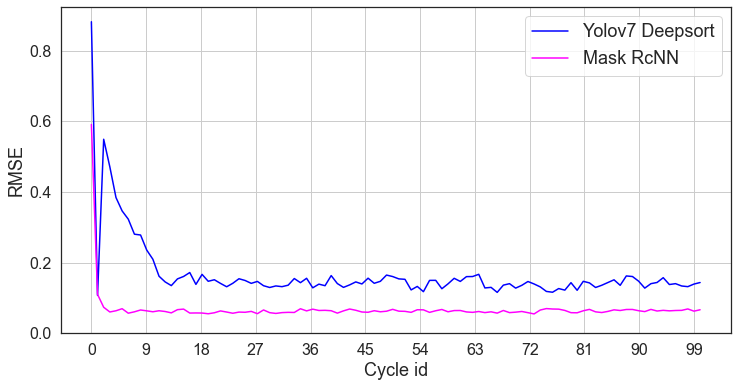

In [165]:
# ############## 根据对txt文件 写入、读取数据，绘制曲线图##############
import matplotlib.pyplot as plt
import numpy as np

X=np.linspace(0,100,100)
Y1 = Masksfpfrmse.Yolov72
Y2 = Masksfpfrmse.Mask

# plt.plot(X,Y1,lable="sin(X)",color="red",linewidth=2)


plt.figure(figsize=(12,6))  # 定义图的大小


plt.plot(X,Y1,label='Yolov7 Deepsort',c="blue",linestyle="-")
plt.plot(X,Y2,label='Mask RcNN',c="magenta",linestyle="-")
#在ipython的交互环境中需要这句话才能显示出来

plt.xlabel('Cycle id',fontsize=18)     #设置x轴名称
plt.legend(loc="upper right",fontsize=18)   #设置图例字体大小
# 坐标尺
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
# 坐标名称
plt.rcParams.update({"font.size":18})
# plt.title("The trajectory",fontsize=18)
plt.ylabel('RMSE',fontsize=18)     #设置y轴名
dx = 9
dy = 0.2
plt.xticks(np.arange(0, 100, dx))
plt.yticks(np.arange(0, 1, dy))

plt.grid()
plt.show()

# 计算利用小波变换对数据进行处理

In [175]:
# 原始数据位置
pathdata = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Mask_orginal.csv"
pathdata2 = r"E:/CodeResource/000_Mycode/GA_social_force_model/Compareanalysis/Result_analysis/Data/CVdata/RE_Yolov7_orginal.csv"

In [129]:
# 对比SFPF与小波变换结果
# 计算 对应id轨迹的RMSE

In [94]:
# 应用punzo文章的方法
# （1） 当采样点在车辆轨迹上的加速度大于 10 m/s2时，采用三次样条插值法对采样点前后1秒的车辆在高速公路上的位置进行重新计算； 
# （2） 用 Low Pass Filter 平滑了速度；
#  (3) 由于加速度噪声非常大不适合用这种方法进行处理
def Removenoise(trajdata):
    #  电动车的动力性能极限加速度参照机动车为界限这里选择5m/s2
    #  当加速度超过5时删除该轨迹点前后1秒的轨迹点，前1秒也就是前25帧，后1秒是后25帧
    trajdata = pd.DataFrame(trajdata)
    Worldx = trajdata[['Object_id','frame_id','Vehicle_type','World_x']]
    Worldy = trajdata[['Object_id','frame_id','Vehicle_type','World_y']]
    limit_acc = 5
    Gap = 24
    front_frame = now_frame-Gap
    follow_frame = now_frame-Gap
    Frames = pd.unique(trajdata.frame_id)
    for id in Frames:
        now_frame = id
        acc_x = traj_data[traj_data.frame_id==now_frame].acc_x
        acc_y = traj_data[traj_data.frame_id==now_frame].acc_y
        if acc_x>=5:
            Worldx[Worldx.frame_id>=front_frame and Worldx.frame_id<=follow_frame].World_x=0
        if  acc_y>=5:   
            Worldy[World_y.frame_id>=front_frame and World_y.frame_id<=follow_frame].World_y=0
    RETRAJ = pd.DataFrame(Worldx)
    RETRAJ['World_y'] = Worldy['World_y']
    return RETRAJ

In [ ]:
# 进行三次样条插值
import scipy.interpolate as spi
def Simple3(trajdata):
    #数据准备
    # 针对序列点中存在数据缺失的点，先识别出来再进行样条插值
    # 缺失点的识别，存在空值或者0值    
    trajdata = pd.DataFrame(trajdata)
    Worldx = trajdata[['Object_id','frame_id','Vehicle_type','World_x']]
    Worldy = trajdata[['Object_id','frame_id','Vehicle_type','World_y']]
    Frames = pd.unique(trajdata.frame_id)
    for id in Frames:
        #采用滑动窗口的思路进行处理25帧为一个窗口
        now_frame = id
        acc_x = traj_data[traj_data.frame_id==now_frame].acc_x
        acc_y = traj_data[traj_data.frame_id==now_frame].acc_y
        if acc_x ==0:
            
    X=np.arange(-10,10,1) #定义样本点X，从-pi到pi每次间隔1
    Y= np.sin(X)#定义样本点Y，形成sin函数
    new_x=np.arange(-10,10,0.4) #定义差值点
    
    #进行一阶样条插值
    ipo1=spi.splrep(X,Y,k=1) #样本点导入，生成参数
    iy1=spi.splev(new_x,ipo1) #根据观测点和样条参数，生成插值

    #进行三次样条拟合
    ipo3=spi.splrep(X,Y,k=3) #样本点导入，生成参数
    iy3=spi.splev(new_x,ipo3) #根据观测点和样条参数，生成插值

In [135]:
# 三次样条插值方法
# import numpy as np
# import matplotlib.pyplot as plt
# #进行样条差值
# import scipy.interpolate as spi

# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
 
# #数据准备
# X=np.arange(-10,10,1) #定义样本点X，从-pi到pi每次间隔1
# Y= np.sin(X)#定义样本点Y，形成sin函数
# new_x=np.arange(-10,10,0.4) #定义差值点

# #进行一阶样条插值
# ipo1=spi.splrep(X,Y,k=1) #样本点导入，生成参数
# iy1=spi.splev(new_x,ipo1) #根据观测点和样条参数，生成插值
 
# #进行三次样条拟合
# ipo3=spi.splrep(X,Y,k=3) #样本点导入，生成参数
# iy3=spi.splev(new_x,ipo3) #根据观测点和样条参数，生成插值
 
# ##作图
# fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,12))

# ax1.plot(X,Y,'o',label='样本点')
# ax1.plot(new_x,iy1,label='插值点')
# ax1.set_ylim(Y.min()-1,Y.max()+1)
# ax1.set_ylabel('指数')
# ax1.set_title('线性插值')
# ax1.legend()

# ax2.plot(X,Y,'o',label='样本点')
# ax2.plot(new_x,iy3,label='插值点')
# ax2.set_ylim(Y.min()-1,Y.max()+1)
# ax2.set_ylabel('指数')
# ax2.set_title('三次样条插值')
# ax2.legend()

In [ ]:
# （3） 应用五次多项式插值对加速度大于 5m/s2 的数据的轨迹进行重新规划；
# （4） 再次应用 Low Pass Filter 对速度进行平滑。

150
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.         1.03333333 1.06666667 1.1        1.13333333 1.16666667
 1.2        1.23333333 1.26666667 1.3        1.33333333 1.36666667
 1.4        1.43333333 1.46666667 1.5        1.53333333 1.56666667
 1.6        1.63333333 1.66666667 1.7        1.73333333 1.76666667
 1.8        1.83333333 1.86666667 1.9        1.93333333 1.96666667
 2.         2.03333333 2.06666667 2.1        2.13333333 2.16666667
 2.2        2.23333333 2.26666667 2.3        2.33333333 2.36666667
 2.4        2.43333333 2.46666667 2.5        2.53333333 2.56666667
 2.6        2.63333333 2.66666667 2.7        2.73333333 2.76666667
 2.8        2.83333333 2.86666667 2.9        2.93333333 2.

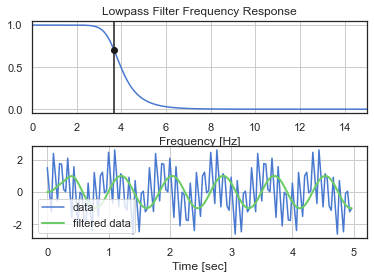

In [82]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Setting standard filter requirements.
order = 6
fs = 30.0       
cutoff = 3.667  

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
w, h = freqz(b, a, worN=100000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Creating the data for filteration
T = 5.0         # value taken in seconds
n = int(T * fs) # indicates total samples
print(n)

t = np.linspace(0, T, n, endpoint=False)
print(t)


data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
print(data)
# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)



plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()


In [6]:
from chart_studio import plotly
from chart_studio import plotly as py
from chart_studio import graph_objs as go
import plotly.graph_objs as go
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import scipy

from scipy import signal

ImportError: cannot import name 'graph_objs' from 'chart_studio' (E:\python\install_file\anaconda\lib\site-packages\chart_studio\__init__.py)